# Introduction

In this project, I am analysing a dataset of car sales advertisements sourced from ‘Autotrader'. The primary goal is to develop a regression model capable of accurately predicting a car's selling price. I have worked with the same dataset in my 'Machine learning concept' projrct where my model worked satisfactory in prdicting the price of a normal car, but failed miserably to predict the price of classic cars. My another aim to find one model that will work across all groups. I have opted to work on Jupyter notebook on Anaconda Environment with 18 GB RAM, 11 core CPU and 14 core GPU power. This environment, along with a selection of essential libraries, will provide the necessary resources for efficient data processing and model development.

In [57]:
%matplotlib inline
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [58]:
cars = pd.read_csv("/Users/shovon/Desktop/AML-Assignment/adverts.csv")

In [59]:
cars.head(1)

,public_reference,mileage,reg_code,standard_colour,standard_make,standard_model,vehicle_condition,year_of_registration,price,body_type,crossover_car_and_van,fuel_type
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid


So, there are total 402005 rows and 12 columns.

Now, I am interested to check the data type of each column or feature.

In [60]:
cars.dtypes

public_reference           int64
mileage                  float64
reg_code                  object
standard_colour           object
standard_make             object
standard_model            object
vehicle_condition         object
year_of_registration     float64
price                      int64
body_type                 object
crossover_car_and_van       bool
fuel_type                 object
dtype: object

Before I procced further, I would like to rename some of the features to make them shorter. This will be more convenient to write code with shorter feature names.

In [61]:
cars = cars.rename(columns={
    'public_reference': 'reference',
    'standard_make': 'make',
    'standard_colour': 'colour',
    'standard_model': 'model',
    'vehicle_condition': 'condition',
    'year_of_registration': 'registration',
    'body_type': 'body',
    'crossover_car_and_van': 'crossover',
    'fuel_type': 'fuel'})

In [62]:
cars.head(1)

,reference,mileage,reg_code,colour,make,model,condition,registration,price,body,crossover,fuel
0,202006039777689,0.0,NaN,Grey,Volvo,XC90,NEW,NaN,73970,SUV,False,Petrol Plug-in Hybrid


In [63]:
cars = cars.drop(columns=['reference'])

In [64]:
# Lets produce a summary statistics to understand the distribution of the 
cars.describe().round(2)

,mileage,registration,price
count,401878.00,368694.00,402005.00
mean,37743.60,2015.01,17341.97
std,34831.72,7.96,46437.46
min,0.00,999.00,120.00
25%,10481.00,2013.00,7495.00
50%,28629.50,2016.00,12600.00
75%,56875.75,2018.00,20000.00
max,999999.00,2020.00,9999999.00


As we can see, the quantitative features (int64, float64 data types) are price, mileage, and year_of_registration. The qualitative features (object, bool data types) are reg_code, standard_make, standard_model, vehicle_condition, body_type, crossover_car_van, and fuel_type. While public_reference has an int64 data type, it appears to be an identifier. Although numeric, identifiers are typically treated as categorical or simply as unique identifiers, as they often lack quantitative meaning. Most of us have a general understanding of car features like price, make, and color. However, since this dataset originates from a UK car dealer, certain features have unique insights specific to the UK market, and some features may require further explanation. I'll provide brief descriptions of these features.

reg_code: This dataset contains only the middle two digits of UK vehicle registration numbers, which represent the vehicle's age according to the post-2001 format. For example, 02 means the vehicle was first registered between March 2002-August 2002 and 51 means September 2001 and February 2002. We'll treat digits like "11" and "61" as the same year (e.g., 2011) for simplicity. To ease calculations, the "reg_code" column will be converted from ‘object’ to numeric format.

year_of_registration: The registration year of a car is not necessarily the year it was manufactured, but rather the year it was first registered with the Driver and Vehicle Licensing Agency (DVLA) in the UK. This registration process is required for all new and used cars that are used on public roads. New cars are typically registered in the year they are sold, which is often the same as or soon after their manufacturing year.

crossover_car_and_van: ‘Crossover’ is a recently introduced body type that combines the qualities of a conventional hatchback or saloon with those of an SUV. At Auto Trader, they’re still a sub-set of SUVs and can be found on their site by searching for SUVs.

Mileage: The mileage of a car is the number of miles it’s driven since the day it left the factory. It serves as an indicator of the wear on components such as the engine and gearbox.

<Axes: xlabel='price', ylabel='Count'>

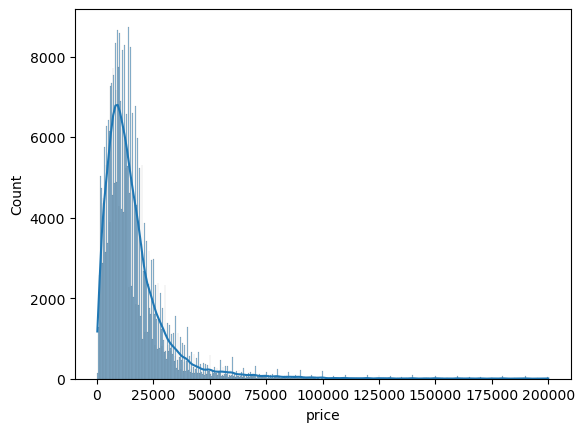

In [65]:
sns.histplot(data=cars[(cars['price'] < 200000)], x='price', kde=True)

The boxplot indicates the presence of outliers, particularly several cars with very high prices.

### A note about mahchine learning pipeline

In this project, I will also try to build a machine learning pipeline on the work I have done. A machine learning (ML) pipeline refers to a sequence of data processing and model building steps that automates the workflow of a machine learning project. With the help of a machine learning pipeline, organizations can streamline the development and deployment of ML models and can make the process more efficient, manageable, and scalable. This not only accelerates the time-to-market for machine learning solutions but also ensures they remain robust and effective in the face of changing data and business requirements.

As I am going to experiment with many different methods and my aim is to find out the best method to predict the price, I am not straight away creating a piepline. I find it less conveninent to experiment within the pipeline. I am more experimental and want to explore various options before committing to a pipeline structure, experimenting outside the pipeline could be more beneficial for me.

For this, I will make a copy of the dataset to use for the piepline. I will experiment with one dataset and use the copy for my pipeline. Working with a copy will allow me to try different preprocessing techniques, feature engineering strategies, and models without affecting the original dataset. This freedom encourages exploration and can lead to more innovative solutions. If an experiment doesn’t work out as expected, I can easily start over with a fresh copy of the original dataset without needing to undo changes manually.

# 1. Data Processing for Machine Learning. 

Data processing for machine learning refers to the series of steps taken to prepare raw data for use in training machine learning models. Since the performance of machine learning algorithms heavily depends on the quality and relevance of the data fed into them, proper data processing is crucial. 

At first, I need to check the missing values in the dataset. 

In [66]:
# checking missing values
cars.isnull().sum()

mileage           127
reg_code        31857
colour           5378
make                0
model               0
condition           0
registration    33311
price               0
body              837
crossover           0
fuel              601
dtype: int64

In [67]:
#missing values parcentage
cars.isnull().sum()/len(cars)*100

mileage         0.031592
reg_code        7.924528
colour          1.337794
make            0.000000
model           0.000000
condition       0.000000
registration    8.286215
price           0.000000
body            0.208206
crossover       0.000000
fuel            0.149501
dtype: float64

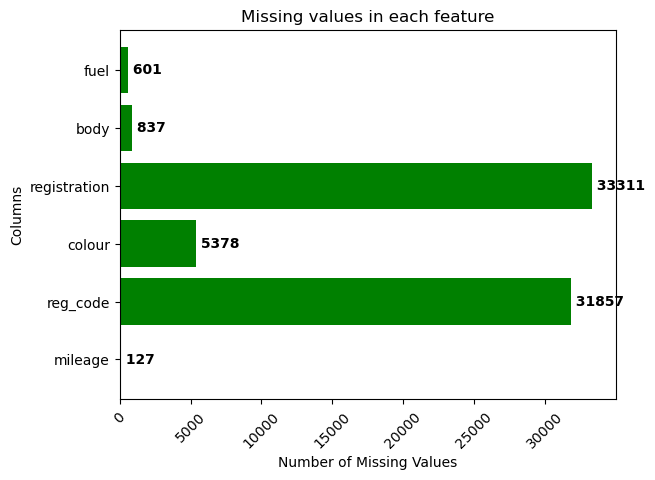

In [68]:
missing_values = cars.isnull().sum()

bars = plt.barh(missing_values[missing_values > 0].index, missing_values[missing_values > 0], color='Green')

for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2,
             f' {int(bar.get_width())}',
             va='center', ha='left', color='black', fontweight='bold')

plt.title('Missing values in each feature')
plt.ylabel('Columns')
plt.xlabel('Number of Missing Values')
plt.xticks(rotation=45)
plt.show()

### Dealing with missing values in Registration Years

There are 33311 (8.3%) missing values in Registration Year. There are many ways to deal with missing values; dropping them or imputing the values. However, it is not good to drop such a big number of rows. So, I will try to feel them logically. The common way to fill missing values is to impute them with mean, median or mode. However, this can make the dataset bias towards the central and completely manipulate the meaning. For, example, if we fill a missing value in the new car with mean or median year, that will complely change the condition of the car. Now, the car would be considered as a used car. So, it is better to use domain and logical way to fill the missing values. Mean, median and mode should be the last option to fill the missing values. 

In [69]:
# First, I will check how many missing are there in new cars
new_cars = cars[cars['condition']=='NEW']
new_cars.isnull().sum()

mileage             0
reg_code        31249
colour           1040
make                0
model               0
condition           0
registration    31249
price               0
body               56
crossover           0
fuel              161
dtype: int64

So, there are 31249 new cars that are missing registration years. In UK, a new car must get a registration year within 1 year of its manufacture. However, often car dealers list then on their advertising site before they get a registration number. So, the best way, to fill the missing values for new cars with a current year. But, I need to check what is the latest year in the dataset. I should not put 2024 for new cars as this will make the used cars older and will manipulate the relation of price with car age. I will assume the current year as the next year of the latest year in the dataset.

In [70]:
#checking the latest registration year in the dataset.
cars['registration'].max()

2020.0

In [71]:
# Applying year 2021 as registration year for new cars
cars.loc[(cars['condition'] == 'NEW') & (cars['registration'].isna()), 'registration'] = 2021

In [72]:
#checking the changes
cars[cars['condition']=='NEW'].head(3)

,mileage,reg_code,colour,make,model,condition,registration,price,body,crossover,fuel
0,0.0,NaN,Grey,Volvo,XC90,NEW,2021.0,73970,SUV,False,Petrol Plug-in Hybrid
17,5.0,NaN,NaN,Nissan,X-Trail,NEW,2021.0,27595,SUV,False,Diesel
19,0.0,NaN,White,Volkswagen,T-Cross,NEW,2021.0,25000,SUV,False,Petrol


In [73]:
# Checking how many missing values are in 'registration' column now;
cars.isnull().sum()

mileage           127
reg_code        31857
colour           5378
make                0
model               0
condition           0
registration     2062
price               0
body              837
crossover           0
fuel              601
dtype: int64

Now, there are 2062 missing values in registration column. In UK, we can derive registration year from 'reg_code'. From 2001, the two digits of reg_code shows the registration year. 01 and 51, both means 2001, 02 and 62 both means 2011. So, we can create a method where the missing registration year will be filled with the year derived from 'reg_code'. The registration code was used to estimate the year of registartion. For codes 50 and above, 50 was substracted and 2000 added. For codes below 50, 2000 was added directly. In cases where the 'reg_code' was missing or did not follow the expected numeric format, the 'year_of_registration' was left as 'Nan'.

In [74]:
def estimate_year_from_reg_code(reg_code):
    if pd.isna(reg_code) or not str(reg_code).isdigit():
        # if the reg_code is NaN or not a digit, return NaN
        return None

    reg_code = int(reg_code)
    if reg_code >= 50:
        # For reg_code from 50 and above, subtract 50 and add 2000
        return reg_code - 50 + 2000
    else:
        # for reg_code below 50, just add 2000
        return reg_code + 2000

In [75]:
# Apply the function to fill missing values in 'registration'
cars['registration'] = cars.apply(
    lambda row: estimate_year_from_reg_code(row['reg_code']) if pd.isna(row['registration']) else row['registration'],
    axis=1
)

In [76]:
cars.isnull().sum()

mileage           127
reg_code        31857
colour           5378
make                0
model               0
condition           0
registration      371
price               0
body              837
crossover           0
fuel              601
dtype: int64

we can fill the missing values in the 'year_of_rehistration' from its relation with 'mileage'. First, we need to see if there is strong relationship between these two features. Another way to fill the missing values is find the average mileage of a car in a year from outside source and use the logic like if the mileage is between 0-1000, then regfistration year 2020. if mileage is 1000-3000, then registration year 2019. Or, we can calculate a estimated average mileage per from this data set.

Hoever, ther is a problem

Before 2001, UK car registtration followed a prefix letter sytem between 1983 to 2000 where first letter denoting the year code. And suffix letter system between 1963 to 1983 with the last letter designating the year code.

In this dataset, we only have 1 letter in reg_code so, if we develop a method to fill missing values based on this, we can generate incorrect values as the letter can either indicate 1983-2000 or 1963-1983. The difference.

Also, if we develop a regreassion model based on the correlation between registration year and mileage, that can also generate incorrect values for these cars.

Since, there is 371 missing values left in registration and the dataset is really big, I can decide to drop these values.

However, I am thinking to build a real world solution. Dropping the data is not a good solution. I will try to build a method to impute these values even if they might generate incorrect values in some cases. 

we can fill the missing values in the 'year_of_rehistration' from its relation with 'mileage'. First, we need to see if there is strong relationship between these two features. Another way to fill the missing values is find the average mileage of a car in a year from outside source and use the logic like if the mileage is between 0-1000, then regfistration year 2020. if mileage is 1000-3000, then registration year 2019. Or, we can calculate a estimated average mileage per from this data set.

In [77]:
used_cars = cars[cars['condition']=='USED']

In [78]:
used_cars['mileage'].describe()

count    370629.000000
mean      40925.432090
std       34428.785146
min           0.000000
25%       14451.000000
50%       31866.000000
75%       60000.000000
max      999999.000000
Name: mileage, dtype: float64

In [79]:
used_cars['registration'].describe()

count    370385.000000
mean       2015.013980
std           7.949491
min         999.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max        2045.000000
Name: registration, dtype: float64

So, the average mileage of a car per yesr = 40925/(2021-2015) = 6800 (around) As the current year in the data set is 2021. So, if a car has a mileage 6800 or slightly or over, that means the car was registered in 2020. So, we will use the logic like, mileage <1000 = registration year 2020 and then mileage 6800 to 13600 = registration year 2020, and cotiunue like that.

In [80]:
def estimate_registration_year(mileage):
    average_mileage_per_year = 6800
    latest_year = 2021

    # If mileage is NaN, assume the registration year is the latest year (2020)
    if pd.isna(mileage):
        return latest_year

    # Estimate the number of years since registration
    years_since_registration = int(mileage / average_mileage_per_year)

    # Calculate the estimated registration year
    estimated_year = latest_year - years_since_registration
    return max(estimated_year, 1990)  # Assuming 1990 as the earliest possible year

# Apply the function to fill missing values in 'registration' for 'Used' vehicles
criteria = (cars['registration'].isna()) & (cars['condition'] == 'USED')
cars.loc[criteria, 'registration'] = cars[criteria]['mileage'].apply(estimate_registration_year)

In [81]:
cars.isnull().sum()

mileage           127
reg_code        31857
colour           5378
make                0
model               0
condition           0
registration        0
price               0
body              837
crossover           0
fuel              601
dtype: int64

In [82]:
# Checking the rows where 'mileage' column has missing values
cars[cars['mileage'].isna()].head(5)

,mileage,reg_code,colour,make,model,condition,registration,price,body,crossover,fuel
4766,NaN,NaN,Grey,Subaru,Outback,USED,2021.0,35995,Estate,False,Petrol
9178,NaN,20,Blue,BMW,3 Series,USED,2020.0,36990,Saloon,False,Diesel Hybrid
11188,NaN,09,Red,Citroen,C1,USED,2009.0,2699,Hatchback,False,Petrol
17166,NaN,15,Silver,Audi,A5 Cabriolet,USED,2015.0,13495,Convertible,False,Petrol
17416,NaN,NaN,Grey,SKODA,Octavia,USED,2021.0,25085,Estate,False,Petrol


For dealing with remaining missing values in 'mileage', we can use the same logic as we used in 'registration'. So, when the year of registration is 2019, we will fill the missing value in 'mileage' as 6800. When registration year 2018, we will fill the missing value in 'mileage' as 6800*2=13600.

In [83]:
def estimate_mileage(registration):
    average_mileage_per_year = 6800
    latest_year = 2021

    # Calculate the estimated mileage
    if pd.notna(registration):
        years_since_registration = latest_year - registration
        estimated_mileage = years_since_registration * average_mileage_per_year
        return estimated_mileage
    else:
        return 0

# Apply the function to fill missing values in 'mileage'
criteria = cars['mileage'].isna()
cars.loc[criteria, 'mileage'] = cars[criteria]['registration'].apply(estimate_mileage)

In [84]:
cars.isnull().sum()

mileage             0
reg_code        31857
colour           5378
make                0
model               0
condition           0
registration        0
price               0
body              837
crossover           0
fuel              601
dtype: int64

Dealing with missing values in 'colour'.

There are 5378 missing values in 'colour'. If we simply fill them with 'mode', the data set can become bias to that colour. However, we use resampling technique to fill the missing values in 'colour'. Like generating random colour based on possibility of the colours that do not have missing values. Like, if the colour 'Red' appeared most times, then generating colour 'Red' will have higher probability to fill the missing values.

First, we will calculate the frequency of each color in the 'colour' column. Then, Convert these frequencies to probabilities by dividing each frequency by the total number of non-missing values. We will use these probabilities to randomly sample colors for filling in the missing values.

In [85]:
# Calculate the frequency of each color
color_distribution = cars['colour'].value_counts(normalize=True)

# Use the distribution to fill missing values
criteria = cars['colour'].isna()
cars.loc[criteria, 'colour'] = np.random.choice(color_distribution.index,
                                                                       size=criteria.sum(),
                                                                       p=color_distribution.values)

In [86]:
cars.isnull().sum()

mileage             0
reg_code        31857
colour              0
make                0
model               0
condition           0
registration        0
price               0
body              837
crossover           0
fuel              601
dtype: int64

Dealing with missing values in 'body' and 'fuel'

We will use same resampling technique as we used in 'colour'. This seems most plausible to me.

In [87]:
#dealing with missing values in 'body'
body_distribution = cars['body'].value_counts(normalize=True)

criteria = cars['body'].isna()
cars.loc[criteria, 'body'] = np.random.choice(body_distribution.index,
                                                                       size=criteria.sum(),
                                                                       p=body_distribution.values)

In [88]:
# Calculate the frequency of each fuel
fuel_distribution = cars['fuel'].value_counts(normalize=True)

# Use the distribution to fill missing values
criteria = cars['fuel'].isna()
cars.loc[criteria, 'fuel'] = np.random.choice(fuel_distribution.index,
                                                                       size=criteria.sum(),
                                                                       p=fuel_distribution.values)

In [89]:
# Dropping the 'reg_code' as I needed this only to fill the missing values in 'registration' column
cars = cars.drop(columns=['reg_code'])

In [90]:
cars.isnull().sum()

mileage         0
colour          0
make            0
model           0
condition       0
registration    0
price           0
body            0
crossover       0
fuel            0
dtype: int64

So, there is no more missing values in the data set.
I will keep a copy of this dataset fo fine grain analysis. 

In [91]:
# Keeping a copy of the dataset for the fine grain analysis. 
fine_grain = cars.copy(deep=True)

In [92]:
cars.shape

(402005, 10)

In [93]:
fine_grain.shape

(402005, 10)

# Feature Engineering (Part 1)

Usually, data scientists deal with outliers before they create new features. Feature enginnering involves creating new features from the existing features and encoding the categorical features to make data ready for machine to read. As I mentioned in the beginning that I worked on this same dataset in my previous project and my model mainly did not work in predicting the price of classic cars, I will deal with outliers after creating some features. This is because, in my previous project, my method to deal with outliers removed majority of the classic cars from the dataset and my effort here will be keep enough representation of classic cars and still ensure that ML models are not affected by the outliers. 

In [94]:
cars.head(1)

,mileage,colour,make,model,condition,registration,price,body,crossover,fuel
0,0.0,Grey,Volvo,XC90,NEW,2021.0,73970,SUV,False,Petrol Plug-in Hybrid


### New Feature 'age'

First of all, I will create a new feature 'age' from the column 'registration'. This is beaccuse, the 'age' feature will better represent how old a car is and how does that affect the price. So, this feature should set the age of new car as 0 years. And since, latest year on 'registration' is 2021, I will assume the current year as 2021. So, age of cars with year of registration number 2020 get the value in 'age' as 1 year.

In [95]:
# Creating new feature 'age'.
cars['age'] = 2021 - cars['registration']

In [96]:
cars.sample(2)

,mileage,colour,make,model,condition,registration,price,body,crossover,fuel,age
335009,50.0,Red,Hyundai,ix20,USED,2020.0,15500,MPV,False,Petrol,1.0
214873,58245.0,Black,Jaguar,XJ,USED,2013.0,11995,Saloon,False,Diesel,8.0


In [97]:
cars[cars['registration']>2021].head(10)

,mileage,colour,make,model,condition,registration,price,body,crossover,fuel,age
9940,32001.0,Orange,Renault,Captur,USED,2044.0,7400,SUV,False,Petrol,-23.0
28559,58686.0,Black,Hyundai,i30,USED,2035.0,6900,SUV,False,Diesel,-14.0
167430,55643.0,Grey,Citroen,DS4,USED,2045.0,6800,Hatchback,False,Diesel,-24.0
231213,61370.0,Black,Vauxhall,Mokka,USED,2044.0,7450,Convertible,False,Diesel,-23.0
265390,23157.0,Black,Mercedes-Benz,E Class,USED,2038.0,26550,Hatchback,False,Diesel,-17.0
329449,39312.0,Silver,Renault,Captur,USED,2045.0,8000,SUV,False,Petrol,-24.0
357325,31487.0,White,Suzuki,Baleno,USED,2037.0,6950,Convertible,False,Petrol,-16.0


### New Feature 'classic'

In my previous project, I have shown that some cars have different price pattern and the price of these cars have a positive relation with the age. These cars are considered as 'classic' cars. There are many opinions about what criteria should be considered to declare a car as classic. However, I have used a criteria that for a car to be considered classic, it must be at least 20 years old and hold a minimum value of £30,000. I will create new feature 'classic car' with boolean values where 1 indicates 'classic' and 0 means 'not classic. The main aim of this feature is to separate the cars that do not follow normal price pattern.

In [98]:
# Creating a new feature 'classic' A car is classic if 'car_age' > 20 and 'price' > 30000
cars['classic'] = ((cars['age'] > 20) & (cars['price'] > 30000)).astype(int)

In [99]:
cars.head(1)

,mileage,colour,make,model,condition,registration,price,body,crossover,fuel,age,classic
0,0.0,Grey,Volvo,XC90,NEW,2021.0,73970,SUV,False,Petrol Plug-in Hybrid,0.0,0


In [100]:
cars[cars['classic']==1].shape

(458, 12)

So, there are 1649 classic cars in the dataset. The number is really low in comparison to the size of the whole dataset. If I want to make a successful model to predict the price of this category, I will need to find some ways to increase the number. 

### New Feature 'annual_mileage'

A key point in car industry is that how old a car is not only defined by its age, but also by the mileage. A 3 yaer old car with 10,000 mileage can have similar price of a 2 year old car with 15000 mileage. Hence, it is good idea to calculate the average mileage per year a car has run as it serves as an indicator of how much a vehicle has been used relative to its age. In real world, the term commonly used for this is "Annual Mileage." I will create a new column for annual mileage of each car. The calculation involves dividing the total mileage by the age of the car. However, for new cars where both mileage and age are 0, I need to handle this case to avoid division by zero. I can set the average mileage per year to 0 for these new cars.

In [101]:
# Creating a new column 'annual_mileage'
# For cars with age greater than 0, divide 'mileage' by 'age'
# For new cars (where 'age' is 0), set 'annual_mileage' to 0
cars['annual_mileage'] = cars.apply(lambda x: x['mileage'] / x['age'] if x['age'] > 0 else 0, axis=1)

In [102]:
cars.sample(3)

,mileage,colour,make,model,condition,registration,price,body,crossover,fuel,age,classic,annual_mileage
312998,83445.0,Grey,Land Rover,Freelander 2,USED,2012.0,12899,SUV,False,Diesel,9.0,0,9271.666667
361876,10000.0,White,Jeep,Grand Cherokee,USED,2018.0,30480,SUV,False,Diesel,3.0,0,3333.333333
152737,57593.0,Black,Volvo,XC60,USED,2016.0,17500,SUV,False,Diesel,5.0,0,11518.600000


Besides the reason I mentioned to create the 'annual_mileage', annual mileage of classic cars are usually low. As people do nor buy expensive or antique cars to use for everyday travel. So, this pattern will help ML algorithm to understand which car is a 'classic' and predict their price differently. 

In [103]:
cars[cars['classic']==1].sample(3)

,mileage,colour,make,model,condition,registration,price,body,crossover,fuel,age,classic,annual_mileage
97999,141000.0,Black,Porsche,928,USED,1988.0,35000,Coupe,False,Petrol,33.0,1,4272.727273
381832,13983.0,Red,BMW,Z3 M,USED,2000.0,52000,Coupe,False,Petrol,21.0,1,665.857143
277312,56500.0,Red,Ferrari,Mondial,USED,1985.0,32995,Coupe,False,Petrol,36.0,1,1569.444444


In [104]:
classic_cars = cars[cars['classic']==1]

In [105]:
classic = classic_cars[(classic_cars['age']<100) & (classic_cars['price']<800000)]

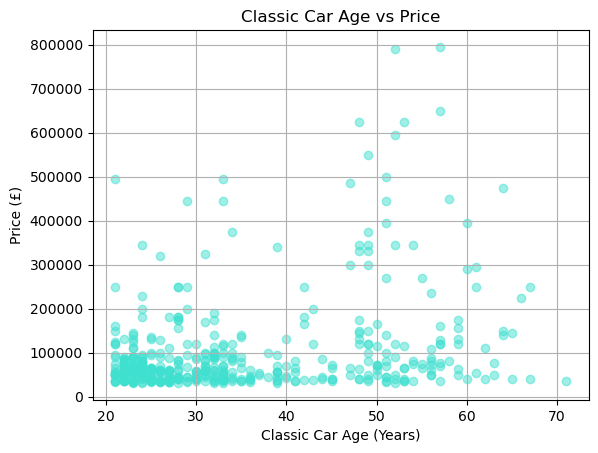

In [106]:
plt.scatter(classic['age'], classic['price'], alpha=0.5, color='turquoise')
plt.title('Classic Car Age vs Price')
plt.xlabel('Classic Car Age (Years)')
plt.ylabel('Price (£)')
plt.grid(True)
plt.show()

In [107]:
normal_classic = cars.copy()

In [108]:
annual_sam=normal_classic.sample(30000)

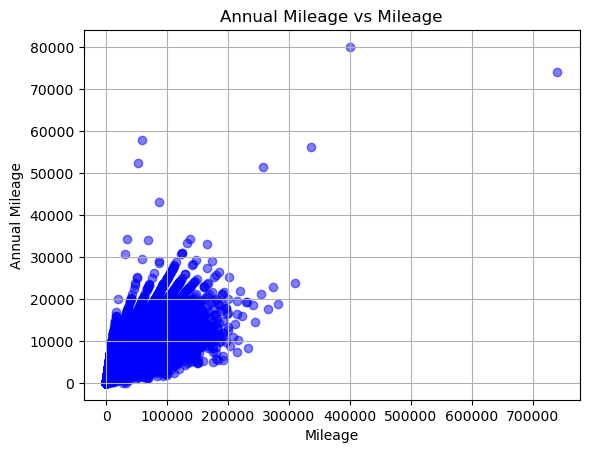

In [109]:
plt.scatter(annual_sam['mileage'], annual_sam['annual_mileage'], alpha=0.5, color='blue')
plt.title('Annual Mileage vs Mileage')
plt.xlabel('Mileage')
plt.ylabel('Annual Mileage')
plt.grid(True)
plt.show()

# Outlier and Noise detection

What we consider as outlier depends on the project goal. In my previous project, I have tried using usual statistical methods such as Z score, but they consider any car over 100,000 as outlier. So, these methods are not effective in this dataset. However, KNN method more effectively removed ooutliers that can also considered as noise. So, in this project, I will again use KNN method to detect the outliers. If my models again fail to effectively predict price across different groups, I will try diffecrent methods. 

##**KNN method to detect outlier**

In [110]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
price_mileage_age_annual = cars[['price', 'mileage', 'age', 'annual_mileage']].values
# Set the number of neighbors
k = 5
neigh_4d = NearestNeighbors(n_neighbors=k + 1)
neigh_4d.fit(price_mileage_age_annual)
# Finding the distances and indices of the k nearest neighbors to each point in the four-dimensional space
distances_4d, indices_4d = neigh_4d.kneighbors(price_mileage_age_annual)
# Calculating the mean distance to k nearest neighbors for each point. Exclude the first distance
mean_distances_4d = np.mean(distances_4d[:, 1:], axis=1)
# Using the top 5% as outliers
threshold_4d = np.percentile(mean_distances_4d, 98)
outliers_knn_4d = cars[mean_distances_4d > threshold_4d]

In [111]:
# Display first few outliers and the count
outliers_knn_4d_count = outliers_knn_4d.shape[0]
outliers_knn_4d[['price', 'mileage', 'age', 'annual_mileage']].head(), outliers_knn_4d_count

(      price   mileage   age  annual_mileage
 7     24475   99000.0   8.0    12375.000000
 25    54475   49585.0  37.0     1340.135135
 32     3989  180000.0   7.0    25714.285714
 59    39990   58000.0  10.0     5800.000000
 113  585000    1568.0   2.0      784.000000,
 8041)

In [112]:
# Remove outliers from the main dataset
cleaned_data = cars[~cars.index.isin(outliers_knn_4d.index)]

In [113]:
cars.shape

(402005, 13)

In [114]:
cleaned_data.shape

(393964, 13)

In [115]:
cleaned_data['price'].describe().round(0)

count    393964.0
mean      16266.0
std       16251.0
min         120.0
25%        7495.0
50%       12499.0
75%       19950.0
max      799995.0
Name: price, dtype: float64

In [116]:
cars['price'].describe().round(0)

count     402005.0
mean       17342.0
std        46437.0
min          120.0
25%         7495.0
50%        12600.0
75%        20000.0
max      9999999.0
Name: price, dtype: float64

In [117]:
cleaned_data['mileage'].describe().round(0)

count    393964.0
mean      36927.0
std       33441.0
min           0.0
25%       10232.0
50%       28167.0
75%       55940.0
max      225670.0
Name: mileage, dtype: float64

In [118]:
cars['mileage'].describe().round(0)

count    402005.0
mean      37745.0
std       34840.0
min           0.0
25%       10477.0
50%       28627.0
75%       56877.0
max      999999.0
Name: mileage, dtype: float64

In [119]:
cleaned_data['registration'].describe().round(0)

count    393964.0
mean       2016.0
std           4.0
min        1933.0
25%        2014.0
50%        2017.0
75%        2019.0
max        2021.0
Name: registration, dtype: float64

In [120]:
cars['registration'].describe().round(0)

count    402005.0
mean       2015.0
std           8.0
min         999.0
25%        2014.0
50%        2017.0
75%        2018.0
max        2045.0
Name: registration, dtype: float64

As we can see the max value and minimum values in all these categories are now more practical. So, KNN methos dealt with outliers in all these features. It is important to mention that I have tried different numbers for k and different parcentage to be considered as outliers. 

In [121]:
cars = cleaned_data

In [122]:
cars.shape

(393964, 13)

In [123]:
cars[cars['classic']==1].shape

(52, 13)

In [124]:
sample_age = cars[cars['price']<300000]

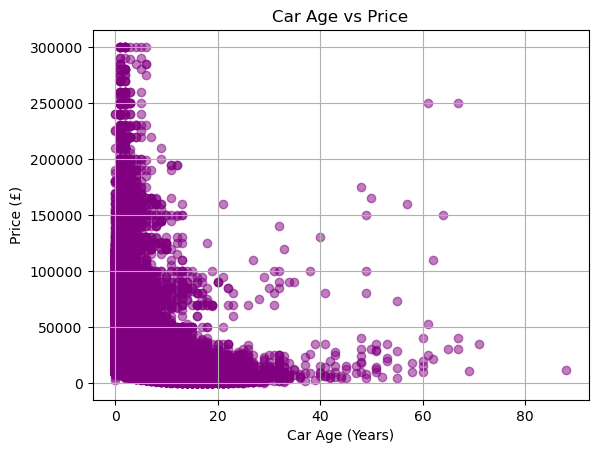

In [125]:
plt.scatter(sample_age['age'], sample_age['price'], alpha=0.5, color='purple')
plt.title('Car Age vs Price')
plt.xlabel('Car Age (Years)')
plt.ylabel('Price (£)')
plt.grid(True)
plt.show()

### Noise

In [126]:
# first check, is mileage zero for all new cars
new_cars = cars[cars['condition']=='NEW']

In [127]:
new_cars.shape

(31245, 13)

In [128]:
new_cars[new_cars['mileage']>0].shape

(15395, 13)

so, we have 15395 rows where mileage is not 0, despite the condition of the car is 'NEW'. There could be 2 reasons for that. Either the data about the vehicle condition is incorrect (that means, these are not new cars). Or, the 'mileage' has incorrect values. I am making the assumption that the 'vahicle condition' is correct here. As, we can see that 'year_of_registration' has no value which is only true for 'NEW' cars. So, I will change the value 'mileage' to 0 for all these rows.

In [129]:
cars.loc[(cars['condition'] == 'NEW') & (cars['mileage'] > 0), 'mileage'] = 0

In [130]:
cars[(cars['condition']=='NEW') & (cars['mileage']>0)].shape

(0, 13)

So, all the incorrect mileage for new cars have been fixed. 

In [131]:
cars['crossover'] = cars['crossover'].astype(int)

In [132]:
cars['mileage'] = cars['mileage'].astype(int)

In [133]:
cars['price'] = cars['price'].astype(int)

In [134]:
cars['age'] = cars['age'].astype(int)

In [135]:
cars['annual_mileage'] = cars['annual_mileage'].astype(int)

In [136]:
# Defining a mapping dictionary where 'NEW' maps to 1 and 'USED' maps to 0
condition_mapping = {'NEW': 1, 'USED': 0}

# Apply this mapping to the 'condition' column 
cars['condition'] = cars['condition'].map(condition_mapping)

In [137]:
cars.sample(5)

,mileage,colour,make,model,condition,registration,price,body,crossover,fuel,age,classic,annual_mileage
284936,66860,Silver,Toyota,Auris,0,2009.0,2695,Hatchback,0,Diesel,12,0,5571
200399,49500,Grey,Land Rover,Range Rover Evoque,0,2014.0,19950,SUV,0,Diesel,7,0,7071
250675,19351,Blue,Toyota,C-HR,0,2017.0,20500,SUV,0,Petrol Hybrid,4,0,4837
375511,14485,Grey,Audi,Q3,0,2019.0,28490,SUV,0,Diesel,2,0,7242
170676,3885,Blue,BMW,X5,0,2020.0,69995,SUV,0,Diesel,1,0,3885


In [138]:
cars.dtypes

mileage             int64
colour             object
make               object
model              object
condition           int64
registration      float64
price               int64
body               object
crossover           int64
fuel               object
age                 int64
classic             int64
annual_mileage      int64
dtype: object

Before, I move to model building, I will manually remove the feature 'reference'. The 'reference' or ID column in datasets is usually meant to uniquely identify records and does not hold any meaningful information that correlates with the target variable for predictive purposes. Including such a feature can lead to overfitting, where the model performs well on training data but poorly on unseen data because it may "memorize" the IDs rather than learning the underlying patterns necessary for prediction. If IDs in some way are linked to the creation process or sampling of data and are not purely random, they might indirectly carry information about the target, leading to data leakage.

# Data Preprocessing Class for Machine Learning Pipeline

In [139]:
import pandas as pd
import numpy as np
from sklearn.neighbors import NearestNeighbors

class CarDataPreprocessor:
    def __init__(self, filepath):
        self.data = pd.read_csv(filepath)
        self.rename_columns()

    def rename_columns(self):
        self.data = self.data.rename(columns={
            'public_reference': 'reference',
            'standard_make': 'make',
            'standard_colour': 'colour',
            'standard_model': 'model',
            'vehicle_condition': 'condition',
            'year_of_registration': 'registration',
            'body_type': 'body',
            'crossover_car_and_van': 'crossover',
            'fuel_type': 'fuel'
        })

    def preprocess(self):
        self.fill_missing_registration()
        self.fill_missing_mileage()
        self.fill_missing_colours_body_fuel()
        self.drop_unnecessary_columns()
        self.create_features()
        self.detect_and_remove_outliers()
        self.fix_noise_in_data()

    def fill_missing_registration(self):
        self.data.loc[(self.data['condition'] == 'NEW') & (self.data['registration'].isna()), 'registration'] = 2021
        self.data['registration'] = self.data.apply(
            lambda row: self.estimate_year_from_reg_code(row['reg_code']) if pd.isna(row['registration']) else row['registration'],
            axis=1
        )
        criteria = (self.data['registration'].isna()) & (self.data['condition'] == 'USED')
        self.data.loc[criteria, 'registration'] = self.data[criteria]['mileage'].apply(self.estimate_registration_year)

    def fill_missing_mileage(self):
        criteria = self.data['mileage'].isna()
        self.data.loc[criteria, 'mileage'] = self.data[criteria]['registration'].apply(self.estimate_mileage)

    def fill_missing_colours_body_fuel(self):
        # Calculate the frequency of each color, body and fuel type
        color_distribution = self.data['colour'].value_counts(normalize=True)
        body_distribution = self.data['body'].value_counts(normalize=True)
        fuel_distribution = self.data['fuel'].value_counts(normalize=True)
        
        # Use the distribution to fill missing values in ‘colour’,'body' and 'fuel'
        colour_criteria = self.data['colour'].isna()
        body_criteria = self.data['body'].isna()
        fuel_criteria = self.data['fuel'].isna()
        self.data.loc[colour_criteria, 'colour'] = np.random.choice(color_distribution.index, size=colour_criteria.sum(), p=color_distribution.values)
        self.data.loc[body_criteria, 'body'] = np.random.choice(body_distribution.index, size=body_criteria.sum(), p=body_distribution.values)
        self.data.loc[fuel_criteria, 'fuel'] = np.random.choice(fuel_distribution.index, size=fuel_criteria.sum(), p=fuel_distribution.values)

    def drop_unnecessary_columns(self):
        self.data = self.data.drop(columns=['reg_code', 'reference'])

    def create_features(self):
        self.data['age'] = 2021 - self.data['registration']
        self.data['classic'] = ((self.data['age'] > 20) & (self.data['price'] > 30000)).astype(int)
        self.data['annual_mileage'] = self.data.apply(lambda x: x['mileage'] / x['age'] if x['age'] > 0 else 0, axis=1)

    def detect_and_remove_outliers(self): # KNN method to detect outlier
        k = 5
        features = self.data[['price', 'mileage', 'age', 'annual_mileage']].values
        neigh = NearestNeighbors(n_neighbors=k + 1)
        neigh.fit(features)
        distances, indices = neigh.kneighbors(features)
        mean_distances = np.mean(distances[:, 1:], axis=1)  # Exclude the first distance
        threshold = np.percentile(mean_distances, 98)  # Using the top 2% as outliers
        outliers = self.data[mean_distances > threshold]
        self.data = self.data[~self.data.index.isin(outliers.index)]

    def fix_noise_in_data(self):
        condition_mapping = {'NEW': 1, 'USED': 0}
        self.data['condition'] = self.data['condition'].map(condition_mapping)
    # Imputing Registration from 'reg_code'
    def estimate_year_from_reg_code(self, reg_code):
        if pd.isna(reg_code) or not str(reg_code).isdigit():
            return None
        reg_code = int(reg_code)
        if reg_code >= 50:
            return reg_code - 50 + 2000
        else:
            return reg_code + 2000

    def estimate_registration_year(self, mileage, average_mileage_per_year=6800, latest_year=2021):
        if pd.isna(mileage):
            return latest_year
        years_since_registration = int(mileage / average_mileage_per_year)
        return max(latest_year - years_since_registration, 1990)

    def estimate_mileage(self, registration, average_mileage_per_year=6800, latest_year=2021):
        if pd.notna(registration):
            years_since_registration = latest_year - registration
            return years_since_registration * average_mileage_per_year
        return 0

    def get_clean_data(self):
        return self.data


In [140]:
preprocessor = CarDataPreprocessor("/Users/shovon/Desktop/AML-Assignment/adverts.csv")
preprocessor.preprocess()
adv = preprocessor.get_clean_data()

In [141]:
adv.head(1)

,mileage,colour,make,model,condition,registration,price,body,crossover,fuel,age,classic,annual_mileage
0,0.0,Grey,Volvo,XC90,1,2021.0,73970,SUV,False,Petrol Plug-in Hybrid,0.0,0,0.0


In [142]:
adv.describe().round(2)

,mileage,condition,registration,price,age,classic,annual_mileage
count,393964.00,393964.00,393964.00,393964.00,393964.00,393964.00,393964.00
mean,36926.69,0.08,2015.64,16265.95,5.36,0.00,6028.37
std,33440.55,0.27,4.15,16250.91,4.15,0.01,4019.92
min,0.00,0.00,1933.00,120.00,0.00,0.00,0.00
25%,10232.00,0.00,2014.00,7495.00,2.00,0.00,3343.71
50%,28167.00,0.00,2017.00,12499.00,4.00,0.00,5753.78
75%,55940.25,0.00,2019.00,19950.00,7.00,0.00,8260.00
max,225670.00,1.00,2021.00,799995.00,88.00,1.00,32000.00


In [143]:
cars.describe().round(2)

,mileage,condition,registration,price,crossover,age,classic,annual_mileage
count,393964.00,393964.00,393964.00,393964.00,393964.00,393964.00,393964.00,393964.00
mean,36926.27,0.08,2015.64,16265.95,0.00,5.36,0.00,6028.10
std,33441.03,0.27,4.15,16250.91,0.06,4.15,0.01,4019.87
min,0.00,0.00,1933.00,120.00,0.00,0.00,0.00,0.00
25%,10232.00,0.00,2014.00,7495.00,0.00,2.00,0.00,3343.00
50%,28167.00,0.00,2017.00,12499.00,0.00,4.00,0.00,5753.00
75%,55940.25,0.00,2019.00,19950.00,0.00,7.00,0.00,8260.00
max,225670.00,1.00,2021.00,799995.00,1.00,88.00,1.00,32000.00


## Splitting the dataset into Training, Validation and Test set

I want to split the dataset into training, validating and test set. I will only apply feature engineering on training data.

The reason to apply on training data is to simulate real-world scenarios and avoid data leakage. Data leakage occurs when information from outside the training dataset is used to create the model. This can lead to overly optimistic performance estimates. When I will deploy the model, I'll encounter new data that wasn't part of my training or test datasets. Fitting transformers only on the training data ensures that my model is prepared to handle new, unseen data in a way that mimics the real-world application as closely as possible.

I will also split the dataset into three sets, training set, validation set, test set. Training set will be Used to train the model. Validation set will be used to tune the hyperparameters of the model and make decisions about which models or configurations are the best. Test set will be used to provide an unbiased evaluation of the final model fit on the training dataset.

The target variable 'price' is extremely skewed as I have seen during the analysis of distribution. So, I want to make sure, that each class of variation is presented in the splits. Although, this is more important for classification problem. I still want to do this step.

I have chosen quantile based binning to divide target variable into bins such that each bin contains approximately the same number of data points. This is particularly useful for highly skewed distributions.

In [144]:
# Creating quantile based binning
number_of_bins = 10
y_binned = pd.qcut(cars['price'], q=number_of_bins, labels=False, duplicates='drop')

In [145]:
# Splitting data into features (X) and target (y)
X = cars.drop('price', axis=1)
y = cars['price']

In [146]:
from sklearn.model_selection import train_test_split

In [147]:
# First split: 80% for training + validation, 20% for testing
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y_binned, random_state=42)

# Creating bins for the training + validation set for further stratification
y_binned_train_val = pd.qcut(y_train_val, q=number_of_bins, labels=False, duplicates='drop')

# Second split: Within the 80%, allocating 12.5% for validation (which is 10% of the original dataset)
X_train, X_val, y_train, y_val = train_test_split(
    X_train_val, y_train_val, test_size=0.125, stratify=y_binned_train_val, random_state=42)

# Check the size of each split
X_train.shape, X_val.shape, X_test.shape

((275774, 12), (39397, 12), (78793, 12))

In [148]:
X_train.head(1)

,mileage,colour,make,model,condition,registration,body,crossover,fuel,age,classic,annual_mileage
182447,0,Orange,Toyota,C-HR,1,2021.0,SUV,0,Petrol Hybrid,0,0,0


In [149]:
# Dropping unwanted features
columns_to_drop_pipe = ['age', 'classic', 'annual_mileage']
X_train_pipe = X_train.drop(columns=columns_to_drop_pipe, axis=1)
X_val_pipe = X_val.drop(columns=columns_to_drop_pipe, axis=1)
X_test_pipe = X_test.drop(columns=columns_to_drop_pipe, axis=1)

In [150]:
X_train_pipe.head(1)

,mileage,colour,make,model,condition,registration,body,crossover,fuel
182447,0,Orange,Toyota,C-HR,1,2021.0,SUV,0,Petrol Hybrid


# Feature Engineering (Part 2) - Encoding

### Selecting the appropriate encoding method

In my previous project, I applied frequency encoding to the feature 'model' and one hot encoding to the remaining categorical features. That generated very good model for predicting the price (except for classic cars. However, I am not going to select one hot encoding mainly for two reasons. Firstly, I want to take different approach to create a model that will be effective across all groups. Secondly, another goal of this project to analysis the explainibility side of the machine learning models through SHAP and PDP. Each one-hot encoded feature represents only one category of the original feature and is set to 1 for just the observations belonging to that category, and 0 otherwise. This results in sparse data, where most of the feature values are 0. In PDPs, which average out the effects of all other features, this sparsity can lead to misleading interpretations because the influence of the seldom-active feature (rare categories) might be underestimated or misrepresented. PDPs are meant to show the effect of varying a feature on the prediction of a model, holding other features constant. With one-hot encoded variables, interpreting these plots becomes complex because changing one category from 0 to 1 inherently means changing another from 1 to 0 (since only one category can be 'active' at a time). This interdependency complicates the interpretation as the effect is not only of one category becoming active but also of another becoming inactive.

Another popular encoding method is target encoding. Target encoding is also effective and compatible to explain models through PDP. However, target encoding has always the risk of data leakage. Normally, to prevent data leakage, target encoding is applied on training set and tranformed to the test set to prevent data leakage. Also, using a form of cross-validation tailored for encoding, like K-fold target encoding, where means are calculated on K-1 folds and applied to the remaining fold, we can ensure that the encoding for each fold is independent of the data in that fold, helping to prevent leakage.However, in my opinion, giving numerical values to the categorical features based on the target is already allowing the information to leak.

Frequency encoding is a technique where each category within the feature is replaced by the frequency (or count) of that category in the dataset. The key idea is that the frequency of occurrence of each category is used as a proxy for its importance or relevance. Using frequency encoding does not inherently mean that a higher frequency value (like 10 for the BMW X3 model) indicates a higher price. Instead, frequency encoding simply replaces the category with its frequency of occurrence in the dataset. The idea is to provide the model with information about how common or rare each category is, which might have some predictive power depending on the context. The frequency of a model appearing in the dataset doesn't directly correlate with its price. It just tells the model that the BMW X3 is more common in the dataset compared to the BMW X7. The interpretation of this frequency by the regression model depends on the broader patterns in the data For example, if more common models (higher frequency) generally tend to be cheaper in the dataset, the model might learn this pattern. Conversely, if there's no clear relationship between the frequency of a model and its price, the model might not heavily weigh this feature in making predictions.

Even if consider the case in the point of view of market economy, we will find frequency encoding is more appropriate in this dataset. According to theory of Micro Economics, when the supply of a product is large, the price of that product decreases. Rare products are usually expensive. If we think from that point of view, we will find more presence of cheaper cars in the dataset and few representation of expensive cars. Applying frequency encoding alligns with the theory of market economy. This particular encoding might not be effective for other datasets such as medical datasets. But, in my opinion, this encoding will be proved effective for any product type datasets.

### Applying frequency encoding to categorical values.

In [151]:
# Define the list of features to encode first
features_to_encode = ['colour', 'make', 'model', 'body', 'fuel']

# Function to calculate and save frequency
def calculate_and_save_frequency(train, feature_name):
    # Calculating the frequency of each category in the training set
    frequency = train[feature_name].value_counts().to_dict()
    # Find the minimum frequency to handle unseen categories
    min_frequency = min(frequency.values())
    # Save the map and min frequency
    return frequency, min_frequency

# Dictionary to hold the frequency maps and min frequencies
frequency_maps = {}
min_frequencies = {}

# Populate the frequency maps and min frequencies
for feature in features_to_encode:
    frequency_maps[feature], min_frequencies[feature] = calculate_and_save_frequency(X_train, feature)

# Function to apply the saved frequency maps to the datasets
def apply_frequency_encoding(data, feature_name, frequency, min_frequency):
    data[feature_name] = data[feature_name].map(frequency).fillna(min_frequency)

### Creating a frequency encoder class to use in the pipeline 

In [152]:
from sklearn.base import BaseEstimator, TransformerMixin

class FrequencyEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, features_to_encode):
        self.features_to_encode = features_to_encode
        self.frequency_maps = {}
        self.global_mean_frequencies = {}

    def fit(self, X, y=None):
        # Calculate frequencies and global mean frequencies for each feature
        for feature in self.features_to_encode:
            frequency = X[feature].value_counts().to_dict()
            global_mean_frequency = sum(frequency.values()) / len(frequency)  # Calculate the global mean frequency
            self.frequency_maps[feature] = frequency
            self.global_mean_frequencies[feature] = global_mean_frequency
        return self

    def transform(self, X, y=None):
        X_transformed = X.copy()
        for feature in self.features_to_encode:
            freq_map = self.frequency_maps[feature]
            global_mean_freq = self.global_mean_frequencies[feature]
            X_transformed[feature] = X_transformed[feature].map(freq_map).fillna(global_mean_freq)
        return X_transformed

### Creating a Target encoder class to use in the pipeline

In [153]:
from sklearn.base import BaseEstimator, TransformerMixin
import pandas as pd

class TargetEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, features_to_encode, smoothing=10):
        self.features_to_encode = features_to_encode
        self.smoothing = smoothing
        self.target_encodings = {}
        self.global_means = {}

    def fit(self, X, y):
        for feature in self.features_to_encode:
            encoding, global_mean = self.calculate_and_save_target_encoding(X[feature], y)
            self.target_encodings[feature] = encoding
            self.global_means[feature] = global_mean
        return self

    def transform(self, X):
        X_transformed = X.copy()
        for feature in self.features_to_encode:
            encoding = self.target_encodings[feature]
            global_mean = self.global_means[feature]
            X_transformed[feature] = X_transformed[feature].map(encoding).fillna(global_mean)
        return X_transformed

    def calculate_and_save_target_encoding(self, feature_series, target_series):
        target_name = target_series.name if target_series.name else 'target'
        combined = pd.concat([feature_series, target_series], axis=1)
        
        agg = combined.groupby(feature_series)[target_name].agg(['count', 'mean'])
        counts = agg['count']
        means = agg['mean']
        overall_mean = target_series.mean()
        
        smooth = (counts * means + self.smoothing * overall_mean) / (counts + self.smoothing)
        
        return smooth.to_dict(), overall_mean

In [154]:
X_train.head(1)

,mileage,colour,make,model,condition,registration,body,crossover,fuel,age,classic,annual_mileage
182447,0,Orange,Toyota,C-HR,1,2021.0,SUV,0,Petrol Hybrid,0,0,0


In [155]:
X_val.head(1)

,mileage,colour,make,model,condition,registration,body,crossover,fuel,age,classic,annual_mileage
91463,50000,Blue,BMW,1 Series,0,2016.0,Hatchback,0,Petrol,5,0,10000


In [156]:
X_test.head(1)

,mileage,colour,make,model,condition,registration,body,crossover,fuel,age,classic,annual_mileage
236915,92000,Black,MINI,Clubman,0,2010.0,Estate,0,Diesel,11,0,8363


# Machine Learning Algorithms

# Linear Regression 

I chose a linear regression algorithm as a baseline to compare with more complex models. This method predicts a dependent variable based on one or more independent variables and is favoured for its simplicity and ease of interpretation. To better suit linear regression, I applied a logarithmic transformation to the 'price' variable, which helped achieve a more normally distributed response. Initially, I developed a linear regression model using all original features, excluding the 'reference' column (which is merely an ID), and applied frequency encoding. This setup served to evaluate how feature engineering or alternative encoding techniques might enhance model performance.

In [157]:
# Applying the logarithmic transformation to the target variable
y_train_transformed = np.log(y_train)
y_test_transformed = np.log(y_test)

### Using Pipeline

In [158]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Define the pipeline
linear_pipeline = Pipeline([
    ('freq_encoder', FrequencyEncoder(features_to_encode=['colour', 'make', 'model', 'body', 'fuel'])),
    ('regressor', LinearRegression())
])

# Fit the pipeline on the training data
linear_pipeline.fit(X_train_pipe, y_train_transformed)

Pipeline(steps=[('freq_encoder',
                 FrequencyEncoder(features_to_encode=['colour', 'make', 'model',
                                                      'body', 'fuel'])),
                ('regressor', LinearRegression())])

In [159]:
# Predict using the pipeline
y_train_pred_transformed_pipe = linear_pipeline.predict(X_train_pipe)
y_val_pred_transformed_pipe = linear_pipeline.predict(X_val_pipe)

# Applying the exponential function to invert the log transformation
y_train_pred_pipe = np.exp(y_train_pred_transformed_pipe)
y_val_pred_pipe = np.exp(y_val_pred_transformed_pipe)

# Evaluate the model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

linear_r2_train_pipe = r2_score(y_train, y_train_pred_pipe)
linear_mse_train_pipe = mean_squared_error(y_train, y_train_pred_pipe)
linear_mae_train_pipe = mean_absolute_error(y_train, y_train_pred_pipe)

linear_r2_val_pipe = r2_score(y_val, y_val_pred_pipe)
linear_mse_val_pipe = mean_squared_error(y_val, y_val_pred_pipe)
linear_mae_val_pipe = mean_absolute_error(y_val, y_val_pred_pipe)

# Print training and test metrics
print("Linear Regression Training Metrics:")
print(f"MAE: {linear_mae_train_pipe}, MSE: {linear_mse_train_pipe}, R-squared: {linear_r2_train_pipe}")

print("Linear Regression Validation Metrics:")
print(f"MAE: {linear_mae_val_pipe}, MSE: {linear_mse_val_pipe}, R-squared: {linear_r2_val_pipe}")


Linear Regression Training Metrics:
MAE: 5699.649312424589, MSE: 175610138.01918164, R-squared: 0.3353444196641865
Linear Regression Validation Metrics:
MAE: 5641.753956526473, MSE: 158593005.6079932, R-squared: 0.3571443205196213


Similar scores on the train and validation sets suggest underfitting.

### Scaling the data for linear regression 

In [160]:
from sklearn.preprocessing import StandardScaler
# Define the pipeline
linear_model_scaled = Pipeline([
    ('freq_encoder', FrequencyEncoder(features_to_encode=['colour', 'make', 'model', 'body', 'fuel'])),
    ('scaler', StandardScaler()),  # Feature scaling
    ('regressor', LinearRegression())
])

# Fit the pipeline on the training data
linear_model_scaled.fit(X_train_pipe, y_train_transformed)

Pipeline(steps=[('freq_encoder',
                 FrequencyEncoder(features_to_encode=['colour', 'make', 'model',
                                                      'body', 'fuel'])),
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [161]:
# Predicting on the test set
y_pred_transformed_scaled = linear_model_scaled.predict(X_val_pipe)

# Converting predictions back to the original scale
y_val_pred_scaled = np.exp(y_pred_transformed_scaled)

# Predicting on the training set
y_train_pred_scaled = linear_model_scaled.predict(X_train_pipe)
y_train_pred_scaled = np.exp(y_train_pred_scaled)

# Metrics for the training set
linear_r2_train_scaled = r2_score(y_train, y_train_pred_scaled)
linear_mse_train_scaled = mean_squared_error(y_train, y_train_pred_scaled)
linear_mae_train_scaled = mean_absolute_error(y_train, y_train_pred_scaled)

# Metrics for the test set
linear_r2_test_scaled = r2_score(y_val, y_val_pred_scaled)
linear_mse_test_scaled = mean_squared_error(y_val, y_val_pred_scaled)
linear_mae_test_scaled = mean_absolute_error(y_val, y_val_pred_scaled)

# Print the metrics
print("Linear Regression Training Metrics:")
print(f"Linear MAE: {linear_mae_train_scaled}")
print(f"Linear MSE: {linear_mse_train_scaled}")
print(f"Linear R-squared: {linear_r2_train_scaled}")

print("Linear Regression Test Metrics:")
print(f"Mean Absolute Error: {linear_mae_test_scaled}")
print(f"Mean Squared Error: {linear_mse_test_scaled}")
print(f"R-squared: {linear_r2_test_scaled}")

Linear Regression Training Metrics:
Linear MAE: 5699.6493124246335
Linear MSE: 175610138.01918054
Linear R-squared: 0.3353444196641906
Linear Regression Test Metrics:
Mean Absolute Error: 5641.753956526527
Mean Squared Error: 158593005.60799298
R-squared: 0.3571443205196221


Scaling the feature also did not improve the performance. 

# Random Forest Algorithm 

Random forests work by building many decision trees, each using a random subset of the data and features. This ensures the trees are diverse and less likely to overfit to specific data points.  When predicting car prices, each tree makes an estimate; the final prediction is an average of all these individual estimates. This averaging reduces the risk of extreme predictions from any single tree. Random forests are popular because they are simple, effective, and robust. They work well on various data types, even with inconsistencies, and usually deliver strong results without complex tuning.

In [162]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the pipeline
rf_regressor = Pipeline([
    ('freq_encoder', FrequencyEncoder(features_to_encode=['colour', 'make', 'model', 'body', 'fuel'])),
    ('regressor', RandomForestRegressor())
])

# Fit the pipeline on the training data
rf_regressor.fit(X_train, y_train)

Pipeline(steps=[('freq_encoder',
                 FrequencyEncoder(features_to_encode=['colour', 'make', 'model',
                                                      'body', 'fuel'])),
                ('regressor', RandomForestRegressor())])

In [163]:
# Predict on the training set and validation set
rf_train_predictions = rf_regressor.predict(X_train)
rf_val_predictions = rf_regressor.predict(X_val)

# Evaluate the model
rf_train_mae = mean_absolute_error(y_train, rf_train_predictions)
rf_train_mse = mean_squared_error(y_train, rf_train_predictions)
rf_train_r2 = r2_score(y_train, rf_train_predictions)
rf_val_mae = mean_absolute_error(y_val, rf_val_predictions)
rf_val_mse = mean_squared_error(y_val, rf_val_predictions)
rf_val_r2 = r2_score(y_val, rf_val_predictions)

print(f"RF Train MAE: {rf_train_mae}")
print(f"RF Train MSE: {rf_train_mse}")
print(f"RF Train R-squared: {rf_train_r2}")
print(f"RF Validation MAE: {rf_val_mae}")
print(f"RF Validation MSE: {rf_val_mse}")
print(f"RF Validation R-squared: {rf_val_r2}")

RF Train MAE: 808.3017996493732
RF Train MSE: 3576682.676781066
RF Train R-squared: 0.9864628424814899
RF Validation MAE: 1840.3284998922616
RF Validation MSE: 15987902.038523886
RF Validation R-squared: 0.9351931468286455


Good scores. But, the significant difference between Train MAE (808.14) and Validation MAE (1844.26) indicated overfitting.

# A Boosted Tree

A Boosted Tree model is part of a family of powerful machine learning techniques known as ensemble methods, specifically under the category of boosting. Boosting is a method of converting a sequence of weak learners into a single strong learner. Each weak learner typically has only a slight edge over random guessing but combined effectively, they produce a highly accurate prediction rule.

Unlike bagging methods like Random Forests where each tree is built independently, boosting builds trees sequentially such that each subsequent tree aims to reduce the errors of the previous trees. Each tree in the sequence focuses on the instances that were harder to predict by the previous trees. It does this by increasing the weight of those instances or focusing the training procedure more on those instances. The final model combines the output of individual weak learners into a weighted sum that represents the final output of the boosted model.

### Gradient boosting

This approach tries to fit the new predictor to the residual errors made by the previous predictor. It builds one tree at a time, where each new tree helps to correct errors made by previously trained trees.

In [164]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the pipeline including the target encoder
gb_pipeline = Pipeline([
    ('freq_encoder', FrequencyEncoder(features_to_encode=['colour', 'make', 'model', 'body', 'fuel'])),
    ('regressor', GradientBoostingRegressor(random_state=42))
])
# Train the model on the training dataset
gb_pipeline.fit(X_train, y_train)

Pipeline(steps=[('freq_encoder',
                 FrequencyEncoder(features_to_encode=['colour', 'make', 'model',
                                                      'body', 'fuel'])),
                ('regressor', GradientBoostingRegressor(random_state=42))])

In [165]:
# Predict on the training set and validation set
gb_train_predictions = gb_pipeline.predict(X_train)
gb_val_predictions = gb_pipeline.predict(X_val)

# Evaluate the model
gb_train_mae = mean_absolute_error(y_train, gb_train_predictions)
gb_train_mse = mean_squared_error(y_train, gb_train_predictions)
gb_train_r2 = r2_score(y_train, gb_train_predictions)
gb_val_mae = mean_absolute_error(y_val, gb_val_predictions)
gb_val_mse = mean_squared_error(y_val, gb_val_predictions)
gb_val_r2 = r2_score(y_val, gb_val_predictions)

print(f"Gradient Boosting Train MAE: {gb_train_mae}")
print(f"Gradient Boosting Train MSE: {gb_train_mse}")
print(f"Gradient Boosting Train R-squared: {gb_train_r2}")
print(f"Gradient Boosting Validation MAE: {gb_val_mae}")
print(f"Gradient Boosting Validation MSE: {gb_val_mse}")
print(f"Gradient Boosting Validation R-squared: {gb_val_r2}")

Gradient Boosting Train MAE: 3828.2549030694836
Gradient Boosting Train MSE: 58217814.15988664
Gradient Boosting Train R-squared: 0.7796551184755892
Gradient Boosting Validation MAE: 3843.8251290869534
Gradient Boosting Validation MSE: 52001542.69009903
Gradient Boosting Validation R-squared: 0.7892120971419015


Performance is not satisfactory. Model is underfitted. 

# Feature Selection

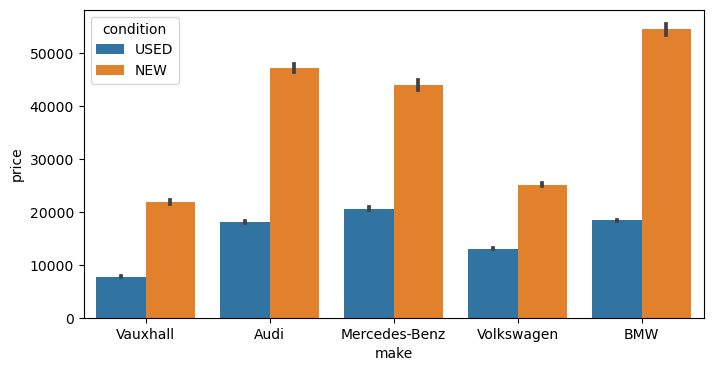

In [166]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

make_counts = normal_classic['make'].value_counts()
top_makes = make_counts.head(5).index
filtered_data = normal_classic[normal_classic['make'].isin(top_makes)]
plt.figure(figsize=(8, 4))
sns.barplot(x='make', y='price', hue='condition', data=filtered_data)
plt.show()

In [167]:
sample_reg = cars[cars['price']<300000]

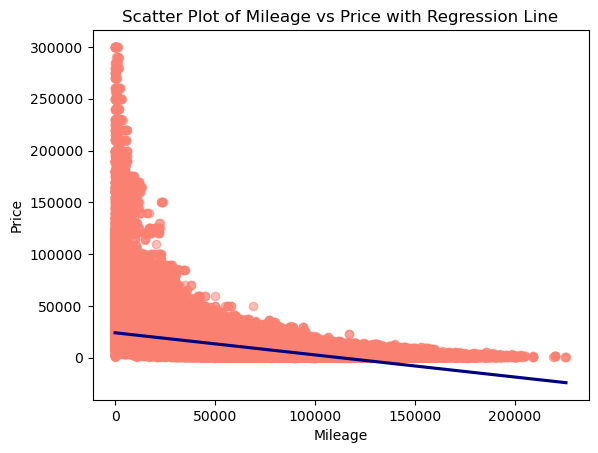

In [168]:
sns.regplot(
    x='mileage', 
    y='price', 
    data=sample_reg, 
    scatter_kws={'color': 'salmon', 'alpha': 0.5},
    line_kws={'color': 'navy'} 
)

# Add titles and labels
plt.title('Scatter Plot of Mileage vs Price with Regression Line')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

Which features should be included in model training, can be selected based on domain knowledge, exploratory data analysis and with the help of automated feature selection methods. From domain knowledge, we know a vehicle’s price mainly depends on the make of the car, whether it is new or old, how old it is, that means what is the mileage or age. So, based on the domain knowledge, mileage, make, age, condition should have strong influence on deciding the price. 

In my previous project, I used correlation matrix, doing statistical tests separately with target feature and other features and most importantly, relied on my domain knowledge to select the features for my models. However, in this project, I will try the automated process for feature selection so that methods are easily reproducable.  

## Univariate Feature Selection

In machine learning, when you have a large dataset with many features, not all of them might be equally important for predicting the target variable. Univariate feature selection helps to automatically identify and select the most relevant features, reducing model complexity and potentially improving performance.

Here's the key idea: it analyzes each feature individually in relation to the target variable. This means it doesn't consider how features interact with each other, only their independent contribution. So, basically the statistical tests I did manually in my previous project, will be automatically done here. 

### SelectKBest

This is a popular method in scikit-learn for univariate feature selection. It allows you to choose a specific number (k) of features to keep based on a scoring function.

There are two common scoring functions used with SelectKBest:

f_regression (for continuous target variables): This function measures the linear relationship between a feature and the target variable. It considers the variance of the target variable explained by the feature. Higher f_regression scores indicate a stronger relationship.

Mutual Information (MI) score (usually for categorical target variables): This function captures the mutual dependence between a feature and the target variable. It essentially measures how much information one variable provides about the other. Higher MI scores suggest a stronger association.

Here's how SelectKBest works:

It calculates the chosen scoring function (f_regression or MI) for each feature in the dataset.
It ranks the features based on their scores, with the highest-scoring features considered the most relevant.
I specify the number of features (k) I want to keep.
SelectKBest selects the top k features according to the ranking.
For example, if I set k=3 and use f_regression, SelectKBest will keep the three features that have the strongest linear relationship with the target variable.

### Difference between select K best and correlation matrix

From a correlation matrix, we can also see the relationship of each feature with the target feature and find what features have stronger relationship. select k best also measures each individual feature's relationship with the target variable. However, there is difference how they do it. A correlation matrix shows the pairwise correlation coefficients between all the features in the dataset and the target variable. On the other hand, the F-regression score in select k best method is  calculated from an F-test, which is used to determine if there's a statistically significant linear relationship between a single feature and the target variable. Higher values indicate a stronger potential relationship. A small p-value (typically less than 0.05) suggests that the observed relationship is unlikely to have occurred by chance, providing a measure of statistical significance. So, correlation provides a directional view of strength, while F-regression adds a layer of statistical significance for linear relationships.

Since, I will try different feature selection method and find out the most effective one for this dataset, I will make a copy of the dataset to do all the experiments so that my original dataset is not modified and no data leakage happens. 

I will choose mean encoding for these experiments as this encoding is more straigh forward to find the relationship amoung features. For, my main models , I do not prefer this encoding as it is prone to data leakage. 

In [169]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest, f_regression, mutual_info_regression, RFE
from sklearn.tree import DecisionTreeRegressor

# Copying the dataset for feature selection experiments
feature_selection = cars.copy()

# Splitting the data into train and test sets first
X_fs = feature_selection.drop('price', axis=1)
y_fs = feature_selection['price']
X_train_exp, X_test_exp, y_train_exp, y_test_exp = train_test_split(X_fs, y_fs, test_size=0.2, random_state=42)

features_to_encode_selection = ['colour', 'make', 'model', 'body', 'fuel']
for feature in features_to_encode_selection:
    apply_frequency_encoding(X_train_exp, feature, frequency_maps[feature], min_frequencies[feature])
    apply_frequency_encoding(X_test_exp, feature, frequency_maps[feature], min_frequencies[feature])

In [170]:
X_train_exp.head(1)

,mileage,colour,make,model,condition,registration,body,crossover,fuel,age,classic,annual_mileage
331384,75802,47548,10660.0,263.0,0,2012.0,10967.0,0,108767,9,0,8422


In [203]:
# Appling SelectKBest with f_regression
selector_f_exp = SelectKBest(score_func=f_regression, k=8)
X_train_f_best_exp = selector_f_exp.fit_transform(X_train_exp, y_train_exp)
features_f_exp = X_train_exp.columns[selector_f_exp.get_support()]

# Apply SelectKBest with mutual information
selector_mi_exp = SelectKBest(score_func=mutual_info_regression, k=8)
X_train_mi_best_exp = selector_mi_exp.fit_transform(X_train_exp, y_train_exp)
features_mi_exp = X_train_exp.columns[selector_mi_exp.get_support()]

In [207]:
# Selected features based on F-score
print("Features selected:", X_train_exp.columns[selector_f_exp.get_support()])
print("Corresponding scores:", selector_f_exp.scores_[selector_f_exp.get_support()])

Features selected: Index(['mileage', 'model', 'condition', 'registration', 'body', 'fuel', 'age',
       'annual_mileage'],
      dtype='object')
Corresponding scores: [76178.03011306  9776.11406893 30778.82751954 77887.10451329
 14558.50737342  8996.71074211 77887.10451475 34852.83855027]


In [213]:
# Creating a DataFrame for clarity and sorting
import pandas as pd

features = ['Mileage', 'Model', 'Condition', 'Registration', 'Body', 'Fuel', 'Age', 'Annual Mileage']
f_scores = [76178.03011306, 9776.11406893, 30778.82751954, 77887.10451329, 14558.50737342, 8996.71074211, 77887.10451475, 34852.83855027]

# Combine into DataFrame
df = pd.DataFrame({
    'Feature': features,
    'F-score': f_scores
})

# Sort by F-score in descending order
df_sorted = df.sort_values(by='F-score', ascending=False)
print(df_sorted)

          Feature       F-score
6             Age  77887.104515
3    Registration  77887.104513
0         Mileage  76178.030113
7  Annual Mileage  34852.838550
2       Condition  30778.827520
4            Body  14558.507373
1           Model   9776.114069
5            Fuel   8996.710742


In [209]:
# Correct way to print selected features and their corresponding MI scores
print("Features selected:", X_train_exp.columns[selector_mi_exp.get_support()])
print("Corresponding MI scores:", selector_mi_exp.scores_[selector_mi_exp.get_support()])

Features selected: Index(['mileage', 'make', 'model', 'condition', 'registration', 'body', 'age',
       'annual_mileage'],
      dtype='object')
Corresponding MI scores: [0.42788674 0.32442226 0.64203422 0.13297786 0.57703566 0.15718122
 0.57657865 0.22328848]


In [216]:
Mi_features = ['Mileage', 'Make', 'Model', 'Condition', 'Registration', 'Body', 'Age',
       'Annual_Mileage']
Mi_scores = [0.42788674, 0.32442226, 0.64203422, 0.13297786, 0.57703566, 0.15718122, 0.57657865, 0.22328848]
dfm = pd.DataFrame({
    'Feature': Mi_features,
    'Mi-score': Mi_scores
})

# Sort by Mi-score in descending order
df_sorted_Mi = dfm.sort_values(by='Mi-score', ascending=False)
print(df_sorted_Mi)

          Feature  Mi-score
2           Model  0.642034
4    Registration  0.577036
6             Age  0.576579
0         Mileage  0.427887
1            Make  0.324422
7  Annual_Mileage  0.223288
5            Body  0.157181
3       Condition  0.132978


## Recursive Feature Elimination (RFE)

This method takes a different approach. It starts with all the features and iteratively removes the least important ones based on a scoring function (similar to SelectKBest). It keeps doing this until you're left with a desired number of features.

Here's the process of RFE:

It trains a machine learning model (like a decision tree) on the entire dataset.
It calculates the importance of each feature based on the chosen scoring function (often built into the model itself).
It removes the feature with the lowest importance score.
It retrains the model on the remaining features.
Steps 2-4 are repeated until it reaches the desired number of features.

An important note:
This process does not try all the combinations of feature. Suppose, we have features A, B, C, D; it will remove the least important feature in each stage. It will not try all cominations such as (A, B, C), (A, B, D), (B, C, D) and then keep the combination that gives the best evaluation score. Rather, it wll explicitly remove the feature that has the less feature importance score. 

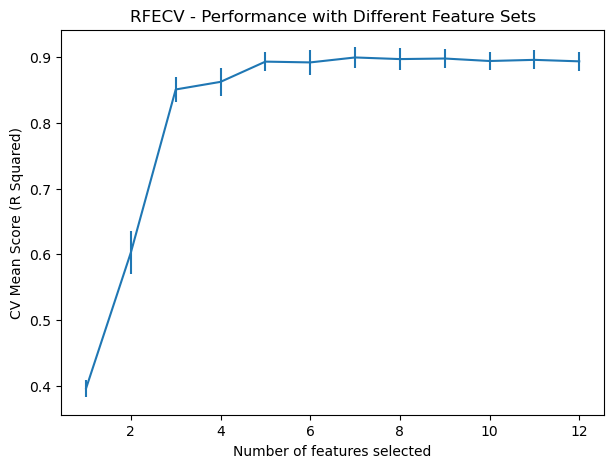

Optimal number of features : 7
Selected Features: ['mileage' 'make' 'model' 'registration' 'body' 'fuel' 'age']


In [217]:
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFECV
from sklearn.tree import DecisionTreeRegressor

# Initializing the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)

# Using RFECV with R-squared as the scoring metric
rfecv = RFECV(estimator=model, step=1, cv=5, scoring='r2')

# Fitting RFECV to the experimental training data
rfecv.fit(X_train_exp, y_train_exp)

# Get selected feature names
selected_features = rfecv.get_feature_names_out()

# Retrieve number of cross-validation scores (number of features tested)
n_scores = len(rfecv.cv_results_['mean_test_score'])

# Plotting the CV scores
fig, ax = plt.subplots(figsize=(7, 5))
ax.errorbar(range(1, n_scores + 1),
            rfecv.cv_results_['mean_test_score'],  
            yerr=rfecv.cv_results_['std_test_score']) 
ax.set_xlabel("Number of features selected")
ax.set_ylabel("CV Mean Score (R Squared)")
ax.set_title("RFECV - Performance with Different Feature Sets")
plt.show()

print("Optimal number of features : %d" % rfecv.n_features_)
print("Selected Features:", selected_features)

## Sequential Feature Selection 

Sequential Feature Selection (SFS) is a technique used in machine learning to select a subset of relevant features for model construction. It is a type of wrapper method which evaluates the performance of a model that is built using combinations of different subsets of features. SFS aims to either increase (in forward selection) or reduce (in backward selection) the set of considered features based on a specific criterion. 

### Forward Selection (Forward SFS):

It Begins the selection process with an empty set and adds features one-by-one. In each step, it adds the feature that most improves the model until adding new features does not improve the performance of the model anymore. Typically, a performance metric such as R2 or MAE for regression is used to evaluate the addition of each feature.

### Backward Elimination (Backward SFS):

It begins with the full set of features and removes features one-by-one. In each step, it removes the least significant feature that causes the least performance loss from the model. Uses a performance metric to determine the impact of removing each feature.

### Again, does not try all combinations:
This method also does not try all combinations of features. Suppose, the dataset has features A, B, C, D, E. The algorithm evaluates each of these individually first. Suppose, A gives the best performance when used alone. Next, it tries A+B, A+C, A+D, A+E and selects the combination that improves the model most. Suppose, it is A+C. The process continues with the next best addition to A+C from the remaining features, and so on.

In [221]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
from sklearn.metrics import r2_score

# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)

# Forward Sequential Feature Selection
sfs_forward = SFS(model, 
                  k_features='best', 
                  forward=True, 
                  floating=False, 
                  verbose=2,
                  scoring='r2',
                  cv=5)

# Fit SFS
sfs_forward = sfs_forward.fit(X_train_exp, y_train_exp)

# Backward Sequential Feature Selection
sfs_backward = SFS(model, 
                   k_features='best', 
                   forward=False, 
                   floating=False, 
                   verbose=2,
                   scoring='r2',
                   cv=5)

# Fit SFS
sfs_backward = sfs_backward.fit(X_train_exp, y_train_exp)

# Print the selected features from each method
print("Selected features by Forward SFS:", sfs_forward.k_feature_names_)
print("Selected features by Backward SFS:", sfs_backward.k_feature_names_)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  12 out of  12 | elapsed:    4.7s finished

[2024-05-04 12:56:05] Features: 1/12 -- score: 0.40510949732363954[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  11 out of  11 | elapsed:    8.7s finished

[2024-05-04 12:56:14] Features: 2/12 -- score: 0.7695994777496428[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.3s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   10.0s finished

[2024-05-04 12:56:24] Features: 3/12 -- score: 0.9016791836226193[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 

Selected features by Forward SFS: ('make', 'model', 'condition', 'registration', 'body', 'fuel', 'age', 'classic')
Selected features by Backward SFS: ('make', 'model', 'condition', 'registration', 'body', 'fuel', 'age', 'classic')


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.5s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.6s finished

[2024-05-04 13:00:23] Features: 1/1 -- score: 0.40510949732363954

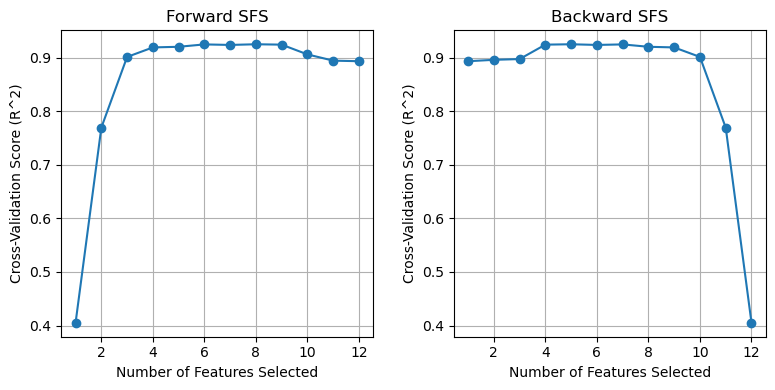

In [222]:
# Plotting results
fig, axes = plt.subplots(1, 2, figsize=(8, 4))
# Forward SFS
axes[0].plot(range(1, len(sfs_forward.subsets_)+1), 
             [sfs_forward.subsets_[i]['avg_score'] for i in sfs_forward.subsets_], 'o-')
axes[0].set_xlabel('Number of Features Selected')
axes[0].set_ylabel('Cross-Validation Score (R^2)')
axes[0].set_title('Forward SFS')
axes[0].grid(True)

# Backward SFS
axes[1].plot(range(1, len(sfs_backward.subsets_)+1), 
             [sfs_backward.subsets_[i]['avg_score'] for i in sfs_backward.subsets_], 'o-')
axes[1].set_xlabel('Number of Features Selected')
axes[1].set_ylabel('Cross-Validation Score (R^2)')
axes[1].set_title('Backward SFS')
axes[1].grid(True)

plt.tight_layout()
plt.show()

### Exhaustive Feature Selection:
Exhaustive Feature Selection is the most comprehensive form of feature selection because it literally considers every possible combination of features from the dataset. It's a brute-force approach that ensures the best subset of features is selected according to the specified evaluation criteria.

In [223]:
import matplotlib.pyplot as plt
from mlxtend.feature_selection import ExhaustiveFeatureSelector as EFS
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score

# Initialize the Decision Tree Regressor
model = DecisionTreeRegressor(random_state=42)

# Initialize Exhaustive Feature Selector
efs = EFS(model,
          min_features=1,
          max_features=4,
          scoring='r2',
          print_progress=True,
          cv=5)

# Fit EFS
efs = efs.fit(X_train_exp, y_train_exp)

# Best feature indices and corresponding names
print('Best subset (indices):', efs.best_idx_)
print('Best subset (corresponding names):', efs.best_feature_names_)
print('Best score:', efs.best_score_)

Features: 793/793

Best subset (indices): (2, 3, 5, 8)
Best subset (corresponding names): ('make', 'model', 'registration', 'fuel')
Best score: 0.9194378587338707


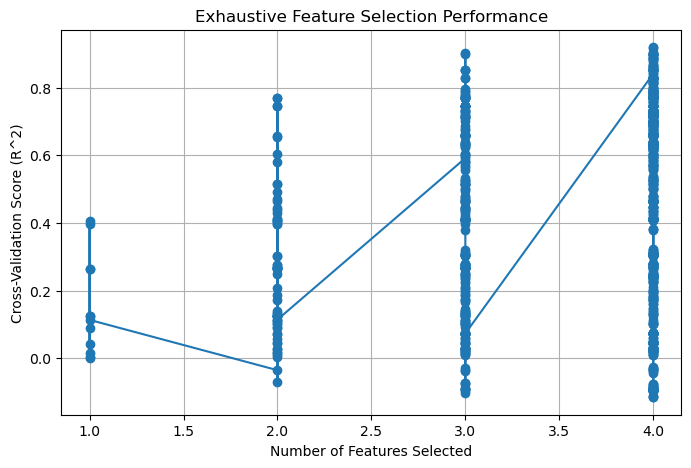

In [224]:
# Plotting the results (Performance vs. Number of features)
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot([len(efs.subsets_[i]['feature_idx']) for i in efs.subsets_],
        [efs.subsets_[i]['avg_score'] for i in efs.subsets_], 'o-')
ax.set_xlabel('Number of Features Selected')
ax.set_ylabel('Cross-Validation Score (R^2)')
ax.set_title('Exhaustive Feature Selection Performance')
ax.grid(True)
plt.show()

# Dimensionality Reduction with PCA

Principal Component Analysis (PCA) is a method used in statistics to simplify complex data while retaining the most important parts of it. Imagine we have a lot of information about something, like data on how students perform in various subjects at school. This data might be too vast and detailed to easily understand or use. PCA helps by finding the most important information that shows the biggest differences or patterns in the data. It's like looking at a cluttered room and figuring out which few items give the most information about what's going on in there. PCA points out these 'key items' or main features of the data. In machine learning, a dataset with many features (like different car features), and some of these features might be redundant or highly correlated. PCA helps to find a smaller set of new features that capture most of the important information from the original ones.

### Steps How PCA works:
1. Standardize the data: 
Before applying PCA, we need to standardize the data because PCA is sensitive to the variances of the initial variables. If one variable varies widely in its range of values, it will dominate the principal components.

2. Calculate the covariance matrix: 
This matrix shows the covariance (which is a measure of how much two variables change together) between each pair of features.

3. Calculate the eigenvalues and eigenvectors of the covariance matrix: 
The eigenvectors point in the direction of maximum variance, and the eigenvalues tell how much variance there is in the data in those directions.

4. Choose components and form a feature vector: Based on the eigenvalues, PCA chooses the principal components (directions in the data with the most variance) to keep.

### Encoding for categorical features to apply PCA
Applying Principal Component Analysis (PCA) to categorical data indeed requires careful consideration of how these variables are encoded. Since PCA is fundamentally a method designed for continuous data, the encoding strategy for categorical variables can significantly affect the results. For example, One-hot encoding transforms each categorical value into a new binary column, which takes a value of 1 if the original variable is equal to the category, and 0 otherwise. PCA on one-hot encoded data can be problematic due to the introduction of multicollinearity (high correlation among the created binary features). PCA assumes that the input features are mostly uncorrelated. In one-hot encoding, the binary features are mathematically related (since only one can be '1' at a time), which violates this assumption. Also, One-hot encoding can lead to very sparse matrices (matrices with a lot of zeros) if the categorical variable has many levels. This can make PCA less efficient and meaningful. On the other hand, Label encoding converts each category into an integer based on alphabetical ordering or another criterion. This introduces an arbitrary ordinal relationship between the categories (e.g., Red=1, Blue=2, Green=3 might imply Green > Blue > Red, which is meaningless). Applying PCA directly on label-encoded data can lead to misleading results because PCA would interpret the numerical codes as having some kind of algebraic order or interval scale, which is not intended in categorical data. Frequency encoding, target encoding or mean encoding can be particularly powerful if there's a relationship between the category and the target variable. 

## Optimal number of principal components 

Determining the optimal number of principal components to keep is a crucial step in PCA, especially to ensure that I am retaining enough information while also simplifying the data as much as possible. There are several methods to help to decide how many principal components to use:

### Explained Variance Ratio
One common approach is to look at the cumulative explained variance ratio, which tells how much of the total variance is captured by the first n principal components. The goal is typically to choose the smallest number of components that still captures a large proportion of the variance (e.g., 95%).

Here's how to calculate and visualize this:

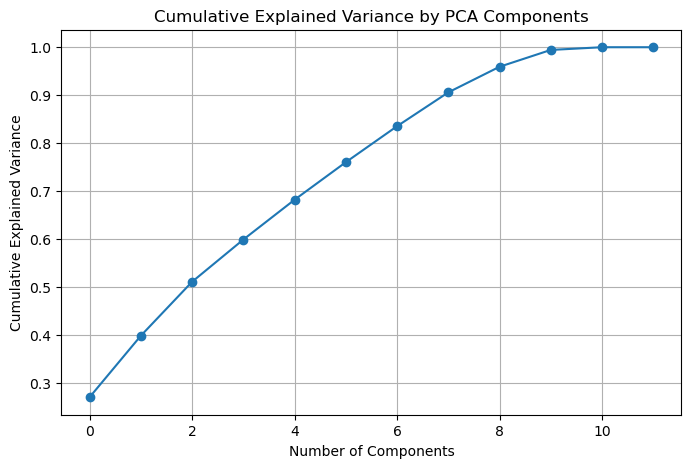

In [249]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Standardizing the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_exp)
X_test_scaled = scaler.transform(X_test_exp)
# Fitting PCA on scaled data without specifying the number of components
pca_full = PCA()
pca_full.fit(X_train_scaled)

# Calculating cumulative explained variance
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

# Plot the cumulative explained variance
plt.figure(figsize=(8, 5))
plt.plot(cumulative_variance, marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('Cumulative Explained Variance by PCA Components')
plt.grid(True)
plt.show()

So, 8 princiapl components can explain over 95% variance in the data set. 

### Scree Plot
A scree plot shows the eigenvalues (or explained variance) of each principal component in descending order. Typically, I will look for a point where the slope of the plot drops off dramatically (known as the "elbow method"), which suggests that additional components beyond this point contribute little to capturing data variability.

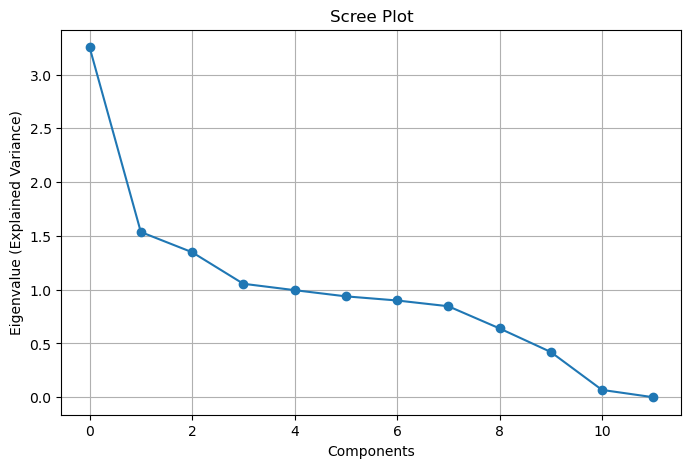

In [250]:
plt.figure(figsize=(8, 5))
plt.plot(pca_full.explained_variance_, marker='o')
plt.xlabel('Components')
plt.ylabel('Eigenvalue (Explained Variance)')
plt.title('Scree Plot')
plt.grid(True)
plt.show()

This plot suggests 10 principal components. 

### Cross-Validation

To perform cross-validation to determine the optimal number of principal components, I can use a combination of PCA and a predictive model within a cross-validation loop. This approach will help me evaluate the performance of the model with different numbers of principal components and will allow me to select the number that provides the best balance of model simplicity and predictive accuracy.

In [252]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score, KFold
import numpy as np

# Create a range of possible number of components to evaluate
n_components = range(1, min(len(X_train_exp.columns), 12))

# Create an empty list to store mean cross-validated scores
cv_scores = []

# Define the cross-validation method
cv_method = KFold(n_splits=5, shuffle=True, random_state=42)

# Loop over the number of components
for n in n_components:
    # Create a PCA object with n components
    pca = PCA(n_components=n)
    
    # Create a predictive model instance
    model = DecisionTreeRegressor()
    
    # Create a pipeline of PCA and model
    pipeline = Pipeline(steps=[('pca', pca), ('regressor', model)])
    
    # Perform cross-validation and store the scores
    scores = cross_val_score(pipeline, X_train_scaled, y_train_exp, cv=cv_method, scoring='r2')
    cv_scores.append(np.mean(scores))

# Find the number of components with the best average score
best_component_number = np.argmax(cv_scores) + 1  # +1 because index is zero-based

print("Best number of components:", best_component_number)

Best number of components: 10


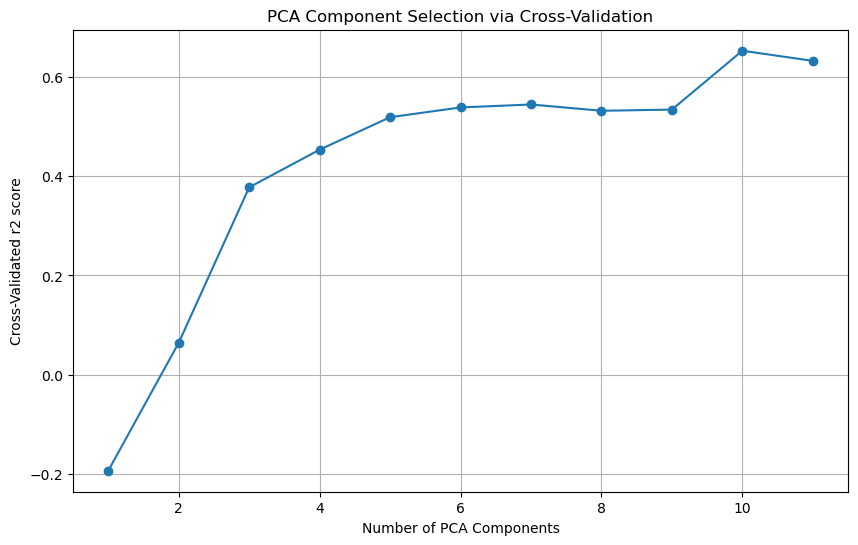

In [253]:
# plot the results
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(n_components, cv_scores, marker='o')
plt.xlabel('Number of PCA Components')
plt.ylabel('Cross-Validated r2 score')
plt.title('PCA Component Selection via Cross-Validation')
plt.grid(True)
plt.show()

It seems, 10 Principal components is the optimal number. I will choose this number to create a PCA dataset and build a random forest model. 

## Comparison of model with and without PCA

### Random Forest Model With PCA 

In [262]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
# Standardizing the features
scaler = StandardScaler()
X_train_scaled_pca = scaler.fit_transform(X_train_exp)
X_test_scaled_pca = scaler.transform(X_test_exp)

# Applying PCA
pca = PCA(n_components=8)
pca.fit(X_train_scaled_pca)

# Transform the training and test data
X_train_pca_model = pca.transform(X_train_scaled_pca)
X_test_pca_model = pca.transform(X_test_scaled_pca)

# Check the number of components and the variance ratio
print("Number of components:", pca.n_components_)
print("Explained variance ratio:", pca.explained_variance_ratio_)

# For further analysis or usage in machine learning models
columns = [f'PC{i+1}' for i in range(pca.n_components_)]
X_train_pca_data = pd.DataFrame(X_train_pca_model, columns=columns)
X_test_pca_data = pd.DataFrame(X_test_pca_model, columns=columns)

Number of components: 8
Explained variance ratio: [0.27115807 0.12799278 0.11235117 0.08790126 0.08295359 0.07815214
 0.07494985 0.07049482]


In [263]:
X_train_pca_data.head(3)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8
0,1.757339,1.429935,-1.170500,0.132234,0.250385,-0.609121,-0.378297,0.082301
1,0.649903,0.932744,0.057768,-0.607186,0.178124,0.206876,0.227688,-0.053411
2,-1.025142,1.983426,0.333231,0.376116,-0.528660,-0.464453,-0.745499,1.355180


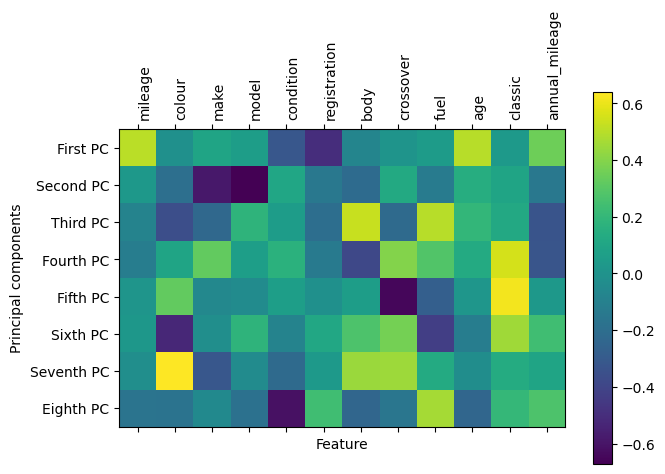

In [267]:
# Show contribution of each feature on each component
plt.matshow(pca.components_, cmap='viridis')
plt.yticks([0, 1, 2, 3, 4, 5, 6, 7], ["First PC", "Second PC", "Third PC", "Fourth PC", "Fifth PC", "Sixth PC", "Seventh PC", "Eighth PC"])
plt.colorbar()
plt.xticks(range(len(X_train_exp.columns)),
           X_train_exp.columns, rotation=90, ha='left')
plt.xlabel("Feature")
plt.ylabel("Principal components");

The heatmap visualizes how different features contribute to each principal component. The colour bar indicates whether the contribution is positive or negative, and how strong it is. Dark purple represents a strong negative contribution, while yellow indicates a strong positive one. In the first principal component, ‘registration’ has a strong negative influence, while ‘mileage’ has a moderate positive influence.

In [265]:
X_train_pca_data.shape

(315171, 8)

X_train_pca_df and X_test_pca_df: These dataframes contain the transformed data after PCA. Each dataframe has two columns, labeled PC1 and PC2. These columns represent the first and second principal components derived from your original dataset.
PC1: This is the first principal component, and it captures the maximum variance from the data. It's a linear combination of all original features but prioritized in such a way that this single component explains the majority of the variation in the dataset.
PC2: The second principal component captures the second most variance in the data, and it's orthogonal (independent) to the first principal component. This means it provides new information that wasn't captured by the first principal component.

In [266]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Random Forest regressor
rf_regressor_pca = RandomForestRegressor(random_state=42, n_jobs=-1)

# Train the model on the PCA-transformed training data
rf_regressor_pca.fit(X_train_pca_data, y_train_exp)

# Predict on the PCA-transformed training set and test set
rf_train_predictions_pca = rf_regressor_pca.predict(X_train_pca_data)
rf_test_predictions_pca = rf_regressor_pca.predict(X_test_pca_data)

# Evaluate the model performance on the training and test datasets
rf_train_mae_pca = mean_absolute_error(y_train_exp, rf_train_predictions_pca)
rf_train_r2_pca = r2_score(y_train_exp, rf_train_predictions_pca)
rf_test_mae_pca = mean_absolute_error(y_test_exp, rf_test_predictions_pca)
rf_test_r2_pca = r2_score(y_test_exp, rf_test_predictions_pca)

# Print the evaluation metrics
print(f"RF Train PCA MAE: {rf_train_mae_pca}")
print(f"RF Train PCA R-squared: {rf_train_r2_pca}")
print(f"RF Test PCA MAE: {rf_test_mae_pca}")
print(f"RF Test PCA R-squared: {rf_test_r2_pca}")

RF Train PCA MAE: 1357.679456731548
RF Train PCA R-squared: 0.9615198096364749
RF Test PCA MAE: 3349.8327700775776
RF Test PCA R-squared: 0.7421913163219407


### Final Thought on PCA
If we compare the results of random forest model with PCA data and with the original features, we can see that the model built on the oroginal data with all the features have performed better on test set as the MAE and R2 scores suggest. The whole point of applying PCA is reduce the dimensionality so that model generalizes better on unseen data. If the PCA does not improve the performance, then there is no reason to apply this method in our main pipeline. Also, PCA makes the models unexplainable. It is no longer possible to tell which feature has most influence on the target variable. Further, as I experimenented PCA with different encoding method and have found really poor model score when PCA was done on with different encoded data. This was not the case with original data. 

In [172]:
X_train.head(1)

,mileage,colour,make,model,condition,registration,body,crossover,fuel,age,classic,annual_mileage
182447,0,Orange,Toyota,C-HR,1,2021.0,SUV,0,Petrol Hybrid,0,0,0


In [173]:
X_val.head(1)

,mileage,colour,make,model,condition,registration,body,crossover,fuel,age,classic,annual_mileage
91463,50000,Blue,BMW,1 Series,0,2016.0,Hatchback,0,Petrol,5,0,10000


In [174]:
X_test.head(1)

,mileage,colour,make,model,condition,registration,body,crossover,fuel,age,classic,annual_mileage
236915,92000,Black,MINI,Clubman,0,2010.0,Estate,0,Diesel,11,0,8363


In [175]:
# Dropping unwanted features
columns_to_drop = ['crossover', 'colour', 'classic', 'annual_mileage', 'registration', 'condition']
X_train_selected = X_train.drop(columns=columns_to_drop, axis=1)
X_val_selected = X_val.drop(columns=columns_to_drop, axis=1)
X_test_selected = X_test.drop(columns=columns_to_drop, axis=1)

In [176]:
X_train_selected.head(1)

,mileage,make,model,body,fuel,age
182447,0,Toyota,C-HR,SUV,Petrol Hybrid,0


In [177]:
X_train_pipe.head(1)

,mileage,colour,make,model,condition,registration,body,crossover,fuel
182447,0,Orange,Toyota,C-HR,1,2021.0,SUV,0,Petrol Hybrid


In [178]:
columns_to_drop_final = ['crossover', 'colour']
X_train_final = X_train_pipe.drop(columns=columns_to_drop_final, axis=1)
X_val_final = X_val_pipe.drop(columns=columns_to_drop_final, axis=1)
X_test_final = X_test_pipe.drop(columns=columns_to_drop_final, axis=1)

In [179]:
X_train_final.head(1)

,mileage,make,model,condition,registration,body,fuel
182447,0,Toyota,C-HR,1,2021.0,SUV,Petrol Hybrid


In [180]:
X_val_final.head(1)

,mileage,make,model,condition,registration,body,fuel
91463,50000,BMW,1 Series,0,2016.0,Hatchback,Petrol


In [181]:
X_test_final.head(1)

,mileage,make,model,condition,registration,body,fuel
236915,92000,MINI,Clubman,0,2010.0,Estate,Diesel


### Autotrader Challenge Dataset
I will test my model on autotrader challenege dataset to see their performance on totally unseen data. This dataset was processed to match the columns of the trained dataset. Processing was done on another notebook and the processed the dataset is uploaded here. 

In [182]:
auto = pd.read_csv("/Users/shovon/Downloads/auto.csv")

In [183]:
auto.shape

(201695, 7)

In [184]:
auto.head(1)

,price,mileage,make,model,body,fuel,age
0,26995,21000,Mercedes-Benz,C Class,Convertible,Petrol,5.0


In [185]:
y_auto = auto['price']

In [186]:
X_auto = auto.drop(columns=['price'])

# Linear Regression after feature selection

In [187]:
from sklearn.pipeline import Pipeline
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Applying the logarithmic transformation to the target variable
y_train_transformed = np.log(y_train)
y_test_transformed = np.log(y_test)

linear_pipeline_freq = Pipeline([
    ('freq_encoder', FrequencyEncoder(features_to_encode=['make', 'model', 'body', 'fuel'])),
    ('regressor', LinearRegression())
])

# Fit the pipeline on the training data
linear_pipeline_freq.fit(X_train_selected, y_train_transformed)

Pipeline(steps=[('freq_encoder',
                 FrequencyEncoder(features_to_encode=['make', 'model', 'body',
                                                      'fuel'])),
                ('regressor', LinearRegression())])

In [188]:
# Make predictions on both the selected training and test datasets
y_train_pred_transformed = linear_pipeline_freq.predict(X_train_selected)
y_val_pred_transformed = linear_pipeline_freq.predict(X_val_selected)

# Converting predictions back to the original scale
y_train_pred = np.exp(y_train_pred_transformed)
y_val_pred = np.exp(y_val_pred_transformed)

# Calculate metrics for the training set on the original scale
linear_r2_train = r2_score(y_train, y_train_pred)
linear_mse_train = mean_squared_error(y_train, y_train_pred)
linear_mae_train = mean_absolute_error(y_train, y_train_pred)

# Calculate metrics for the test set on the original scale
linear_r2_test = r2_score(y_val, y_val_pred)
linear_mse_test = mean_squared_error(y_val, y_val_pred)
linear_mae_test = mean_absolute_error(y_val, y_val_pred)

# Print the metrics for the training set on the original scale
print("Linear Regression Training Metrics on Original Scale:")
print(f"Linear MAE: {linear_mae_train}")
print(f"Linear MSE: {linear_mse_train}")
print(f"Linear R-squared: {linear_r2_train}")

# Print the metrics for the test set on the original scale
print("Linear Regression Test Metrics on Original Scale:")
print(f"Mean Absolute Error: {linear_mae_test}")
print(f"Mean Squared Error: {linear_mse_test}")
print(f"R-squared: {linear_r2_test}")

Linear Regression Training Metrics on Original Scale:
Linear MAE: 5729.253534594556
Linear MSE: 176756618.7873264
Linear R-squared: 0.33100517792740325
Linear Regression Test Metrics on Original Scale:
Mean Absolute Error: 5678.665208728446
Mean Squared Error: 160032266.6535585
R-squared: 0.3513102855705422


In [189]:
linear_auto = linear_pipeline_freq.predict(X_auto)
linear_auto_predictions_selected = np.exp(linear_auto)

linear_auto_mae_selected = mean_absolute_error(y_auto, linear_auto_predictions_selected)
linear_auto_mse_selected = mean_squared_error(y_auto, linear_auto_predictions_selected)
linear_auto_r2_selected = r2_score(y_auto, linear_auto_predictions_selected)

In [190]:
print(f"MAE: {linear_auto_mae_selected}")
print(f"MSE: {linear_auto_mse_selected}")
print(f"R-squared: {linear_auto_r2_selected}")

MAE: 5062.406771032245
MSE: 59069064.379902735
R-squared: 0.40271516935601437


Feature selection did not really make much difference. 

### Linear Model With Target Encoding

In [191]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

# Define the pipeline
linear_pipeline_target = Pipeline([
    ('target_encoder', TargetEncoder(features_to_encode=['make', 'model', 'body', 'fuel'])),
    ('regressor', LinearRegression())
])

# Fit the pipeline on the training data
linear_pipeline_target.fit(X_train_selected, y_train_transformed)

Pipeline(steps=[('target_encoder',
                 TargetEncoder(features_to_encode=['make', 'model', 'body',
                                                   'fuel'])),
                ('regressor', LinearRegression())])

In [192]:

# Predict using the pipeline
y_train_pred_target_pipe = linear_pipeline_target.predict(X_train_selected)
y_val_pred_target_pipe = linear_pipeline_target.predict(X_val_selected)

# Applying the exponential function to invert the log transformation
y_train_pred_target = np.exp(y_train_pred_target_pipe)
y_val_pred_target = np.exp(y_val_pred_target_pipe)

# Evaluate the model
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

linear_r2_train_target = r2_score(y_train, y_train_pred_target)
linear_mse_train_target = mean_squared_error(y_train, y_train_pred_target)
linear_mae_train_target = mean_absolute_error(y_train, y_train_pred_target)

linear_r2_val_target = r2_score(y_val, y_val_pred_target)
linear_mse_val_target = mean_squared_error(y_val, y_val_pred_target)
linear_mae_val_target = mean_absolute_error(y_val, y_val_pred_target)

# Print training and test metrics
print("Linear Regression Training Metrics:")
print(f"MAE: {linear_mae_train_target}, MSE: {linear_mse_train_target}, R-squared: {linear_r2_train_target}")

print("Linear Regression Validation Metrics:")
print(f"MAE: {linear_mae_val_target}, MSE: {linear_mse_val_target}, R-squared: {linear_r2_val_target}")

Linear Regression Training Metrics:
MAE: 3443.9698250076362, MSE: 62620305.769485325, R-squared: 0.7629924095414288
Linear Regression Validation Metrics:
MAE: 3428.923649504624, MSE: 54580479.22928763, R-squared: 0.7787583952596459


Target encoding has massively improved the performance. 

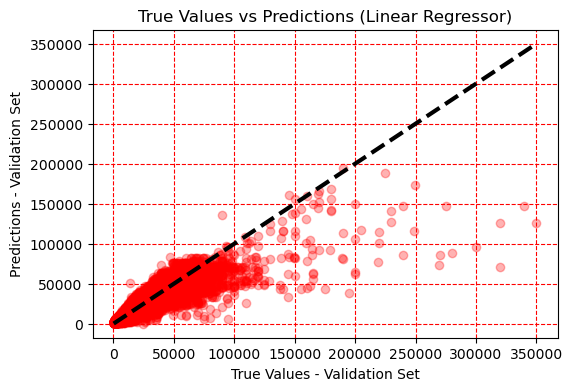

In [193]:
# Creating the plot
plt.figure(figsize=(6,4))
plt.scatter(y_val, y_val_pred_target, alpha=0.3, c='red')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=3)  # Diagonal line
plt.xlabel('True Values - Validation Set')
plt.ylabel('Predictions - Validation Set')
plt.title('True Values vs Predictions (Linear Regressor)')
plt.grid(True, linestyle='--', linewidth=0.8, color='red')
plt.show()

The plot below for the true vs predicted values of linear regression shows that the scatter is more dispersed around the identity line (dashed line), particularly for higher values. This indicates that the model has a higher error rate when predicting higher-priced items. The prediction points for higher true values trend below the line, suggesting a consistent underestimation of higher values.

In [194]:
y_test_pred_target_pipe = linear_pipeline_target.predict(X_test_selected)
y_test_pred_target = np.exp(y_test_pred_target_pipe)
linear_r2_test_target = r2_score(y_test, y_test_pred_target)
linear_mse_test_target = mean_squared_error(y_test, y_test_pred_target)
linear_mae_test_target = mean_absolute_error(y_test, y_test_pred_target)
print("Linear Regression Test Metrics:")
print(f"MAE: {linear_mae_test_target}, MSE: {linear_mse_test_target}, R-squared: {linear_r2_test_target}")

Linear Regression Test Metrics:
MAE: 3474.462907608732, MSE: 69697526.81131114, R-squared: 0.7440996736803631


### Performance on the autotrader challenge dataset

In [195]:
linear_target_predictions_selected = linear_pipeline_target.predict(X_auto)
linear_auto_predictions_target = np.exp(linear_target_predictions_selected)

linear_auto_mae_selecte = mean_absolute_error(y_auto, linear_auto_predictions_target)
linear_auto_mse_selecte = mean_squared_error(y_auto, linear_auto_predictions_target)
linear_auto_r2_selecte = r2_score(y_auto, linear_auto_predictions_target)

print(f" MAE: {linear_auto_mae_selecte}")
print(f" MSE: {linear_auto_mse_selecte}")
print(f" R-squared: {linear_auto_r2_selecte}")

 MAE: 4187.905315905203
 MSE: 37829347.50482691
 R-squared: 0.6174834381585269


To be honest, the performance on the autotrader challenge dataset is impressive. 

### Applying polynomial feature to improve linear regression

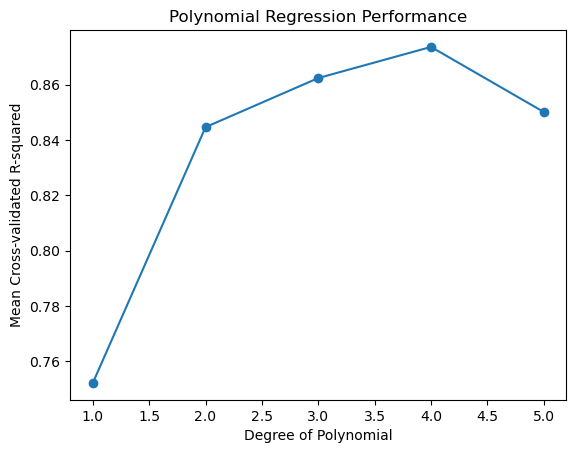

In [196]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score, KFold
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline


X = X_train_selected
y = y_train

# Setup for cross-validation
cv = KFold(n_splits=5, random_state=42, shuffle=True)

# Degrees of polynomials to test
max_degree = 5
scores = []
degrees = range(1, max_degree + 1)

for degree in degrees:
   
    model = make_pipeline(
        TargetEncoder(features_to_encode=['make', 'model', 'body', 'fuel']), 
        PolynomialFeatures(degree, include_bias=False),
        StandardScaler(),
        LinearRegression()
    )
    
    # Calculate cross-validation score using R-squared as the metric
    score = cross_val_score(model, X, y, cv=cv, scoring='r2')
    scores.append(np.mean(score))

# Plotting the results
plt.plot(degrees, scores, marker='o')
plt.xlabel('Degree of Polynomial')
plt.ylabel('Mean Cross-validated R-squared')
plt.title('Polynomial Regression Performance')
plt.show()

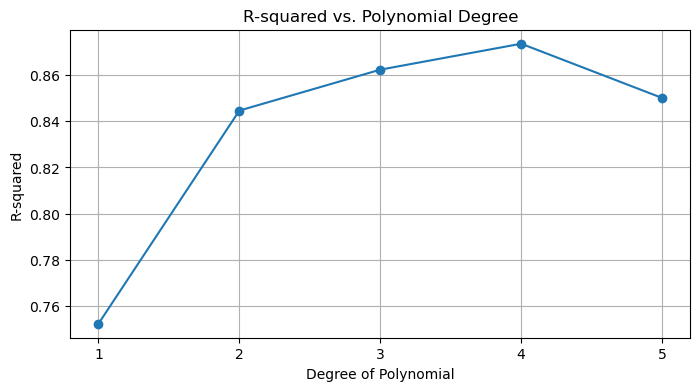

The optimal polynomial degree based on cross-validation R-squared is: 4


In [197]:
# Plot the R-squared values
plt.figure(figsize=(8, 4))
plt.plot(degrees, scores, marker='o')
plt.title('R-squared vs. Polynomial Degree')
plt.xlabel('Degree of Polynomial')
plt.ylabel('R-squared')
plt.xticks(degrees)
plt.grid(True)
plt.show()

# Print the degree with the highest R-squared
optimal_degree = degrees[np.argmax(scores)]
print(f"The optimal polynomial degree based on cross-validation R-squared is: {optimal_degree}")

In [198]:
print(X_train_selected.columns)

Index(['mileage', 'make', 'model', 'body', 'fuel', 'age'], dtype='object')


In [199]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression

# Define the pipeline
model_poly = Pipeline([
    ('target_encoder', TargetEncoder(features_to_encode=['make', 'model', 'body', 'fuel'])),
    ('poly', PolynomialFeatures(degree=3)),  # Transform to polynomial features
    ('scaler', StandardScaler()),            # Scale features
    ('regressor', LinearRegression())        # Apply linear regression
])
# Train the pipeline
model_poly.fit(X_train_selected, y_train_transformed)

Pipeline(steps=[('target_encoder',
                 TargetEncoder(features_to_encode=['make', 'model', 'body',
                                                   'fuel'])),
                ('poly', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [200]:
# Make predictions on both the polynomial and scaled training and test datasets
y_train_pred_transformed_poly = model_poly.predict(X_train_selected)
y_val_pred_transformed_poly = model_poly.predict(X_val_selected)

# Converting predictions back to the original scale
y_train_pred_poly = np.exp(y_train_pred_transformed_poly)
y_val_pred_poly = np.exp(y_val_pred_transformed_poly)

In [201]:
# Calculate metrics for the training set on the original scale
linear_r2_train_poly = r2_score(y_train, y_train_pred_poly)
linear_mse_train_poly = mean_squared_error(y_train, y_train_pred_poly)
linear_mae_train_poly = mean_absolute_error(y_train, y_train_pred_poly)

# Calculate metrics for the test set on the original scale
linear_r2_val_poly = r2_score(y_val, y_val_pred_poly)
linear_mse_val_poly = mean_squared_error(y_val, y_val_pred_poly)
linear_mae_val_poly = mean_absolute_error(y_val, y_val_pred_poly)

# Print the metrics for the training set on the original scale
print("Linear Regression Training Metrics on Original Scale:")
print(f"Linear MAE: {linear_mae_train_poly}")
print(f"Linear MSE: {linear_mse_train_poly}")
print(f"Linear R-squared: {linear_r2_train_poly}")
# Print the metrics for the validation set on the original scale
print("Linear Regression Validation Metrics on Original Scale:")
print(f"Mean Absolute Error: {linear_mae_val_poly}")
print(f"Mean Squared Error: {linear_mse_val_poly}")
print(f"R-squared: {linear_r2_val_poly}")

Linear Regression Training Metrics on Original Scale:
Linear MAE: 3068.1094275966966
Linear MSE: 47202216.71033104
Linear R-squared: 0.8213473487657355
Linear Regression Validation Metrics on Original Scale:
Mean Absolute Error: 3047.8964070822453
Mean Squared Error: 40329951.846808724
R-squared: 0.836522811970817


Adding polynomial features further improved the model, but the gains were not substantial enough to justify the reduction in explainability.

# Random Forest after feature selection

In [202]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the pipeline
rf_pipeline = Pipeline([
    ('freq_encoder', FrequencyEncoder(features_to_encode=['make', 'model', 'body', 'fuel'])),
    ('regressor', RandomForestRegressor())
])

# Fit the pipeline on the training data
rf_pipeline.fit(X_train_selected, y_train)

Pipeline(steps=[('freq_encoder',
                 FrequencyEncoder(features_to_encode=['make', 'model', 'body',
                                                      'fuel'])),
                ('regressor', RandomForestRegressor())])

In [203]:
# Predict on the training set and validation set
rf_train_predictions_selected = rf_pipeline.predict(X_train_selected)
rf_val_predictions_selected = rf_pipeline.predict(X_val_selected)

# Evaluate the model using the reduced feature set
rf_train_mae_selected = mean_absolute_error(y_train, rf_train_predictions_selected)
rf_train_mse_selected = mean_squared_error(y_train, rf_train_predictions_selected)
rf_train_r2_selected = r2_score(y_train, rf_train_predictions_selected)
rf_val_mae_selected = mean_absolute_error(y_val, rf_val_predictions_selected)
rf_val_mse_selected = mean_squared_error(y_val, rf_val_predictions_selected)
rf_val_r2_selected = r2_score(y_val, rf_val_predictions_selected)

# Print the metrics for the reduced feature set
print("Random Forest Regression Metrics on Training Set (Selected Features):")
print(f"RF Train MAE: {rf_train_mae_selected}")
print(f"RF Train MSE: {rf_train_mse_selected}")
print(f"RF Train R-squared: {rf_train_r2_selected}")

print("Random Forest Regression Metrics on Validation Set (Selected Features):")
print(f"RF Validation MAE: {rf_val_mae_selected}")
print(f"RF Validation MSE: {rf_val_mse_selected}")
print(f"RF Validation R-squared: {rf_val_r2_selected}")

Random Forest Regression Metrics on Training Set (Selected Features):
RF Train MAE: 881.9283948681943
RF Train MSE: 4190148.561568444
RF Train R-squared: 0.9841409746880425
Random Forest Regression Metrics on Validation Set (Selected Features):
RF Validation MAE: 1875.028632385653
RF Validation MSE: 15659572.71871464
RF Validation R-squared: 0.9365240275138949


Performance has not improved on less features. 

### Random Forest with Target Encoding

In [207]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the pipeline
rf_pipeline_target = Pipeline([
    ('target_encoder', TargetEncoder(features_to_encode=['make', 'model', 'body', 'fuel'])),
    ('regressor', RandomForestRegressor())
])

# Fit the pipeline on the training data
rf_pipeline_target.fit(X_train_selected, y_train)

Pipeline(steps=[('target_encoder',
                 TargetEncoder(features_to_encode=['make', 'model', 'body',
                                                   'fuel'])),
                ('regressor', RandomForestRegressor())])

In [208]:
# Predict on the training set and validation set
rf_train_predictions_target = rf_pipeline_target.predict(X_train_selected)
rf_val_predictions_target = rf_pipeline_target.predict(X_val_selected)

# Evaluate the model using the reduced feature set
rf_train_mae_target = mean_absolute_error(y_train, rf_train_predictions_target)
rf_train_mse_target = mean_squared_error(y_train, rf_train_predictions_target)
rf_train_r2_target = r2_score(y_train, rf_train_predictions_target)
rf_val_mae_target = mean_absolute_error(y_val, rf_val_predictions_target)
rf_val_mse_target = mean_squared_error(y_val, rf_val_predictions_target)
rf_val_r2_target = r2_score(y_val, rf_val_predictions_target)

# Print the metrics for the reduced feature set
print("Random Forest Regression Metrics on Training Set (Selected Features):")
print(f"RF Train MAE: {rf_train_mae_target}")
print(f"RF Train MSE: {rf_train_mse_target}")
print(f"RF Train R-squared: {rf_train_r2_target}")

print("Random Forest Regression Metrics on Validation Set (Selected Features):")
print(f"RF Validation MAE: {rf_val_mae_target}")
print(f"RF Validation MSE: {rf_val_mse_target}")
print(f"RF Validation R-squared: {rf_val_r2_target}")

Random Forest Regression Metrics on Training Set (Selected Features):
RF Train MAE: 859.935393704022
RF Train MSE: 3620881.778809873
RF Train R-squared: 0.9862955561269511
Random Forest Regression Metrics on Validation Set (Selected Features):
RF Validation MAE: 1813.4328137287253
RF Validation MSE: 13468245.919070227
RF Validation R-squared: 0.9454065559289939


Almost similar performance. Seems, random forest is not sensitive to encoding method. 

### Hypertuning of Random Forest

In [193]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.pipeline import Pipeline

# Define the pipeline
rf_search = Pipeline([
    ('target_encoder', TargetEncoder(features_to_encode=['make', 'model', 'body', 'fuel'])),
    ('regressor', RandomForestRegressor())
])

# Parameter distributions
param_distributions = {
    'regressor__n_estimators': [100, 200, 300, 400, 500], 
    'regressor__max_depth': [None, 10, 20, 30, 40, 50],
    'regressor__min_samples_split': randint(2, 20),
    'regressor__min_samples_leaf': randint(1, 10),
    'regressor__max_features': [1,2,3,4,5]
}

# Initialize the Randomized Search with the pipeline
rf_random_search = RandomizedSearchCV(estimator=rf_search,
                                      param_distributions=param_distributions,
                                      verbose=2,
                                      random_state=42,
                                      n_jobs=-1)

# Fit the random search model to the selected features
rf_random_search.fit(X_train_selected, y_train)



Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END regressor__max_depth=20, regressor__max_features=3, regressor__min_samples_leaf=8, regressor__min_samples_split=5, regressor__n_estimators=300; total time= 1.3min
[CV] END regressor__max_depth=50, regressor__max_features=5, regressor__min_samples_leaf=2, regressor__min_samples_split=13, regressor__n_estimators=200; total time= 1.4min
[CV] END regressor__max_depth=20, regressor__max_features=2, regressor__min_samples_leaf=3, regressor__min_samples_split=13, regressor__n_estimators=400; total time= 1.3min
[CV] END regressor__max_depth=30, regressor__max_features=5, regressor__min_samples_leaf=8, regressor__min_samples_split=8, regressor__n_estimators=200; total time= 1.3min
[CV] END regressor__max_depth=30, regressor__max_features=5, regressor__min_samples_leaf=1, regressor__min_samples_split=13, regressor__n_estimators=200; total time= 1.5min
[CV] END regressor__max_depth=20, regressor__max_features=2, regressor__mi

TypeError: RandomForestRegressor.__init__() got an unexpected keyword argument 'regressor__max_depth'

[CV] END regressor__max_depth=20, regressor__max_features=4, regressor__min_samples_leaf=2, regressor__min_samples_split=3, regressor__n_estimators=300; total time= 1.8min
[CV] END regressor__max_depth=10, regressor__max_features=3, regressor__min_samples_leaf=5, regressor__min_samples_split=2, regressor__n_estimators=500; total time= 1.5min
[CV] END regressor__max_depth=50, regressor__max_features=5, regressor__min_samples_leaf=4, regressor__min_samples_split=16, regressor__n_estimators=300; total time= 2.0min
[CV] END regressor__max_depth=None, regressor__max_features=3, regressor__min_samples_leaf=7, regressor__min_samples_split=6, regressor__n_estimators=200; total time=  51.0s
[CV] END regressor__max_depth=10, regressor__max_features=1, regressor__min_samples_leaf=2, regressor__min_samples_split=17, regressor__n_estimators=100; total time=   8.2s
[CV] END regressor__max_depth=40, regressor__max_features=5, regressor__min_samples_leaf=7, regressor__min_samples_split=4, regressor__n

In [328]:
# Get cross-validation results
cv_results = rf_random_search.cv_results_

# Extract cross-validation scores
cv_scores = cv_results['mean_test_score']

# Print cross-validation scores
print("Cross-Validation Scores (R2):", cv_scores)

Cross-Validation Scores (R2): [0.93050148 0.92966996 0.9455585  0.94770108 0.92917896 0.93439316
 0.93341849 0.93015074 0.88911415 0.93163071 0.91825886 0.91067334
 0.9305095  0.94517432 0.88405654 0.9126285  0.93738359 0.91833755
 0.93163767 0.88546877 0.93922117 0.94739722 0.92832031 0.92429144
 0.93486307 0.9338879  0.94609337 0.91837484 0.93498489 0.91264656
 0.92836028 0.9286131  0.92553586 0.91761009 0.91754589 0.94675547
 0.94019893 0.94339607 0.93165979 0.93471005 0.91483672 0.93550988
 0.92930818 0.92830204 0.92940219 0.93377908 0.92264326 0.90973567
 0.93874163 0.92944232 0.91396027 0.91671316 0.93503553 0.93144308
 0.94605434 0.94108298 0.9183253  0.91635254 0.9479652  0.88795991
 0.93840453 0.93139874 0.9124011  0.93166147 0.91078668 0.94645582
 0.9274407  0.91786059 0.93407609 0.93334515 0.9459832  0.93092218
 0.91805414 0.89538073 0.9468979  0.93156539 0.91697103 0.9214512
 0.91141917 0.93148525 0.93122258 0.94582955 0.94404035 0.94815518
 0.93301059 0.91020943 0.94462064

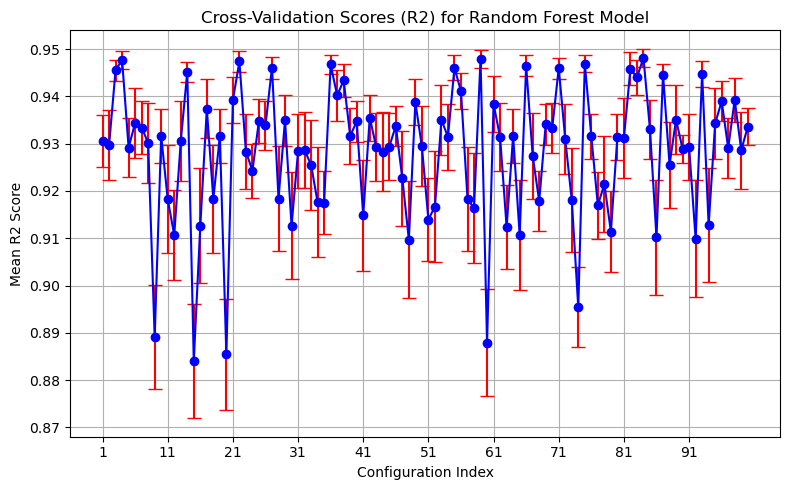

In [339]:
import matplotlib.pyplot as plt

# Get cross-validation results
cv_results = rf_random_search.cv_results_

# Extract cross-validation scores
cv_scores = cv_results['mean_test_score']
cv_std = cv_results['std_test_score']  # Standard deviation of the scores

# Plot cross-validation scores
plt.figure(figsize=(8, 5))
plt.errorbar(range(1, len(cv_scores) + 1), cv_scores, yerr=cv_std, fmt='-o', color='b', ecolor='r', capsize=5)
plt.title('Cross-Validation Scores (R2) for Random Forest Model')
plt.xlabel('Configuration Index')
plt.ylabel('Mean R2 Score')
plt.grid(True)
plt.xticks(range(1, len(gb_cv_scores) + 1, 10))  # Show every 10th label for clarity
plt.tight_layout()
plt.show()

The plot presented for random forest shows that the mean R² scores are primarily between approximately 0.88 and 0.94 across the different folds. This indicates a relatively high level of predictive accuracy, as R² scores close to 1 suggest that the model explains a substantial portion of the variance in the dependent variable. The error bars in most cases are quite small, suggesting that the variability in model performance across different data subsets is limited. This is a positive indicator of model stability and reliability. There do not appear to be any systematic trends or significant outliers in the scores across the folds, which is good. It suggests that there aren't particular subsets of data where the model performs exceptionally poorly or exceptionally well, which could indicate overfitting or biased model training. The consistency in scores (as shown by the small error bars and lack of significant outliers) suggests that the model is generalizing well across different subsets of data.

In [201]:
# Best parameters and best score
best_params_rf = rf_random_search.best_params_
best_score_rf = rf_random_search.best_score_
print("Best Parameters (Randomized Search for RF):", best_params_rf)
print("Best Score (Randomized Search for RF):", best_score_rf)

# Create a new model with the best parameters found
rf_best = rf_search.set_params(**best_params_rf)
rf_best.fit(X_train_selected, y_train)

Best Parameters (Randomized Search for RF): {'regressor__max_depth': 20, 'regressor__max_features': 4, 'regressor__min_samples_leaf': 1, 'regressor__min_samples_split': 2, 'regressor__n_estimators': 500}
Best Score (Randomized Search for RF): 0.9481551784968364


Pipeline(steps=[('target_encoder',
                 TargetEncoder(features_to_encode=['make', 'model', 'body',
                                                   'fuel'])),
                ('regressor',
                 RandomForestRegressor(max_depth=20, max_features=4,
                                       n_estimators=500))])

In [202]:
# Predictions with the tuned model on the selected features
rf_best_train_predictions = rf_best.predict(X_train_selected)
rf_best_val_predictions = rf_best.predict(X_val_selected)

# Evaluation on the selected features
rf_best_train_mae = mean_absolute_error(y_train, rf_best_train_predictions)
rf_best_train_mse = mean_squared_error(y_train, rf_best_train_predictions)
rf_best_train_r2 = r2_score(y_train, rf_best_train_predictions)
rf_best_val_mae = mean_absolute_error(y_val, rf_best_val_predictions)
rf_best_val_mse = mean_squared_error(y_val, rf_best_val_predictions)
rf_best_val_r2 = r2_score(y_val, rf_best_val_predictions)

# Print the evaluation metrics for the best model
print(f"RF Best Model Train MAE: {rf_best_train_mae}")
print(f"RF Best Model Train MSE: {rf_best_train_mse}")
print(f"RF Best Model Train R-squared: {rf_best_train_r2}")
print(f"RF Best Model Validation MAE: {rf_best_val_mae}")
print(f"RF Best Model Validation MSE: {rf_best_val_mse}")
print(f"RF Best Model Validation R-squared: {rf_best_val_r2}")

RF Best Model Train MAE: 1165.389552367858
RF Best Model Train MSE: 4623616.083967166
RF Best Model Train R-squared: 0.9825003711847005
RF Best Model Validation MAE: 1712.162623952906
RF Best Model Validation MSE: 12269668.538493643
RF Best Model Validation R-squared: 0.9502649812639984


Strong robust performance. 

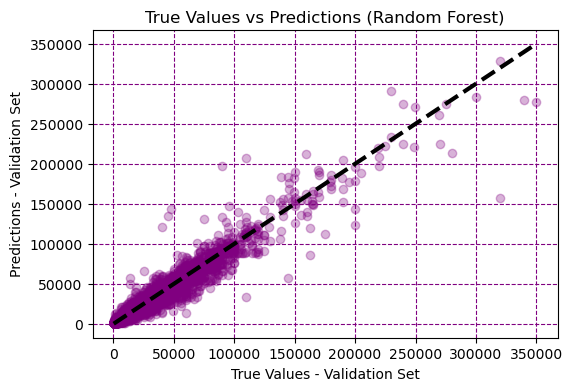

In [367]:
# Creating the plot
plt.figure(figsize=(6,4))
plt.scatter(y_val, rf_best_val_predictions, alpha=0.3, c='purple')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=3)  # Diagonal line
plt.xlabel('True Values - Validation Set')
plt.ylabel('Predictions - Validation Set')
plt.title('True Values vs Predictions (Random Forest)')
plt.grid(True, linestyle='--', linewidth=0.8, color='purple')
plt.show()

The points are generally closer to the identity for the Random Forest that suggests better accuracy and consistency. However, there is still some visible dispersion, particularly at higher value ranges. This model appears to predict more accurately across a wider range of values but may also slightly underestimate the very highest values.

### Performance on Test set

In [326]:
rf_best_test_predictions = rf_best.predict(X_test_selected)
rf_best_test_mae = mean_absolute_error(y_test, rf_best_test_predictions)
rf_best_test_mse = mean_squared_error(y_test, rf_best_test_predictions)
rf_best_test_r2 = r2_score(y_test, rf_best_test_predictions)
print(f"RF Best Model Validation MAE: {rf_best_test_mae}")
print(f"RF Best Model Validation MSE: {rf_best_test_mse}")
print(f"RF Best Model Validation R-squared: {rf_best_test_r2}")

RF Best Model Validation MAE: 1734.6585442012156
RF Best Model Validation MSE: 13971078.902312294
RF Best Model Validation R-squared: 0.9487040098306775


### Evaluating performance on Autotrader challeng data set

In [205]:
rf_auto_predictions_best = rf_best.predict(X_auto)
rf_auto_mae_best = mean_absolute_error(y_auto, rf_auto_predictions_best)
rf_auto_mse_best = mean_squared_error(y_auto, rf_auto_predictions_best)
rf_auto_r2_best = r2_score(y_auto, rf_auto_predictions_best)
print(f"RF MAE: {rf_auto_mae_best}")
print(f"RF MSE: {rf_auto_mse_best}")
print(f"RF R-squared: {rf_auto_r2_best}")

RF MAE: 3900.174721294702
RF MSE: 29325900.640362166
RF R-squared: 0.7034671907987666


Quite strong performance on a totally unseen data. 

### Gradient Boosting model

In [210]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the pipeline including the target encoder
gb_pipeline_freq = Pipeline([
    ('freq_encoder', FrequencyEncoder(features_to_encode=['make', 'model', 'body', 'fuel'])),
    ('regressor', GradientBoostingRegressor(random_state=42))
])
# Train the model on the training dataset
gb_pipeline_freq.fit(X_train_selected, y_train)

Pipeline(steps=[('freq_encoder',
                 FrequencyEncoder(features_to_encode=['make', 'model', 'body',
                                                      'fuel'])),
                ('regressor', GradientBoostingRegressor(random_state=42))])

In [211]:
# Predict on the training set and validation set
gb_train_predictions_freq = gb_pipeline_freq.predict(X_train_selected)
gb_val_predictions_freq = gb_pipeline_freq.predict(X_val_selected)

# Evaluate the model
gb_train_mae_freq = mean_absolute_error(y_train, gb_train_predictions_freq)
gb_train_mse_freq = mean_squared_error(y_train, gb_train_predictions_freq)
gb_train_r2_freq = r2_score(y_train, gb_train_predictions_freq)
gb_val_mae_freq = mean_absolute_error(y_val, gb_val_predictions_freq)
gb_val_mse_freq = mean_squared_error(y_val, gb_val_predictions_freq)
gb_val_r2_freq = r2_score(y_val, gb_val_predictions_freq)

print(f"Gradient Boosting Train MAE: {gb_train_mae_freq}")
print(f"Gradient Boosting Train MSE: {gb_train_mse_freq}")
print(f"Gradient Boosting Train R-squared: {gb_train_r2_freq}")
print(f"Gradient Boosting Validation MAE: {gb_val_mae_freq}")
print(f"Gradient Boosting Validation MSE: {gb_val_mse_freq}")
print(f"Gradient Boosting Validation R-squared: {gb_val_r2_freq}")

Gradient Boosting Train MAE: 3842.1255675684565
Gradient Boosting Train MSE: 57333742.237123445
Gradient Boosting Train R-squared: 0.783001185755706
Gradient Boosting Validation MAE: 3863.2300967175697
Gradient Boosting Validation MSE: 51987159.77720184
Gradient Boosting Validation R-squared: 0.7892703981824045


### With Target Encoding

In [212]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the pipeline including the target encoder
gb_pipeline_target = Pipeline([
    ('target_encoder', TargetEncoder(features_to_encode=['make', 'model', 'body', 'fuel'])),
    ('regressor', GradientBoostingRegressor(random_state=42))
])
# Train the model on the training dataset
gb_pipeline_target.fit(X_train_selected, y_train)

Pipeline(steps=[('target_encoder',
                 TargetEncoder(features_to_encode=['make', 'model', 'body',
                                                   'fuel'])),
                ('regressor', GradientBoostingRegressor(random_state=42))])

In [213]:
# Predict on the training set and validation set
gb_train_predictions_target = gb_pipeline_target.predict(X_train_selected)
gb_val_predictions_target = gb_pipeline_target.predict(X_val_selected)

# Evaluate the model
gb_train_mae_target = mean_absolute_error(y_train, gb_train_predictions_target)
gb_train_mse_target = mean_squared_error(y_train, gb_train_predictions_target)
gb_train_r2_target = r2_score(y_train, gb_train_predictions_target)
gb_val_mae_target = mean_absolute_error(y_val, gb_val_predictions_target)
gb_val_mse_target = mean_squared_error(y_val, gb_val_predictions_target)
gb_val_r2_target = r2_score(y_val, gb_val_predictions_target)

print(f"Gradient Boosting Train MAE: {gb_train_mae_target}")
print(f"Gradient Boosting Train MSE: {gb_train_mse_target}")
print(f"Gradient Boosting Train R-squared: {gb_train_r2_target}")
print(f"Gradient Boosting Validation MAE: {gb_val_mae_target}")
print(f"Gradient Boosting Validation MSE: {gb_val_mse_target}")
print(f"Gradient Boosting Validation R-squared: {gb_val_r2_target}")

Gradient Boosting Train MAE: 2627.6245047366156
Gradient Boosting Train MSE: 24322281.554287206
Gradient Boosting Train R-squared: 0.9079441520637606
Gradient Boosting Validation MAE: 2639.9214382701552
Gradient Boosting Validation MSE: 25031506.415726595
Gradient Boosting Validation R-squared: 0.8985349574301255


Saame as Linear regression, performance boosted with target encoding. 

### Hypertuning the Gradient Boosting

In [210]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Define the pipeline including the target encoder and the regressor
gb_pipeline_tune = Pipeline([
    ('target_encoder', TargetEncoder(features_to_encode=['make', 'model', 'body', 'fuel'])),
    ('regressor', GradientBoostingRegressor(random_state=42))
])

# Define the parameter distributions
param_distributions = {
    'regressor__n_estimators': [100, 200, 300, 400, 500],
    'regressor__max_depth': [2,3,4,5],  
    'regressor__min_samples_split': randint(2, 20),
    'regressor__min_samples_leaf': randint(1, 10),
    'regressor__learning_rate': [0.01, 0.05, 0.1, 0.2] 
}

# Initialize the Randomized Search within the pipeline
gb_random_search = RandomizedSearchCV(estimator=gb_pipeline_tune,
                                      param_distributions=param_distributions,
                                      n_iter=100,
                                      cv=5,
                                      scoring='r2',
                                      verbose=2,
                                      random_state=42,
                                      n_jobs=-1)

# Fit the random search model
gb_random_search.fit(X_train_selected, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('target_encoder',
                                              TargetEncoder(features_to_encode=['make',
                                                                                'model',
                                                                                'body',
                                                                                'fuel'])),
                                             ('regressor',
                                              GradientBoostingRegressor(random_state=42))]),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'regressor__learning_rate': [0.01, 0.05,
                                                                     0.1, 0.2],
                                        'regressor__max_depth': [2, 3, 4, 5],
                                        'regressor__min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x17b527890>,
                                        'regressor__min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x173993610>,
                                        'regressor__n_estimators': [100, 200,
                                                                    300, 400,
                                                                    500]},
                   random_state=42, scoring='r2', verbose=2)

In [335]:
import matplotlib.pyplot as plt

# Extract cross-validation results
gb_cv_results = gb_random_search.cv_results_

# Extract mean R² scores and standard deviation of scores
gb_cv_scores = gb_cv_results['mean_test_score']
gb_cv_std = gb_cv_results['std_test_score']


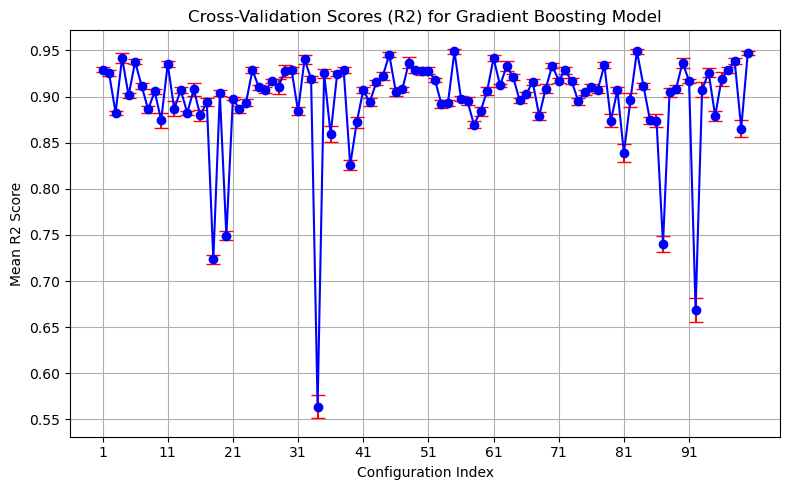

In [340]:
# Generate the plot
plt.figure(figsize=(8, 5))
plt.errorbar(range(1, len(gb_cv_scores) + 1), gb_cv_scores, yerr=gb_cv_std, fmt='-o', color='b', ecolor='r', capsize=5)
plt.title('Cross-Validation Scores (R2) for Gradient Boosting Model')
plt.xlabel('Configuration Index')
plt.ylabel('Mean R2 Score')
plt.grid(True)
plt.xticks(range(1, len(gb_cv_scores) + 1, 10))  # Show every 10th label for clarity
plt.tight_layout()
plt.show()

The second plot for gradient boosting model shows that the mean R² scores generally range from about 0.70 to 0.95, with most configurations scoring above 0.85. This suggests that the model is capable of explaining a significant proportion of the variance in the dependent variable for many of the parameter sets but in comparison to random forest, the performance is not as good. However, the small error bars for most configurations indicates that the model's performance is consistent across different subsets of data for these configurations. Notably, there are a few configurations (particularly noticeable around indices 33 and 92) where the standard deviation is quite large, suggesting significant variability in model performance. These could indicate parameter settings where the model may be sensitive to the specific characteristics of the training data. Also, some for some configurations, the model performed really poorly. Configurations where the mean R² score is high and the error bars are short indicate good generalization, but configurations with high mean R² scores but also large standard deviations could be overfitting to some of the training folds.

In [213]:
# Get the best parameters and the best score
best_params_gb = gb_random_search.best_params_
best_score_gb = gb_random_search.best_score_

print("Best Parameters (Randomized Search):", best_params_gb)
print("Best Score (Randomized Search):", best_score_gb)

# Create a new model with the best parameters
gb_best = gb_pipeline_tune.set_params(**best_params_gb)
gb_best.fit(X_train_selected, y_train)

Best Parameters (Randomized Search): {'regressor__learning_rate': 0.2, 'regressor__max_depth': 5, 'regressor__min_samples_leaf': 3, 'regressor__min_samples_split': 9, 'regressor__n_estimators': 400}
Best Score (Randomized Search): 0.949158086759262


Pipeline(steps=[('target_encoder',
                 TargetEncoder(features_to_encode=['make', 'model', 'body',
                                                   'fuel'])),
                ('regressor',
                 GradientBoostingRegressor(learning_rate=0.2, max_depth=5,
                                           min_samples_leaf=3,
                                           min_samples_split=9,
                                           n_estimators=400,
                                           random_state=42))])

In [214]:
# Predictions with the tuned model
gb_best_train_predictions = gb_best.predict(X_train_selected)
gb_best_val_predictions = gb_best.predict(X_val_selected)

# Evaluation
gb_best_val_mae = mean_absolute_error(y_val, gb_best_val_predictions)
gb_best_val_mse = mean_squared_error(y_val, gb_best_val_predictions)
gb_best_val_r2 = r2_score(y_val, gb_best_val_predictions)

gb_best_train_mae = mean_absolute_error(y_train, gb_best_train_predictions)
gb_best_train_mse = mean_squared_error(y_train, gb_best_train_predictions)
gb_best_train_r2 = r2_score(y_train, gb_best_train_predictions)

print(f"Optimized Gradient Boosting Train MAE: {gb_best_train_mae}")
print(f"Optimized Gradient Boosting Train MSE: {gb_best_train_mse}")
print(f"Optimized Gradient Boosting Train R-squared: {gb_best_train_r2}")

print(f"Optimized Gradient Boosting Validation MAE: {gb_best_val_mae}")
print(f"Optimized Gradient Boosting Validation MSE: {gb_best_val_mse}")
print(f"Optimized Gradient Boosting Validation R-squared: {gb_best_val_r2}")

Optimized Gradient Boosting Train MAE: 1715.6799621291186
Optimized Gradient Boosting Train MSE: 9207577.513014164
Optimized Gradient Boosting Train R-squared: 0.9651508287367159
Optimized Gradient Boosting Validation MAE: 1798.3043324605524
Optimized Gradient Boosting Validation MSE: 12586498.97525469
Optimized Gradient Boosting Validation R-squared: 0.9489807112236945


In [325]:
gb_best_test_predictions = gb_best.predict(X_test_selected)
gb_best_test_mae = mean_absolute_error(y_test, gb_best_test_predictions)
gb_best_test_mse = mean_squared_error(y_test, gb_best_test_predictions)
gb_best_test_r2 = r2_score(y_test, gb_best_test_predictions)
print(f"Optimized Gradient Boosting test MAE: {gb_best_test_mae}")
print(f"Optimized Gradient Boosting test MSE: {gb_best_test_mse}")
print(f"Optimized Gradient Boosting test R-squared: {gb_best_test_r2}")

Optimized Gradient Boosting test MAE: 1832.7643858399808
Optimized Gradient Boosting test MSE: 14322727.344118977
Optimized Gradient Boosting test R-squared: 0.9474129030278243


### Autotrader challenge data set

In [317]:
rf_auto_predictions_gb = gb_best.predict(X_auto)
rf_auto_mae_gb = mean_absolute_error(y_auto, rf_auto_predictions_gb)
rf_auto_mse_gb = mean_squared_error(y_auto, rf_auto_predictions_gb)
rf_auto_r2_gb = r2_score(y_auto, rf_auto_predictions_gb)
print(f"RF MAE: {rf_auto_mae_gb}")
print(f"RF MSE: {rf_auto_mse_gb}")
print(f"RF R-squared: {rf_auto_r2_gb}")

RF MAE: 3937.250076231934
RF MSE: 28224761.170669977
RF R-squared: 0.7146015114211579


In [251]:
from sklearn.pipeline import Pipeline

# Define the pipeline including target encoding
target_encoding_pipeline = Pipeline([
    ('target_encoder', TargetEncoder(features_to_encode=['make', 'model', 'body', 'fuel']))
])

# Fit and transform the training data
X_train_encoded = target_encoding_pipeline.fit_transform(X_train_selected, y_train)

# Transform the validation and test data
X_val_encoded = target_encoding_pipeline.transform(X_val_selected)
X_test_encoded = target_encoding_pipeline.transform(X_test_selected)

### Stacker Ensemble 

For some reason, I gettinng errors to create ensember model using random forest and gradient boosting model I created using pipeline. So, I rebuild those models without pipeline.

In [252]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Parameter distributions
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': [2,3,4,5]  # Explicit values for max_features
}

# Initialize the Randomized Search with RandomForest
rf_random_search_new = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=42, n_jobs=-1),
                                      param_distributions=param_distributions,
                                      n_iter=100,
                                      cv=5,
                                      scoring='r2',
                                      verbose=2,
                                      random_state=42,
                                      n_jobs=-1)

# Fit the random search model
rf_random_search_new.fit(X_train_encoded, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END max_depth=30, max_features=2, min_samples_leaf=8, min_samples_split=8, n_estimators=200; total time=  36.7s
[CV] END max_depth=50, max_features=2, min_samples_leaf=2, min_samples_split=13, n_estimators=200; total time=  40.3s
[CV] END max_depth=30, max_features=2, min_samples_leaf=8, min_samples_split=8, n_estimators=200; total time=  37.0s
[CV] END max_depth=50, max_features=2, min_samples_leaf=2, min_samples_split=13, n_estimators=200; total time=  39.9s
[CV] END max_depth=30, max_features=2, min_samples_leaf=8, min_samples_split=8, n_estimators=200; total time=  37.1s
[CV] END max_depth=30, max_features=2, min_samples_leaf=1, min_samples_split=13, n_estimators=200; total time=  41.7s
[CV] END max_depth=30, max_features=2, min_samples_leaf=8, min_samples_split=8, n_estimators=200; total time=  36.7s
[CV] END max_depth=50, max_features=2, min_samples_leaf=2, min_samples_split=13, n_estimators=200; total time=  39.

RandomizedSearchCV(cv=5,
                   estimator=RandomForestRegressor(n_jobs=-1, random_state=42),
                   n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [None, 10, 20, 30, 40, 50],
                                        'max_features': [2, 3, 4, 5],
                                        'min_samples_leaf': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x34a57cbd0>,
                                        'min_samples_split': <scipy.stats._distn_infrastructure.rv_discrete_frozen object at 0x62081c790>,
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, scoring='r2', verbose=2)

In [254]:
# Best parameters and best score
best_params_rf_new = rf_random_search_new.best_params_
best_score_rf_new = rf_random_search_new.best_score_
print("Best Parameters (Randomized Search for RF):", best_params_rf_new)
print("Best Score (Randomized Search for RF):", best_score_rf_new)
# Create a new model with the best parameters
rf_best_new = RandomForestRegressor(**best_params_rf_new, random_state=42, n_jobs=-1)
rf_best_new.fit(X_train_encoded, y_train)

# Predictions with the tuned model
rf_best_train_predictions_new = rf_best_new.predict(X_train_encoded)
rf_best_val_predictions_new = rf_best_new.predict(X_val_encoded)

# Evaluation
rf_best_train_mae_new = mean_absolute_error(y_train, rf_best_train_predictions_new)
rf_best_train_mse_new = mean_squared_error(y_train, rf_best_train_predictions_new)
rf_best_train_r2_new = r2_score(y_train, rf_best_train_predictions_new)
rf_best_val_mae_new = mean_absolute_error(y_val, rf_best_val_predictions_new)
rf_best_val_mse_new = mean_squared_error(y_val, rf_best_val_predictions_new)
rf_best_val_r2_new = r2_score(y_val, rf_best_val_predictions_new)

print(f"RF Best Model Train MAE: {rf_best_train_mae_new}")
print(f"RF Best Model Train MSE: {rf_best_train_mse_new}")
print(f"RF Best Model Train R-squared: {rf_best_train_r2_new}")
print(f"RF Best Model Validation MAE: {rf_best_val_mae_new}")
print(f"RF Best Model Validation MSE: {rf_best_val_mse_new}")
print(f"RF Best Model Validation R-squared: {rf_best_val_r2_new}")

Best Parameters (Randomized Search for RF): {'max_depth': 20, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 500}
Best Score (Randomized Search for RF): 0.9502237085583218
RF Best Model Train MAE: 1310.7943048616369
RF Best Model Train MSE: 6462947.446916534
RF Best Model Train R-squared: 0.9755388035425325
RF Best Model Validation MAE: 1691.7745886351136
RF Best Model Validation MSE: 11928618.00221889
RF Best Model Validation R-squared: 0.9516474273144628


In [253]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

# Define the parameter distributions
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of boosting stages to perform
    'max_depth': [2, 3, 4, 5],  # Maximum depth of the individual regression estimators
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'learning_rate': [0.01, 0.05, 0.1, 0.2]  # Shrinks the contribution of each tree
}

# Initialize the Randomized Search
gb_random_search_new = RandomizedSearchCV(estimator=GradientBoostingRegressor(random_state=42),
                                      param_distributions=param_distributions,
                                      n_iter=100,
                                      cv=5,
                                      scoring='r2',
                                      verbose=2,
                                      random_state=42,
                                      n_jobs=-1)

# Fit the random search model
gb_random_search_new.fit(X_train_encoded, y_train)

# Get the best parameters and the best score
best_params_gb_new = gb_random_search_new.best_params_
best_score_gb_new = gb_random_search_new.best_score_

print("Best Parameters (Randomized Search):", best_params_gb_new)
print("Best Score (Randomized Search):", best_score_gb_new)

# Create a new model with the best parameters
gb_best_new = GradientBoostingRegressor(**best_params_gb_new, random_state=42)
gb_best_new.fit(X_train_encoded, y_train)



Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters (Randomized Search): {'learning_rate': 0.2, 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 400}
Best Score (Randomized Search): 0.9501960047979358


GradientBoostingRegressor(learning_rate=0.2, max_depth=5, min_samples_leaf=3,
                          min_samples_split=9, n_estimators=400,
                          random_state=42)

In [255]:
# Predictions with the tuned model
gb_best_val_predictions_new = gb_best_new.predict(X_val_encoded)

# Evaluation
gb_best_val_mae_new = mean_absolute_error(y_val, gb_best_val_predictions_new)
gb_best_val_mse_new = mean_squared_error(y_val, gb_best_val_predictions_new)
gb_best_val_r2_new = r2_score(y_val, gb_best_val_predictions_new)

print(f"Optimized Gradient Boosting Validation MAE: {gb_best_val_mae_new}")
print(f"Optimized Gradient Boosting Validation MSE: {gb_best_val_mse_new}")
print(f"Optimized Gradient Boosting Validation R-squared: {gb_best_val_r2_new}")

Optimized Gradient Boosting Validation MAE: 1798.9056322158112
Optimized Gradient Boosting Validation MSE: 12326853.039789854
Optimized Gradient Boosting Validation R-squared: 0.9500331842733581
[CV] END learning_rate=0.05, max_depth=2, min_samples_leaf=2, min_samples_split=13, n_estimators=200; total time=  21.9s
[CV] END learning_rate=0.05, max_depth=2, min_samples_leaf=2, min_samples_split=13, n_estimators=200; total time=  21.4s
[CV] END learning_rate=0.05, max_depth=2, min_samples_leaf=2, min_samples_split=13, n_estimators=200; total time=  24.6s
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=9, min_samples_split=18, n_estimators=300; total time=  47.1s
[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=3, min_samples_split=13, n_estimators=400; total time= 1.3min
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=4, min_samples_split=16, n_estimators=400; total time= 1.0min
[CV] END learning_rate=0.05, max_depth=2, min_samples_leaf=4, min_samples_split=

### Stacker Ensemble on Random Forest and Gradient Boosting

In [228]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import LinearRegression

# Define the base models
estimators = [
    ('rf', RandomForestRegressor(**best_params_rf_new, random_state=42, n_jobs=-1)),
    ('gb', GradientBoostingRegressor(**best_params_gb_new, random_state=42))
]

# Initialize the Stacking Regressor
stacker = StackingRegressor(
    estimators=estimators,
    final_estimator=LinearRegression(),  # Using Linear Regression as the meta-learner
    cv=5,
    passthrough=False,  # Whether to pass the original training data to the meta-learner along with the predictions
    n_jobs=-1
)

# Train the stacker model on the training data
stacker.fit(X_train_encoded, y_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Predicting with the stacker model on the validation set
stacker_train_predictions = stacker.predict(X_train_encoded)
stacker_val_predictions = stacker.predict(X_val_encoded)

# Evaluation
stacker_train_mae = mean_absolute_error(y_train, stacker_train_predictions)
stacker_train_mse = mean_squared_error(y_train, stacker_train_predictions)
stacker_train_r2 = r2_score(y_train, stacker_train_predictions)

stacker_val_mae = mean_absolute_error(y_val, stacker_val_predictions)
stacker_val_mse = mean_squared_error(y_val, stacker_val_predictions)
stacker_val_r2 = r2_score(y_val, stacker_val_predictions)

print(f"Stacker Model Validation MAE: {stacker_train_mae}")
print(f"Stacker Model Validation MSE: {stacker_train_mse}")
print(f"Stacker Model Validation R-squared: {stacker_train_r2}")

print(f"Stacker Model Validation MAE: {stacker_val_mae}")
print(f"Stacker Model Validation MSE: {stacker_val_mse}")
print(f"Stacker Model Validation R-squared: {stacker_val_r2}")

[CV] END learning_rate=0.1, max_depth=4, min_samples_leaf=8, min_samples_split=5, n_estimators=300; total time= 1.1min
[CV] END learning_rate=0.2, max_depth=5, min_samples_leaf=5, min_samples_split=2, n_estimators=400; total time= 1.7min
[CV] END learning_rate=0.1, max_depth=2, min_samples_leaf=9, min_samples_split=8, n_estimators=200; total time=  21.0s
[CV] END learning_rate=0.2, max_depth=2, min_samples_leaf=2, min_samples_split=10, n_estimators=200; total time=  21.4s
[CV] END learning_rate=0.1, max_depth=5, min_samples_leaf=8, min_samples_split=16, n_estimators=300; total time= 1.3min
[CV] END learning_rate=0.05, max_depth=3, min_samples_leaf=6, min_samples_split=11, n_estimators=400; total time= 1.0min
[CV] END learning_rate=0.01, max_depth=3, min_samples_leaf=8, min_samples_split=17, n_estimators=500; total time= 1.4min
[CV] END learning_rate=0.1, max_depth=2, min_samples_leaf=7, min_samples_split=10, n_estimators=400; total time=  43.0s
[CV] END learning_rate=0.2, max_depth=5, 

In [332]:
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import r2_score

# Perform cross-validation predictions
cv_predictions = cross_val_predict(stacker, X_train_encoded, y_train, cv=5, n_jobs=-1)

# Calculate R2 score manually
r2_cv = r2_score(y_train, cv_predictions)

# Print cross-validation R2 score
print("Cross-Validation R2 Score:", r2_cv)
# Calculate mean and standard deviation of cross-validation scores
mean_cv_score = cv_scores.mean()
std_cv_score = cv_scores.std()

# Print mean and standard deviation of cross-validation scores
print("Mean Cross-Validation Score (R2):", mean_cv_score)
print("Standard Deviation of Cross-Validation Scores:", std_cv_score)

Cross-Validation R2 Score: 0.9525894101519302
Mean Cross-Validation Score (R2): 0.928176956612093
Standard Deviation of Cross-Validation Scores: 0.014028870165403988


### Autotrader challenge (Stacker)

In [404]:
X_auto_encoded = target_encoding_pipeline.transform(X_auto)

In [321]:
rf_auto_predictions_stacker = stacker.predict(X_auto_encoded)
rf_auto_mae_stacker = mean_absolute_error(y_auto, rf_auto_predictions_stacker)
rf_auto_mse_stacker = mean_squared_error(y_auto, rf_auto_predictions_stacker)
rf_auto_r2_stacker = r2_score(y_auto, rf_auto_predictions_stacker)
print(f"RF MAE: {rf_auto_mae_stacker}")
print(f"RF MSE: {rf_auto_mse_stacker}")
print(f"RF R-squared: {rf_auto_r2_stacker}")

RF MAE: 3831.4675445870134
RF MSE: 27480796.80380244
RF R-squared: 0.7221242077010879


In [290]:
from sklearn.ensemble import VotingRegressor, RandomForestRegressor, GradientBoostingRegressor

# Define the base models
estimators = [
    ('rf', RandomForestRegressor(**best_params_rf_new, random_state=42, n_jobs=-1)),
    ('gb', GradientBoostingRegressor(**best_params_gb_new, random_state=42))
]

# Initialize the Voting Regressor for averaging
average_ensemble = VotingRegressor(estimators=estimators, weights=[0.5, 0.5])  # Equal weighting

# Train the average ensemble model on the training data
average_ensemble.fit(X_train_encoded, y_train)

# Predicting with the average ensemble model on the validation set
average_ensemble_train_predictions = average_ensemble.predict(X_train_encoded)
average_ensemble_val_predictions = average_ensemble.predict(X_val_encoded)

# Evaluation
average_ensemble_train_mae = mean_absolute_error(y_train, average_ensemble_train_predictions)
average_ensemble_train_mse = mean_squared_error(y_train, average_ensemble_train_predictions)
average_ensemble_train_r2 = r2_score(y_train, average_ensemble_train_predictions)

average_ensemble_val_mae = mean_absolute_error(y_val, average_ensemble_val_predictions)
average_ensemble_val_mse = mean_squared_error(y_val, average_ensemble_val_predictions)
average_ensemble_val_r2 = r2_score(y_val, average_ensemble_val_predictions)

print(f"Average Ensemble Model Training MAE: {average_ensemble_train_mae}")
print(f"Average Ensemble Model Training MSE: {average_ensemble_train_mse}")
print(f"Average Ensemble Model Training R-squared: {average_ensemble_train_r2}")

print(f"Average Ensemble Model Validation MAE: {average_ensemble_val_mae}")
print(f"Average Ensemble Model Validation MSE: {average_ensemble_val_mse}")
print(f"Average Ensemble Model Validation R-squared: {average_ensemble_val_r2}")


Average Ensemble Model Training MAE: 1474.8258355315722
Average Ensemble Model Training MSE: 7319259.031730026
Average Ensemble Model Training R-squared: 0.972297804590124
Average Ensemble Model Validation MAE: 1697.72904452202
Average Ensemble Model Validation MSE: 11505766.925570037
Average Ensemble Model Validation R-squared: 0.9533614513040832


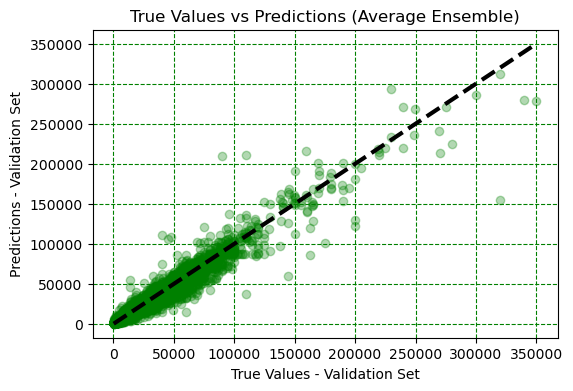

In [366]:
# Creating the plot
plt.figure(figsize=(6,4))
plt.scatter(y_val, average_ensemble_val_predictions, alpha=0.3, c='green')
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], 'k--', lw=3)  # Diagonal line
plt.xlabel('True Values - Validation Set')
plt.ylabel('Predictions - Validation Set')
plt.title('True Values vs Predictions (Average Ensemble)')
plt.grid(True, linestyle='--', linewidth=0.8, color='green')
plt.show()

In [323]:
average_ensemble_test_predictions = average_ensemble.predict(X_test_encoded)
average_ensemble_test_mae = mean_absolute_error(y_test, average_ensemble_test_predictions)
average_ensemble_test_mse = mean_squared_error(y_test, average_ensemble_test_predictions)
average_ensemble_test_r2 = r2_score(y_test, average_ensemble_test_predictions)

In [324]:
print(f"Average Ensemble Model Test MAE: {average_ensemble_test_mae}")
print(f"Average Ensemble Model Test MSE: {average_ensemble_test_mse}")
print(f"Average Ensemble Model Test R-squared: {average_ensemble_test_r2}")

Average Ensemble Model Test MAE: 1728.592914524837
Average Ensemble Model Test MSE: 13294745.880485974
Average Ensemble Model Test R-squared: 0.9511872233520791


### Auto trader Challenge set

In [322]:
rf_auto_predictions_average = average_ensemble.predict(X_auto_encoded)
rf_auto_mae_average = mean_absolute_error(y_auto, rf_auto_predictions_average)
rf_auto_mse_average = mean_squared_error(y_auto, rf_auto_predictions_average)
rf_auto_r2_average = r2_score(y_auto, rf_auto_predictions_average)
print(f"RF MAE: {rf_auto_mae_average}")
print(f"RF MSE: {rf_auto_mse_average}")
print(f"RF R-squared: {rf_auto_r2_average}")

RF MAE: 3813.0397208074605
RF MSE: 27418175.96234775
RF R-squared: 0.7227574068058256


### Making a random forest model on classic cars only

In [230]:
classic_cars.shape

(458, 13)

In [231]:
classic_cars.head(1)

,mileage,colour,make,model,condition,registration,price,body,crossover,fuel,age,classic,annual_mileage
25,49585.0,Silver,Ferrari,308,USED,1984.0,54475,Convertible,False,Petrol,37.0,1,1340.135135


<Axes: xlabel='price'>

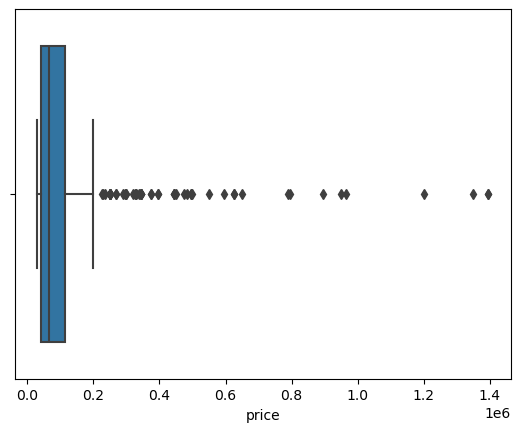

In [232]:
sns.boxplot(data=classic_cars, x ='price')

In [233]:
classic_cars['price'].describe().round()

count        458.0
mean      119531.0
std       173759.0
min        30995.0
25%        42995.0
50%        64950.0
75%       114438.0
max      1395000.0
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

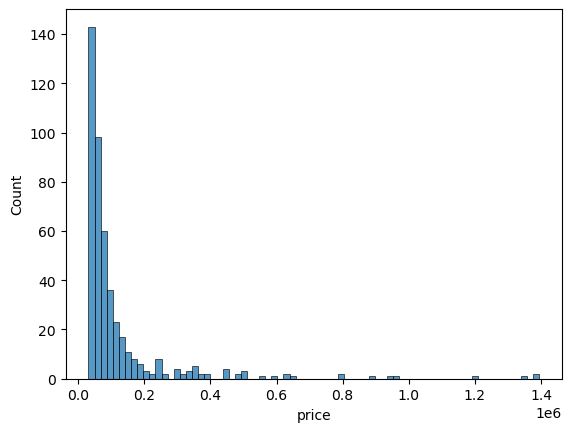

In [234]:
sns.histplot(data=classic_cars, x='price')

In [235]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
price_mileage_age_annual_classic = classic_cars[['price', 'mileage', 'age', 'annual_mileage']].values
# Set the number of neighbors
k = 5
neigh_4d = NearestNeighbors(n_neighbors=k + 1)
neigh_4d.fit(price_mileage_age_annual_classic)
# Finding the distances and indices of the k nearest neighbors to each point in the four-dimensional space
distances_4d, indices_4d = neigh_4d.kneighbors(price_mileage_age_annual_classic)
# Calculating the mean distance to k nearest neighbors for each point. Exclude the first distance
mean_distances_4d = np.mean(distances_4d[:, 1:], axis=1)
# Using the top 10% as outliers
threshold_4d = np.percentile(mean_distances_4d, 99)
outliers_knn_4d_classic = classic_cars[mean_distances_4d > threshold_4d]

In [236]:
# Display first few outliers and the count
outliers_knn_4d_count_classic = outliers_knn_4d_classic.shape[0]
outliers_knn_4d_classic[['price', 'mileage', 'age', 'annual_mileage']].head(), outliers_knn_4d_count_classic

(          price   mileage   age  annual_mileage
 56415    174995  401200.0  59.0     6800.000000
 177165  1395000      45.0  28.0        1.607143
 186555  1200000   57000.0  57.0     1000.000000
 255484  1395000      45.0  28.0        1.607143
 335741  1350000    2800.0  29.0       96.551724,
 5)

In [237]:
# Remove outliers from the main dataset
cleaned_data_classic = classic_cars[~classic_cars.index.isin(outliers_knn_4d_classic.index)]

In [238]:
cleaned_data_classic['price'].describe().round()

count       453.0
mean     108676.0
std      131417.0
min       30995.0
25%       42990.0
50%       64000.0
75%      109950.0
max      965000.0
Name: price, dtype: float64

In [239]:
cleaned_data_classic['registration'].describe().round()

count     453.0
mean     1984.0
std        47.0
min      1018.0
25%      1974.0
50%      1990.0
75%      1996.0
max      2000.0
Name: registration, dtype: float64

In [240]:
cleaned_data_classic.head(1)

,mileage,colour,make,model,condition,registration,price,body,crossover,fuel,age,classic,annual_mileage
25,49585.0,Silver,Ferrari,308,USED,1984.0,54475,Convertible,False,Petrol,37.0,1,1340.135135


In [242]:
classic_cars_price = cleaned_data_classic.drop(columns = ['colour', 'condition', 'registration', 'crossover', 'classic', 'annual_mileage'])

In [243]:
classic_cars_price.head(1)

,mileage,make,model,price,body,fuel,age
25,49585.0,Ferrari,308,54475,Convertible,Petrol,37.0


In [244]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Splitting the data into train and test sets first
X_classic = classic_cars_price.drop('price', axis=1)
y_classic = classic_cars_price['price']
X_train_classic, X_test_classic, y_train_classic, y_test_classic = train_test_split(X_classic, y_classic, test_size=0.2, random_state=48)

In [245]:
# Transform the validation and test data
X_train_classic = target_encoding_pipeline.transform(X_train_classic)
X_test_classic = target_encoding_pipeline.transform(X_test_classic)

In [246]:
X_train_classic.head(1)

,mileage,make,model,body,fuel,age
89288,78000.0,152056.018637,16265.423002,18804.792316,14916.822435,23.0


In [247]:
X_test_classic.head(1)

,mileage,make,model,body,fuel,age
39899,54900.0,19821.373429,16265.423002,18804.792316,14916.822435,48.0


In [248]:
X_train_classic.head(1)

,mileage,make,model,body,fuel,age
89288,78000.0,152056.018637,16265.423002,18804.792316,14916.822435,23.0


In [249]:
X_test_classic.head(1)

,mileage,make,model,body,fuel,age
39899,54900.0,19821.373429,16265.423002,18804.792316,14916.822435,48.0


In [250]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Random Forest regressor
rf_regressor_classic = RandomForestRegressor(random_state=48, n_jobs=-1)

# Train the model
rf_regressor_classic.fit(X_train_classic, y_train_classic)

# Predict on the training set and validation set
rf_train_predictions_classic = rf_regressor_classic.predict(X_train_classic)
rf_test_predictions_classic = rf_regressor_classic.predict(X_test_classic)

# Evaluate the model
rf_train_mae_classic = mean_absolute_error(y_train_classic, rf_train_predictions_classic)
rf_train_r2_classic = r2_score(y_train_classic, rf_train_predictions_classic)
rf_test_mae_classic = mean_absolute_error(y_test_classic, rf_test_predictions_classic)
rf_test_r2_classic = r2_score(y_test_classic, rf_test_predictions_classic)

print(f"RF Train MAE Classic Cars: {rf_train_mae_classic}")
print(f"RF Train R-squared Classic Cars: {rf_train_r2_classic}")
print(f"RF Test MAE Classic Cars: {rf_test_mae_classic}")
print(f"RF Test R-squared Classic Cars: {rf_test_r2_classic}")

RF Train MAE Classic Cars: 18079.32961325967
RF Train R-squared Classic Cars: 0.9267835499203219
RF Test MAE Classic Cars: 45528.17252747253
RF Test R-squared Classic Cars: 0.5788588049308196


In [251]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from scipy.stats import randint

# Parameter distributions
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 10),
    'max_features': [3, 5, 7, 9]  # Explicit values for max_features
}

# Initialize the Randomized Search with RandomForest
rf_random_search_classic = RandomizedSearchCV(estimator=RandomForestRegressor(random_state=46, n_jobs=-1),
                                      param_distributions=param_distributions,
                                      n_iter=100,
                                      cv=5,
                                      scoring='r2',
                                      verbose=2,
                                      random_state=42,
                                      n_jobs=-1)

# Fit the random search model
rf_random_search_classic .fit(X_train_classic , y_train_classic)

# Best parameters and best score
best_params_rf_classic  = rf_random_search_classic.best_params_
best_score_rf_classic = rf_random_search_classic.best_score_
print("Best Parameters (Randomized Search for RF):", best_params_rf_classic)
print("Best Score (Randomized Search for RF):", best_score_rf_classic)
# Create a new model with the best parameters
rf_best_classic = RandomForestRegressor(**best_params_rf_classic, random_state=46, n_jobs=-1)
rf_best_classic.fit(X_train_classic, y_train_classic)

# Predictions with the tuned model
rf_best_train_predictions_classic = rf_best_classic.predict(X_train_classic)
rf_best_test_predictions_classic = rf_best_classic.predict(X_test_classic)

# Evaluation
rf_best_train_mae_classic = mean_absolute_error(y_train_classic, rf_best_train_predictions_classic)
rf_best_train_r2_classic = r2_score(y_train_classic, rf_best_train_predictions_classic)
rf_best_test_mae_classic = mean_absolute_error(y_test_classic, rf_best_test_predictions_classic)
rf_best_test_r2_classic = r2_score(y_test_classic, rf_best_test_predictions_classic)

print(f"RF Best classic Model Train MAE: {rf_best_train_mae_classic}")
print(f"RF Best classic Model Train R-squared: {rf_best_train_r2_classic}")
print(f"RF Best classic Model Validation MAE: {rf_best_test_mae_classic}")
print(f"RF Best classic Model Validation R-squared: {rf_best_test_r2_classic}")

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters (Randomized Search for RF): {'max_depth': 50, 'max_features': 3, 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 400}
Best Score (Randomized Search for RF): 0.40966295479316883
RF Best classic Model Train MAE: 25837.787084853026
RF Best classic Model Train R-squared: 0.8447205989796374
RF Best classic Model Validation MAE: 44163.457795156995
RF Best classic Model Validation R-squared: 0.5818705837990996


In [252]:
compare_classic_car = pd.DataFrame({
    'Actual Price': y_test_classic,
    'Predicted Price (RF)':rf_test_predictions_classic,
    'Predicted Price (Best RF)':rf_best_test_predictions_classic
})

compare_classic_car = compare_classic_car.reset_index(drop=True)

In [253]:
compare_classic_car.sample(5)

,Actual Price,Predicted Price (RF),Predicted Price (Best RF)
45,39750,73945.92,83017.972479
10,295000,416641.50,288218.913918
13,62995,112778.85,109823.526756
37,49950,62381.38,68766.073651
31,79950,83600.83,80132.150845


## Creating a classification model to classify normal cars and classic cars 

In [255]:
normal_classic.shape

(402005, 13)

In [256]:
normal_classic.head(1)

,mileage,colour,make,model,condition,registration,price,body,crossover,fuel,age,classic,annual_mileage
0,0.0,Grey,Volvo,XC90,NEW,2021.0,73970,SUV,False,Petrol Plug-in Hybrid,0.0,0,0.0


In [257]:
X_train_selected.head(1)

,mileage,make,model,body,fuel,age
182447,0,Toyota,C-HR,SUV,Petrol Hybrid,0


In [278]:
classify = normal_classic.drop(columns = ['price', 'colour', 'condition','crossover', 'age', 'annual_mileage'])

In [279]:
classify.head(1)

,mileage,make,model,registration,body,fuel,classic
0,0.0,Volvo,XC90,2021.0,SUV,Petrol Plug-in Hybrid,0


In [280]:
classify.shape

(402005, 7)

In [281]:
# Transform the validation and test data
classify = target_encoding_pipeline.transform(classify)

In [282]:
classify.head(1)

,mileage,make,model,registration,body,fuel,classic
0,0.0,24891.330449,40215.211572,2021.0,21992.182098,33911.796896,0


In [283]:
classify.shape

(402005, 7)

In [284]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Split the data into features and target
Xx = classify.drop('classic', axis=1)
yy = classify['classic']

# Splitting the data into training and testing sets
X_train_classi, X_test_classi, y_train_classi, y_test_classi = train_test_split(Xx, yy, test_size=0.2, random_state=42, stratify=yy)

# Initialize and train the Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train_classi, y_train_classi)

# Predict on the testing set
y_pred_classi = rf_classifier.predict(X_test_classi)

# Evaluate the model
accuracy = accuracy_score(y_test_classi, y_pred_classi)
classification_rep = classification_report(y_test_classi, y_pred_classi)

accuracy, classification_rep


(0.9995398067188219,
 '              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00     80309\n           1       0.85      0.73      0.78        92\n\n    accuracy                           1.00     80401\n   macro avg       0.92      0.86      0.89     80401\nweighted avg       1.00      1.00      1.00     80401\n')

In [285]:
print("Classification Report:\n")
print(classification_rep)

Classification Report:

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     80309
           1       0.85      0.73      0.78        92

    accuracy                           1.00     80401
   macro avg       0.92      0.86      0.89     80401
weighted avg       1.00      1.00      1.00     80401



In [286]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Calculate the confusion matrix on test set
cm = confusion_matrix(y_test_classi, y_pred_classi)

# Create a DataFrame from the confusion matrix
cm_df = pd.DataFrame(cm, index=['Actual Not Classic', 'Actual Classic'], columns=['Predicted Not Classic', 'Predicted Classic'])

# Print the confusion matrix as a table
print("Confusion Matrix in Table Format:")
print(cm_df)

Confusion Matrix in Table Format:
                    Predicted Not Classic  Predicted Classic
Actual Not Classic                  80297                 12
Actual Classic                         25                 67


In [287]:
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
import numpy as np

# Setup the hyperparameter grid to use in the RandomizedSearch
param_dist_classi = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': [3,4,5],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Initialize the Random Forest classifier
rf_classifier_best = RandomForestClassifier(random_state=42)

# Setup the randomized search with cross-validation
random_search_classi = RandomizedSearchCV(estimator=rf_classifier_best, param_distributions=param_dist_classi,
                                   n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV to the data
random_search_classi.fit(X_train_classi, y_train_classi)

# Best model found by RandomizedSearchCV
best_rf_classi = random_search_classi.best_estimator_

# Predict on the testing set using the best model
y_pred_classi_best = best_rf_classi.predict(X_test_classi)


Fitting 3 folds for each of 100 candidates, totalling 300 fits


In [288]:
# Evaluate the best model
accuracy_best = accuracy_score(y_test_classi, y_pred_classi_best)
classification_rep_best = classification_report(y_test_classi, y_pred_classi_best)

print("Best Model Parameters:", random_search_classi.best_params_)
print("Accuracy:", accuracy)
print("Classification Report:\n", classification_rep_best)

Best Model Parameters: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 3, 'max_depth': 50, 'bootstrap': True}
Accuracy: 0.9995398067188219
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     80309
           1       0.85      0.73      0.78        92

    accuracy                           1.00     80401
   macro avg       0.92      0.86      0.89     80401
weighted avg       1.00      1.00      1.00     80401



In [289]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Calculate the confusion matrix
cm_best = confusion_matrix(y_test_classi, y_pred_classi_best)

# Create a DataFrame from the confusion matrix
best_df = pd.DataFrame(cm_best, index=['Actual Not Classic', 'Actual Classic'], columns=['Predicted Not Classic', 'Predicted Classic'])

# Print the confusion matrix as a table
print("Confusion Matrix in Table Format:")
print(best_df)

Confusion Matrix in Table Format:
                    Predicted Not Classic  Predicted Classic
Actual Not Classic                  80297                 12
Actual Classic                         25                 67


## Creating an ensemble model to effectively predict both classic cars and normal cars price

In my car data set, I am trying to make a model to predict car prices. However, my model predicts prices of normal cars correctly, but fails to do so for classic cars. So, I have decided to make 2 models; one was trained on normal cars and another was trained classic cars only. I have made another model to classify which car is normal and which car is classic. So, I am trying to make an ensemble model on these 3 models. When a new data comes, my classify model will predict if the car is classic or normal. If the car is classic, then it will send the data to classic car prediction model. If the car is normal, then it will send the data to normal car price prediction model. 

so, here is my classification model to classify the car : rf_classifier
here is my regression model to predict price for normal car : rf_regressor_selected
here is my regression model to predict price for classic car: rf_regressor_classic.predict

I will define a function that uses these models to predict car prices based on the car type classified by the rf_classifier. This function will:

Take the input features for a car.
Use rf_classifier to predict if the car is classic or normal.
Depending on the classification, send the input features to either rf_regressor_selected or rf_regressor_classic to predict the price.

In [290]:
 def ensemble_predict(car_features):
    if car_features.ndim == 1:
        car_features = car_features.reshape(1, -1)
    
    # Determine if the car is classic or normal
    car_type = rf_classifier.predict(car_features)
    
    # Predict the price based on the car type
    if car_type == 1:
        price_prediction = rf_best_classic.predict(car_features)
    else:
        price_prediction = rf_best_new.predict(car_features)
    
    return price_prediction[0]

### Predicting prices on the test set

In [291]:
X_val_encoded.head(1)

,mileage,make,model,body,fuel,age
91463,50000,19821.373429,12942.26578,10434.141678,14916.822435,5


In [292]:
import numpy as np
# Predicting prices for the entire test set
predicted_prices = [ensemble_predict(features.values) for index, features in X_val_encoded.iterrows()]

# Convert predicted prices to numpy array for evaluation
predicted_prices = np.array(predicted_prices)

[CV] END bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=  28.2s
[CV] END bootstrap=False, max_depth=20, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=  13.4s
[CV] END bootstrap=False, max_depth=None, max_features=5, min_samples_leaf=2, min_samples_split=5, n_estimators=200; total time=  23.0s
[CV] END bootstrap=True, max_depth=40, max_features=4, min_samples_leaf=4, min_samples_split=5, n_estimators=100; total time=  10.6s
[CV] END bootstrap=True, max_depth=50, max_features=3, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  28.8s
[CV] END bootstrap=True, max_depth=40, max_features=3, min_samples_leaf=1, min_samples_split=10, n_estimators=300; total time=  29.7s
[CV] END bootstrap=True, max_depth=10, max_features=5, min_samples_leaf=4, min_samples_split=5, n_estimators=200; total time=  21.1s
[CV] END bootstrap=True, max_depth=20, max_features=3, min_sam

In [316]:
# Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

mae = mean_absolute_error(y_val, predicted_prices)
mse = mean_squared_error(y_val, predicted_prices)
r2 = r2_score(y_val, predicted_prices)

print("Evaluation Metrics on Validation Set:")
print(f"Mean Absolute Error: {mae}")
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Evaluation Metrics on Validation Set:
Mean Absolute Error: 1695.3020560271812
Mean Squared Error: 11948825.991712226
R-squared: 0.9515655143652323


In [394]:
car_prices = pd.DataFrame({
    'Actual Price': y_val,
    'Linear Regression':y_val_pred_target,
    'Polynomial Regression':y_val_pred_poly, 
    'Random Forest':rf_best_val_predictions_new,
    'Gradient Boosting':gb_best_val_predictions_new,
    'Stacker Ensemble':stacker_val_predictions,
    'Average Ensemble':average_ensemble_val_predictions,
    'Custom Ensemble':predicted_prices,
})

car_prices = car_prices.reset_index(drop=True)

In [395]:
car_prices = car_prices.round(0).astype(int)

In [396]:
car_prices.head(3)

,Actual Price,Linear Regression,Polynomial Regression,Random Forest,Gradient Boosting,Stacker Ensemble,Average Ensemble,Custom Ensemble
0,10750,11189,11068,12308,13110,12677,12709,12308
1,17498,16596,16406,21331,21810,21604,21570,21331
2,8495,7529,6596,7585,7685,7578,7635,7585


In [397]:
car_prices[car_prices['Actual Price']>200000].head(5)

,Actual Price,Linear Regression,Polynomial Regression,Random Forest,Gradient Boosting,Stacker Ensemble,Average Ensemble,Custom Ensemble
3486,269950,86001,177182,215637,210916,214713,213276,215637
5382,349950,125518,180590,267451,289899,280189,278675,267451
6384,339950,147372,184959,274668,284554,281305,279611,274668
6955,248950,115667,170684,220890,252112,237600,236501,220890
8570,225000,188469,225378,225997,212815,221003,219406,225997


# Shapley Values (SHAP)

SHAP values are based on cooperative game theory, which were developed to fairly distribute the payout among players in a coalition game, where each player contributes differently to the total gain. Each player’s contribution is calculated as the marginal gain that the player brings to the subsets of players they join. A prediction can be explained by assuming each feature is a player 'player' in a game where the prediction is the payout. This tells us how much each feature is contrbuting in the output.  

Mainly, SHAP helps us to find how much each feature value contributed to the prediction compared to the average prediction. For a linear regression model, by calculating the coeficients or weights of the features, we can find the effect of each feature is the weight of the feature times the feature value. Beacuse of the linearity of the linear models, this works. For more complex models like 'random forest', SHAP values answers this. 

How SHAP Values Work:

To calculate SHAP values for a machine learning model:

Predict the Baseline: Determine the average prediction of the model over the dataset, which acts as a baseline (no features contributing).
Marginal Contribution: For each feature, compute the change in the prediction that can be attributed to including this feature while averaging over subsets of other features. This involves comparing what the model predicts with and without the feature across all possible combinations of other features.

### Explanation with an example

Suppose, our random forest model predicts car prices based on three features: 'make', 'model', and the 'mileage'. Let assume the average prediction of car prices over the dataset is £30,000. We want to understand why the model predicted a car to be £35,000.

Calculation:

make: Adding this feature to a baseline model that has none might change the prediction from £30,000 to £31,000. The SHAP value for this feature is +£1,000.


model: Adding this feature (while including the model) might change the prediction from £31,000 to £34,000. Thus, its SHAP value is +£3,000.


mileage: This might change the prediction from £34,000 to £35,000, making its SHAP value +£1,000.


These SHAP values can be added up to explain why the model predicted £35,000 for this particular car, as opposed to the average £30,000.

### Steps to Calculate the Average Prediction (Base Value):
Model Predictions: First, we would use our trained machine learning model to predict outcomes for each instance in the dataset or a representative sample of it.

Calculate Average: Then, we take the average of these predictions to establish a baseline value. This average represents the prediction that would be made without specific knowledge of the feature values for any given instance.

## Global Explanation with SHAP

Global explanations aim to provide an overall understanding of the model's behavior across the entire dataset. They help answer questions about general trends or patterns the model is using to make decisions.

### Feature Importance with SHAP: 
SHAP values can aggregate across all predictions to provide a measure of the overall importance of each feature. By averaging the absolute SHAP values for each feature across the data, we can rank the features by their overall impact on the model output. This shows which features generally have the most significant influence on predictions.

In [4]:
adv.head(1)

,mileage,colour,make,model,condition,registration,price,body,crossover,fuel,age,classic,annual_mileage
0,0.0,Grey,Volvo,XC90,1,2021.0,73970,SUV,False,Petrol Plug-in Hybrid,0.0,0,0.0


In [5]:
adv = adv.drop(columns=['age', 'classic', 'annual_mileage'], axis=1)

In [6]:
shap_rf = adv.sample(n=30000, random_state=42)

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [8]:
# Splitting the data into train and test sets first
X_shap = shap_rf.drop('price', axis=1)
y_shap = shap_rf['price']
X_train_original, X_test_original, y_train_shap, y_test_shap = train_test_split(X_shap, y_shap, test_size=0.2, random_state=5)

In [10]:
X_train_original.head(1)

,mileage,colour,make,model,condition,registration,body,crossover,fuel
247070,13614.0,Grey,Hyundai,Tucson,0,2017.0,SUV,False,Petrol


In [11]:
# Defining the list of features to encode first
features_to_encode_shap = ['colour', 'make', 'model', 'body', 'fuel']

In [12]:
from sklearn.pipeline import Pipeline

# Define the pipeline including target encoding
target_encoding_pipeline = Pipeline([
    ('target_encoder', TargetEncoder(features_to_encode=['colour', 'make', 'model', 'body', 'fuel']))
])

# Fit and transform the training data
X_train_shap = target_encoding_pipeline.fit_transform(X_train_original, y_train_shap)

# Transform the validation and test data
X_test_shap = target_encoding_pipeline.transform(X_test_original)

In [13]:
X_train_shap = X_train_shap.astype(int)

In [14]:
X_test_shap = X_test_shap.astype(int)

In [15]:
X_train_shap.head(1)

,mileage,colour,make,model,condition,registration,body,crossover,fuel
247070,13614,19228,11627,16103,0,2017,22451,0,14977


### Random Forest on a Sample Dataset for Shap Analysis

In [16]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Random Forest regressor
rf_regressor_shap = RandomForestRegressor(n_estimators=100, random_state=6, n_jobs=-1)

# Train the model
rf_regressor_shap.fit(X_train_shap, y_train_shap)

# Predict on the training set and validation set
rf_train_predictions_shap = rf_regressor_shap.predict(X_train_shap)
rf_test_predictions_shap = rf_regressor_shap.predict(X_test_shap)

# Evaluate the model
rf_train_mae_shap = mean_absolute_error(y_train_shap, rf_train_predictions_shap)
rf_train_mse_shap = mean_squared_error(y_train_shap, rf_train_predictions_shap)
rf_train_r2_shap = r2_score(y_train_shap, rf_train_predictions_shap)
rf_test_mae_shap = mean_absolute_error(y_test_shap, rf_test_predictions_shap)
rf_test_mse_shap = mean_squared_error(y_test_shap, rf_test_predictions_shap)
rf_test_r2_shap = r2_score(y_test_shap, rf_test_predictions_shap)

print(f"RF Train MAE: {rf_train_mae_shap}")
print(f"RF Train MSE: {rf_train_mse_shap}")
print(f"RF Train R-squared: {rf_train_r2_shap}")
print(f"RF Test MAE: {rf_test_mae_shap}")
print(f"RF Test MSE: {rf_test_mse_shap}")
print(f"RF Test R-squared: {rf_test_r2_shap}")

RF Train MAE: 833.433936842549
RF Train MSE: 3144078.616719208
RF Train R-squared: 0.9881061817991311
RF Test MAE: 2148.3742226649783
RF Test MSE: 20734694.372291684
RF Test R-squared: 0.915607709108486


In [17]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the Gradient Boosting Regressor
gb_regressor_shap = GradientBoostingRegressor(random_state=42)

# Train the model on the training dataset
gb_regressor_shap.fit(X_train_shap, y_train_shap)

# Predict on the training set and validation set
gb_train_predictions_shap = gb_regressor_shap.predict(X_train_shap)
gb_test_predictions_shap = gb_regressor_shap.predict(X_test_shap)

# Evaluate the model
gb_train_mae_shap = mean_absolute_error(y_train_shap, gb_train_predictions_shap)
gb_train_mse_shap = mean_squared_error(y_train_shap, gb_train_predictions_shap)
gb_train_r2_shap = r2_score(y_train_shap, gb_train_predictions_shap)
gb_test_mae_shap = mean_absolute_error(y_test_shap, gb_test_predictions_shap)
gb_test_mse_shap = mean_squared_error(y_test_shap, gb_test_predictions_shap)
gb_test_r2_shap = r2_score(y_test_shap, gb_test_predictions_shap)

print(f"Gradient Boosting Train MAE: {gb_train_mae_shap}")
print(f"Gradient Boosting Train MSE: {gb_train_mse_shap}")
print(f"Gradient Boosting Train R-squared: {gb_train_r2_shap}")
print(f"Gradient Boosting Test MAE: {gb_test_mae_shap}")
print(f"Gradient Boosting Test MSE: {gb_test_mse_shap}")
print(f"Gradient Boosting Test R-squared: {gb_test_r2_shap}")

Gradient Boosting Train MAE: 2639.299018283495
Gradient Boosting Train MSE: 22368100.67688073
Gradient Boosting Train R-squared: 0.9153831200228822
Gradient Boosting Test MAE: 2794.649755990549
Gradient Boosting Test MSE: 28435536.171823896
Gradient Boosting Test R-squared: 0.8842645086934309


In [18]:
!pip install --upgrade -q shap
import shap
shap.initjs()

To understand the importance of the features, I will take the random forest model that was built on all the features. This is beacuse, I want to understand how every individual feature is contributing. 

In [19]:
# Instantiate an explainer object on the random forest model that was trained on all the features
explainer_rf = shap.Explainer(rf_regressor_shap, X_train_shap)

In [20]:
# asking the explainer for the SHAP values on the test data
shap_values_explainer_rf = explainer_rf(X_test_shap)

100%|===================| 5999/6000 [03:09<00:00]        

In [21]:
# Instantiate an explainer object on the gradient boost model
explainer_gb = shap.Explainer(gb_regressor_shap, X_train_shap)

In [22]:
shap_values_explainer_gb = explainer_gb(X_test_shap)

### Global Explanation with SHAP

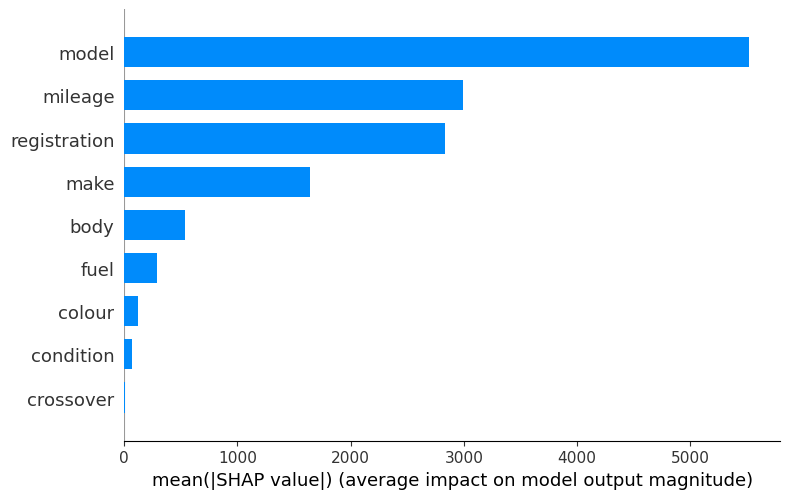

In [23]:
# Plotting the global SHAP values using a summary plot for Random Forest
shap.summary_plot(shap_values_explainer_rf, X_test_shap, plot_type="bar")

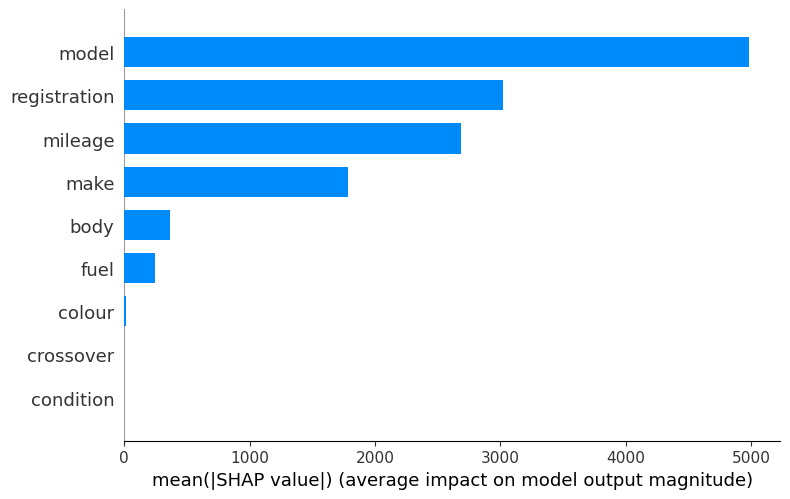

In [24]:
# Plotting the global SHAP values using a summary plot for Random Forest
shap.summary_plot(shap_values_explainer_gb, X_test_shap, plot_type="bar")

Here's how to interpret beeswarm the plot:

Feature Importance: 
The features are listed on the y-axis, and the mean absolute SHAP value for each feature is represented on the x-axis. The length of each bar indicates the average impact that each feature has on the model’s output, with longer bars representing a larger impact.

Order of Features: 
The features are typically ordered from top to bottom by their importance. In this case, 'mileage' is at the top, which means it is, on average, the most impactful feature in the model for predicting the price of cars.

Mean Absolute SHAP Values: 
The values on the x-axis represent the mean of the absolute SHAP values for each feature across all predictions. It shows the average magnitude of the impact on the model’s output, without regard to the direction of the effect (increase or decrease in price).

Magnitude and Direction: 
A mean absolute SHAP value does not tell us the direction of the feature’s effect (whether it increases or decreases the price), just the magnitude. However, since it is an absolute value, we know it is averaging out the impact of both positive and negative changes.

Interpreting Individual Features:
'mileage': It has the most significant impact on the car price predictions. Higher mileage might typically lower the car's price, but the SHAP value summary plot does not indicate direction, only magnitude.

'make': This is the second most important feature, implying the brand of the car significantly affects its predicted price.
Other features like 'body', 'registration', 'model', and so on, also contribute to the predicted price but to a lesser extent compared to 'mileage' and 'make'.

Decision-Making: These insights could be used by stakeholders to understand what features to focus on when setting or negotiating car prices. For instance, if a car has lower mileage and a desirable make, it might be priced higher.

### Plotting the SHAP values using a beeswarm plot for Random Forest Model

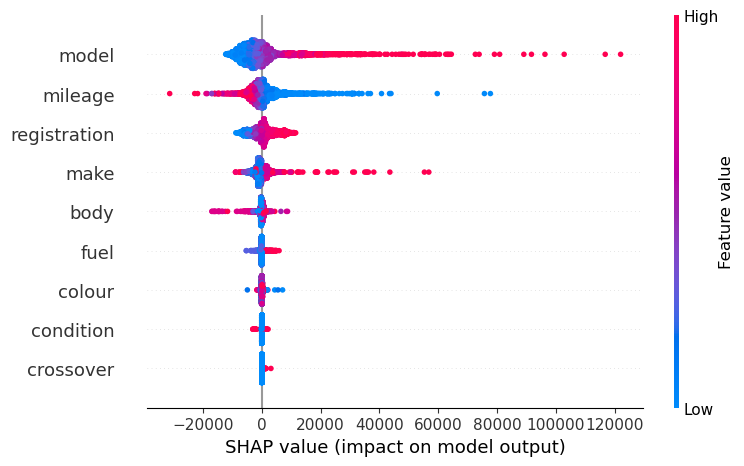

In [25]:
shap.plots.beeswarm(shap_values_explainer_rf)

The image is a SHAP beeswarm plot, which is used for visualizing the impact of features on the prediction of a machine learning model for individual instances. Here’s how to interpret this plot:

Feature List: The y-axis lists the features used in the model to predict the target variable.

SHAP Values: On the x-axis, the SHAP values represents the impact on model output. A SHAP value of zero means the feature did not change the prediction from the baseline. Positive values indicate an increase in the predicted value, while negative values indicate a decrease.

Density and Spread: The plot uses color and position to represent the value of the feature for each instance (car) in the dataset. The color gradient, from blue to red, indicates low to high feature values. The spread of the points shows the distribution of the SHAP values. A wide spread means the feature has a variable impact on the model output, while a narrow spread indicates more consistent behavior.

Colour of SHAP values: The colors in a SHAP beeswarm plot represent the value of the feature for each data point:

Blue: Indicates lower values of the feature.
Red: Indicates higher values of the feature.

A point in blue for the 'mileage' feature would represent a car with lower mileage, while a red point would represent a car with higher mileage. For the 'make' feature, blue might represent a less prestigious brand and red a more prestigious or luxury brand.
These colors allow to see not only the impact (SHAP value) each feature has on the model’s output but also how the value of the feature itself relates to that impact. For instance: If there is a cluster of red points to the right of zero for 'mileage', it suggests that cars with high mileage are typically contributing to an increase in the predicted price. Conversely, a cluster of blue points to the left of zero for 'mileage' would suggest that cars with low mileage tend to lower the predicted price. 

It's important to remember that the directionality of the effect (positive or negative SHAP value) combined with the color coding provides a two-dimensional view of how feature values are influencing predictions. The plot is showing both how important a feature is (the spread along the x-axis) and what values of that feature are driving the impact (the color).

Directionality: Points to the right of the zero line mean that the feature has contributed to increasing the price prediction for that particular instance. Points to the left mean the feature has contributed to decreasing the price prediction.

High Impact Features:
'mileage': This feature has a high impact on the model's predictions, with a spread of SHAP values both in the positive and negative directions, indicating that depending on the car, mileage can either increase or decrease the predicted price.

'make': This feature also has a varied impact on the prediction, with both high and low values of 'make' (which might correspond to luxury vs. standard brands) affecting the price significantly.

Interpreting the Beeswarm:
Clusters of points at different SHAP value ranges indicate common patterns. For example, a cluster of high SHAP values for 'mileage' with a red color indicates that high mileage consistently decreases the car’s price.

Overlapping dots can show interaction effects if the SHAP value for a feature varies widely at similar feature values.

Insights:
Feature with Most Variability: 'mileage' appears to be the feature with the most variability in its impact on the price, suggesting that it is critical in the car's valuation.

Consistent Features: A feature like 'crossover' appears to have a more consistent, yet smaller impact on price predictions.

This beeswarm plot can provide a deeper understanding of the feature effects, helping to identify not only which features matter but how they interact with the model and influence predictions on a case-by-case basis.

### Plotting the SHAP values using a beeswarm plot for Gradient Boost Model

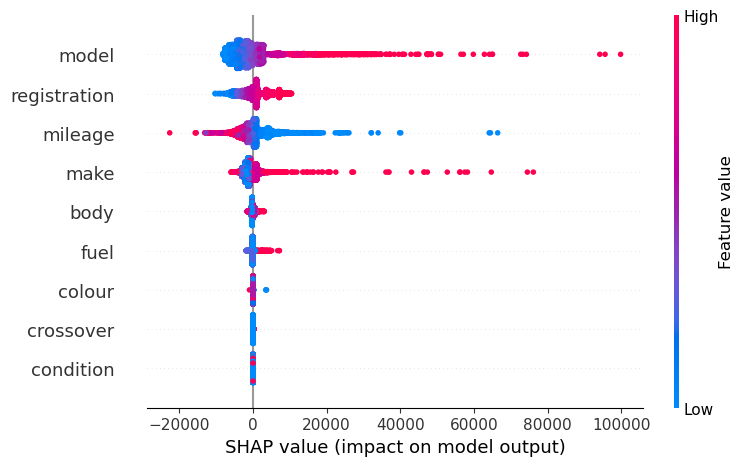

In [26]:
shap.plots.beeswarm(shap_values_explainer_gb)

### Local Explanation with SHAP

In [42]:
y_test_shap.iloc[0]

57614

In [43]:
X_test_original.iloc[0]

mileage              10.0
colour              Black
make                 Audi
model                  A5
condition               1
registration       2021.0
body            Hatchback
crossover           False
fuel               Diesel
Name: 213458, dtype: object

In [45]:
y_test_shap.iloc[10]

17000

In [46]:
X_test_original.iloc[10]

mileage          32254.0
colour             Black
make                 BMW
model           3 Series
condition              0
registration      2015.0
body              Saloon
crossover          False
fuel              Diesel
Name: 202970, dtype: object

Predicted Price for the instance at index 0: 40692.40666666667


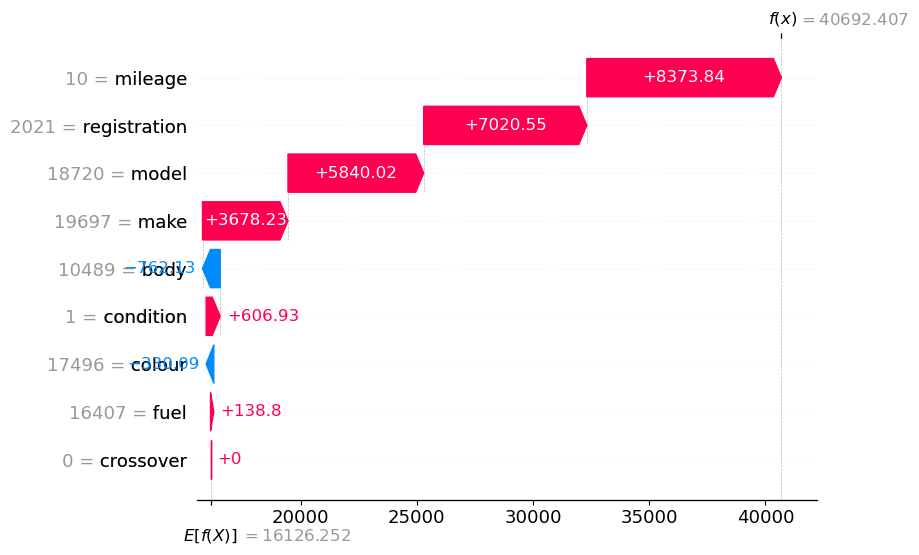

In [47]:
instance_index = 0

# Predict the price and calculate SHAP values for the selected instance
predicted_price_instance_rf = rf_regressor_shap.predict(X_test_shap.iloc[instance_index:instance_index+1])[0]
shap_values_instance_rf = explainer_rf(X_test_shap.iloc[instance_index:instance_index+1])

# Output predicted price and plot the SHAP values with a waterfall plot
print(f"Predicted Price for the instance at index {instance_index}: {predicted_price_instance_rf}")
shap.plots.waterfall(shap_values_instance_rf[0])

Predicted Price for the instance at index 10: 17859.61


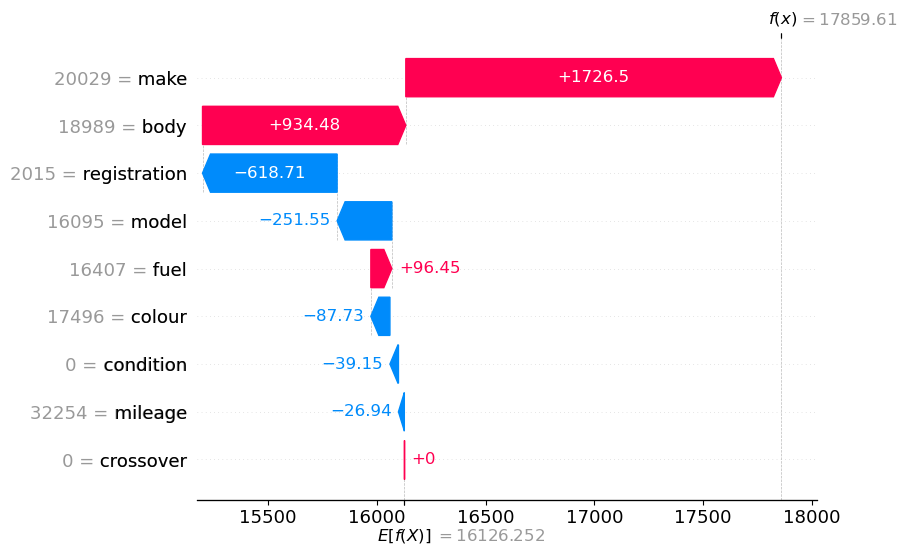

In [52]:
instance_index = 10

# Predict the price and calculate SHAP values for the selected instance
predicted_price_instance_rf = rf_regressor_shap.predict(X_test_shap.iloc[instance_index:instance_index+1])[0]
shap_values_instance_rf = explainer_rf(X_test_shap.iloc[instance_index:instance_index+1])

# Output predicted price and plot the SHAP values with a waterfall plot
print(f"Predicted Price for the instance at index {instance_index}: {predicted_price_instance_rf}")
shap.plots.waterfall(shap_values_instance_rf[0])

Predicted Price for the instance at index 0: 36574.37555082446


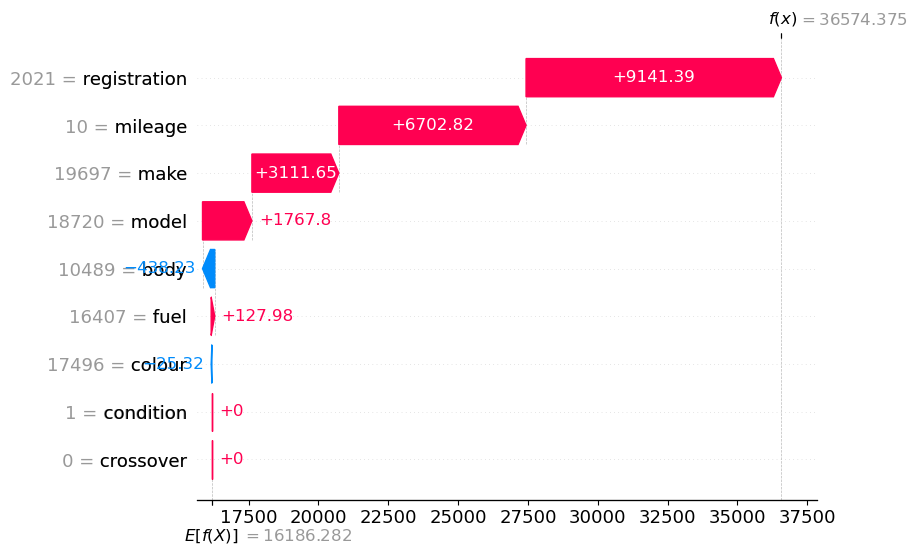

In [48]:
instance_index = 0  

# Predict the price and calculate SHAP values for the selected instance
predicted_price_instance_gb = gb_regressor_shap.predict(X_test_shap.iloc[instance_index:instance_index+1])[0]
shap_values_instance_gb = explainer_gb(X_test_shap.iloc[instance_index:instance_index+1])

# Output predicted price and plot the SHAP values with a waterfall plot
print(f"Predicted Price for the instance at index {instance_index}: {predicted_price_instance_gb}")
shap.plots.waterfall(shap_values_instance_gb[0])

Predicted Price for the instance at index 10: 15289.088415731803


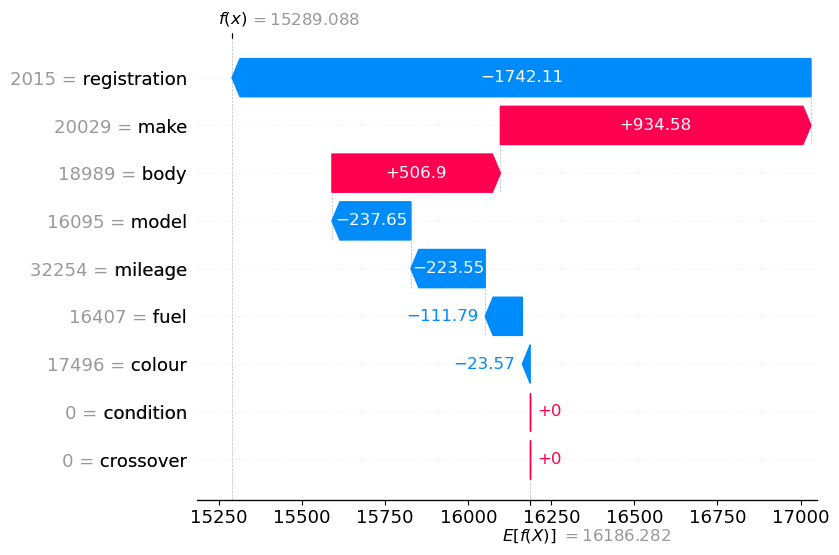

In [53]:
instance_index = 10  

# Predict the price and calculate SHAP values for the selected instance
predicted_price_instance_gb = gb_regressor_shap.predict(X_test_shap.iloc[instance_index:instance_index+1])[0]
shap_values_instance_gb = explainer_gb(X_test_shap.iloc[instance_index:instance_index+1])

# Output predicted price and plot the SHAP values with a waterfall plot
print(f"Predicted Price for the instance at index {instance_index}: {predicted_price_instance_gb}")
shap.plots.waterfall(shap_values_instance_gb[0])

Here's how to interpret this waterfall plot:

Base Value (E[f(X)]): This is the starting point on the left side of the plot and represents the average prediction over the dataset, which could be considered a baseline prediction in the absence of any specific feature information. For this model, it’s approximately £17,396.

Red Bars (Positive Contribution): Each red bar represents a feature that has increased the prediction from the baseline. The length of the bar shows the magnitude of the feature's contribution.

'mileage': The number (1298) indicate the value of the 'mileage' feature for this car. It has a very significant positive impact on the predicted price, adding about £62,398 to the baseline value.

'make': The 'make' feature, with a value of 276, seems to have the second-highest positive contribution, adding around £72,090 to the prediction. Since, this frequency encoded, the value 276 out of 400,000 indicates that this is a rare brand.

Blue Bars (Negative Contribution): Each blue bar shows a feature that has decreased the prediction from the baseline.

Neutral Features: 'condition' and 'crossover', both with a value of 0, appear to have no impact on the predicted price, indicated by the zero-length bars.

Final Prediction (f(x)): On the right side of the plot, the combined effect of the base value and all the feature contributions results in the final predicted price of the car, which is approximately £200,298.

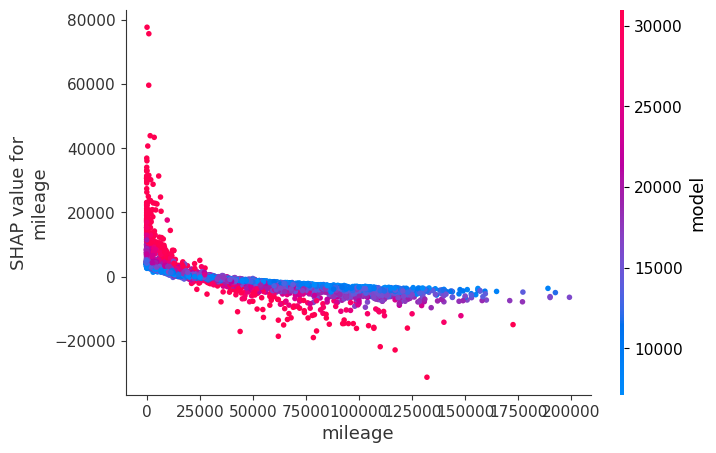

In [54]:
# Plot the SHAP values for the selected feature across all instances.
shap.dependence_plot('mileage', shap_values_explainer_rf.values, X_test_shap)

Here's what's happening in the plot:

X-Axis ('mileage'): This is the feature of interest. Each point's position along the x-axis represents the value of 'mileage' for that specific data point in test set.
Y-Axis (SHAP Value for 'mileage'): This shows the impact of the 'mileage' feature on the model's output price. A higher SHAP value indicates a larger impact on increasing the predicted price, while a lower (or negative) SHAP value indicates a larger impact on decreasing the predicted price.
Color ('body'): Each point is colored based on the value of 'body'. This is meant to show if there's any pattern between 'body' and the impact of 'mileage' on the price. For instance, a cluster of high SHAP values that are all a similar color suggests that when 'body' is at certain values, 'mileage' has a consistently high impact on the predicted price.

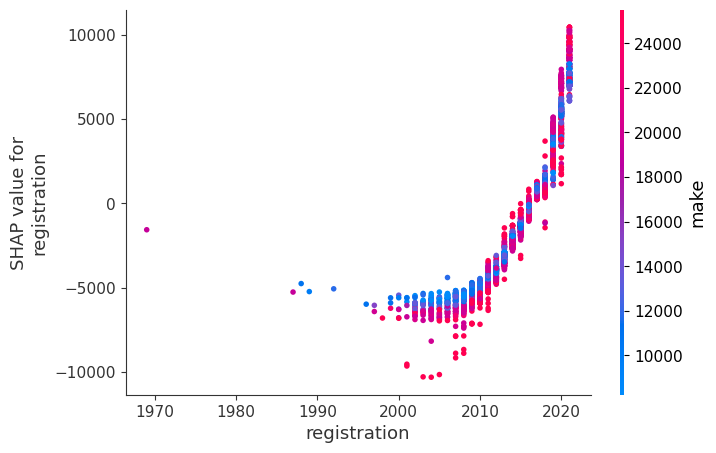

In [55]:
# Plot the SHAP values for the selected feature across all instances.
shap.dependence_plot('registration', shap_values_explainer_gb.values, X_test_shap)

# Partial Dependency Plot (PDP)

The partial dependence plot (short PDP or PD plot) shows the marginal effect one or two features have on the predicted outcome of a machine learning model (J. H. Friedman 2001⁶²). PDPs show the average effect that a given feature (or features) has on the predicted outcome of a model. This is done by varying the feature of interest across its range while keeping all other features constant at their average values. A partial dependence plot can show whether the relationship between the target and a feature is linear, monotonous or more complex. For example, when applied to a linear regression model, partial dependence plots always show a linear relationship.

Partial dependence works by marginalizing the machine learning model output over the distribution of the features in set C, so that the function shows the relationship between the features in set S we are interested in and the predicted outcome. By marginalizing over the other features, we get a function that depends only on features in S, interactions with other features included. The partial function tells us for given value(s) of features S what the average marginal effect on the prediction is. An assumption of the PDP is that the features in C are not correlated with the features in S. If this assumption is violated, the averages calculated for the partial dependence plot will include data points that are very unlikely or even impossible. The assumption of independence is the biggest issue with PD plots. It is assumed that the feature(s) for which the partial dependence is computed are not correlated with other features. For example, suppose you want to predict how fast a person walks, given the person’s weight and height. For the partial dependence of one of the features, e.g. height, we assume that the other features (weight) are not correlated with height, which is obviously a false assumption. For the computation of the PDP at a certain height (e.g. 200 cm), we average over the marginal distribution of weight, which might include a weight below 50 kg, which is unrealistic for a 2 meter person. In other words: When the features are correlated, we create new data points in areas of the feature distribution where the actual probability is very low (for example it is unlikely that someone is 2 meters tall but weighs less than 50 kg). One solution to this problem is Accumulated Local Effect plots or short ALE plots that work with the conditional instead of the marginal distribution. 

Blue Lines: Each blue line represents an ICE plot for a single instance from the dataset. It shows how the prediction for that particular instance changes as the 'mileage' feature's value changes. ICE plots are useful for seeing the variability of the model's predictions for individual observations, which can sometimes be masked by the average effect shown in the PDP.
Orange Dashed Line: This line represents the average prediction across all instances at each value of 'mileage', which is the actual Partial Dependence Plot. The PDP summarizes the effect of 'mileage' on the predicted outcome after accounting for the average effects of all other features.
The PDP and ICE plots are overlaid on the same axes, giving you both a global view (the average effect of 'mileage') and a local view (how each individual prediction is affected by changes in 'mileage'). The variation in the ICE lines can give insight into interaction effects or non-linear relationships that are not captured by the average PDP line. If there's a lot of spread in the ICE lines, this indicates that the effect of 'mileage' on the predicted price can be quite different for different instances, possibly due to interactions with other features or heterogeneity in the model's responses.

The difference we're observing between the SHAP plot and the PDP plot can occur for a few reasons, and it's essential to understand the nuances of each method to interpret them correctly:

SHAP Values:
SHAP values are calculated for individual predictions and can account for interactions between features within a specific prediction.
They provide both local explanations (how features affect an individual prediction) and global explanations (when aggregated, they show overall feature importance).
SHAP values can show that 'mileage' has a strong impact on individual predictions, especially when interacting with other features.
PDPs:
PDPs show the average effect of a feature on the predicted outcome over the entire dataset, marginalizing over the values of all other features.
They do not capture interactions between features. If 'mileage' often interacts with other features to influence the prediction, this interaction effect will not be reflected in the PDP.
PDPs can be misleading if 'mileage' is correlated with other features. They assume feature independence, and if this assumption is violated, the PDP might not accurately reflect the true effect of 'mileage'.

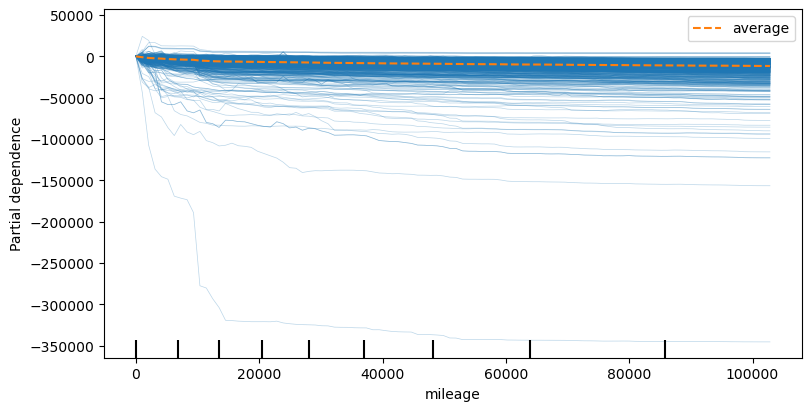

In [277]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    rf_best_new, X_test_encoded, features=['mileage'],
    kind='both', ax=ax, n_cols=2, centered=True
);

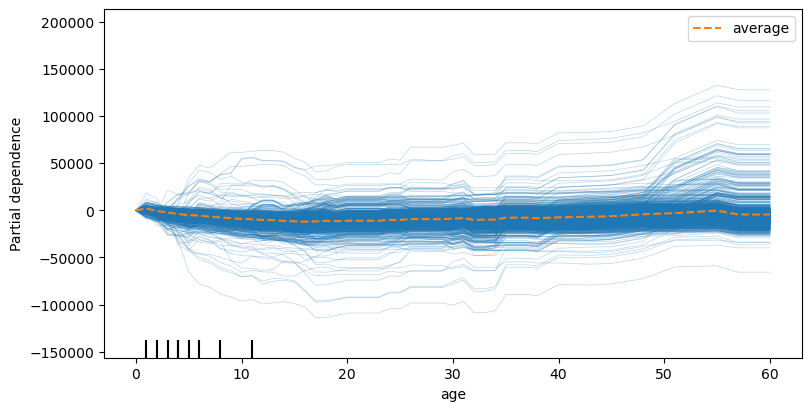

In [284]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    gb_best_new, X_test_encoded, features=['age'],
    kind='both', ax=ax, n_cols=2, centered=True
);

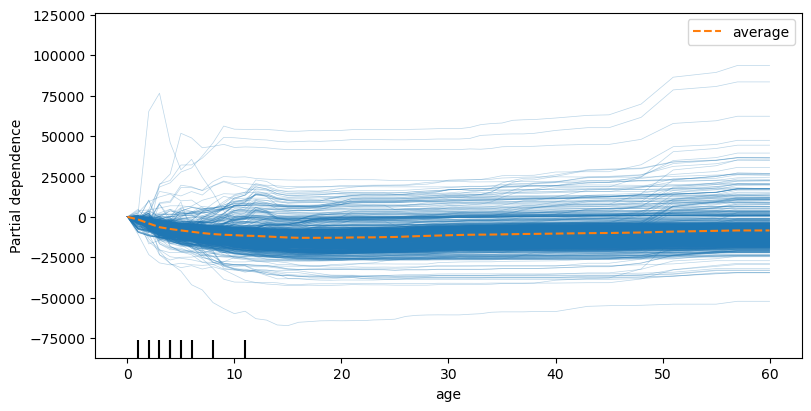

In [285]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 4), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    rf_best_new, X_test_encoded, features=['age'],
    kind='both', ax=ax, n_cols=2, centered=True
);

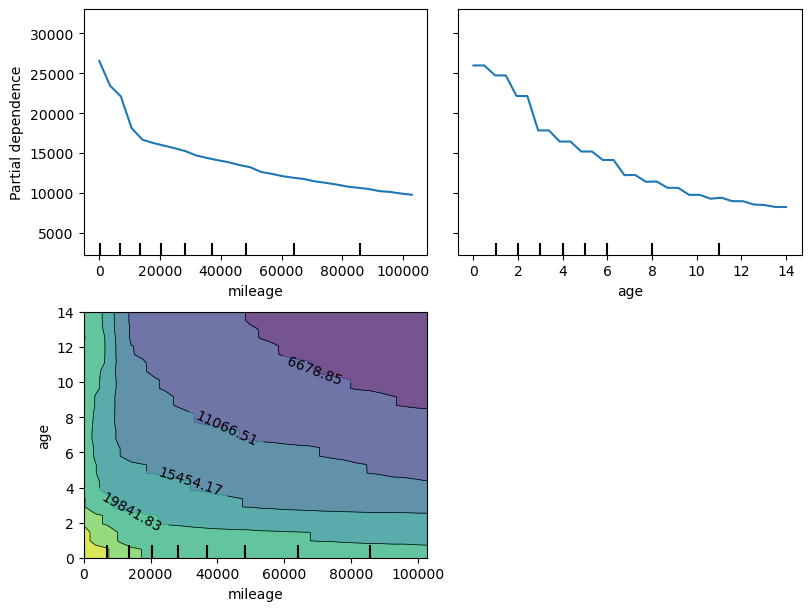

In [270]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    rf_best_new, X_test_encoded, features=['mileage', 'age', ('mileage', 'age')],
    kind='average',
    grid_resolution=30, n_jobs=-1,
    ax=ax, n_cols=2
);

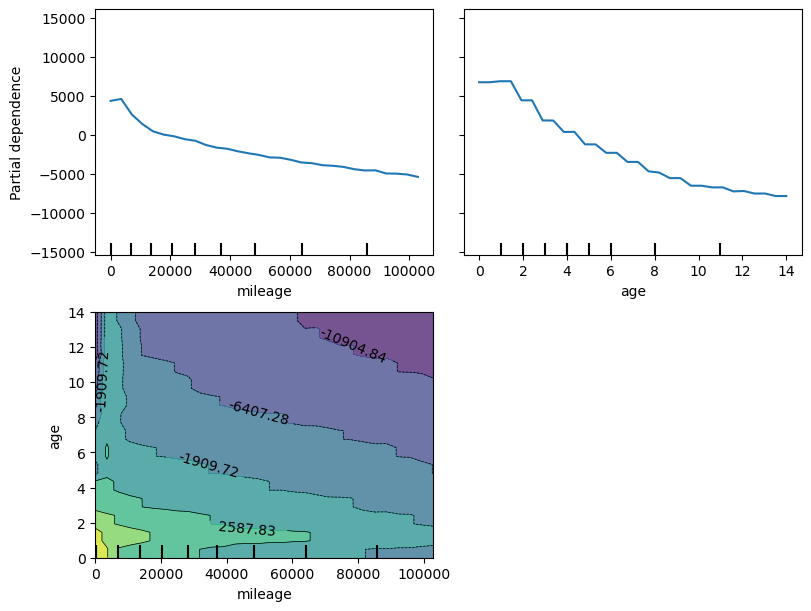

In [289]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    gb_best_new, X_test_encoded, features=['mileage', 'age', ('mileage', 'age')],
    kind='average',
    grid_resolution=30, n_jobs=-1,
    ax=ax, n_cols=2
);

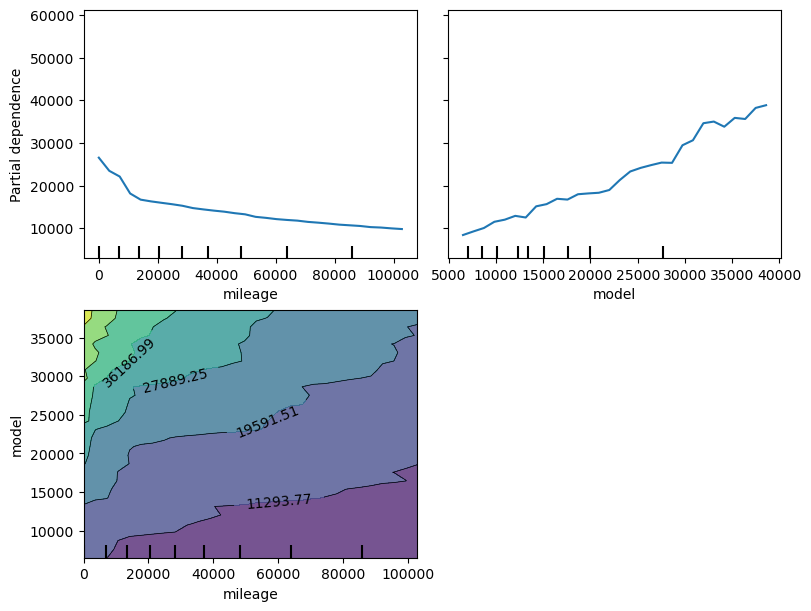

In [272]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    rf_best_new, X_test_encoded, features=['mileage', 'model', ('mileage', 'model')],
    kind='average',
    grid_resolution=30, n_jobs=-1,
    ax=ax, n_cols=2
);

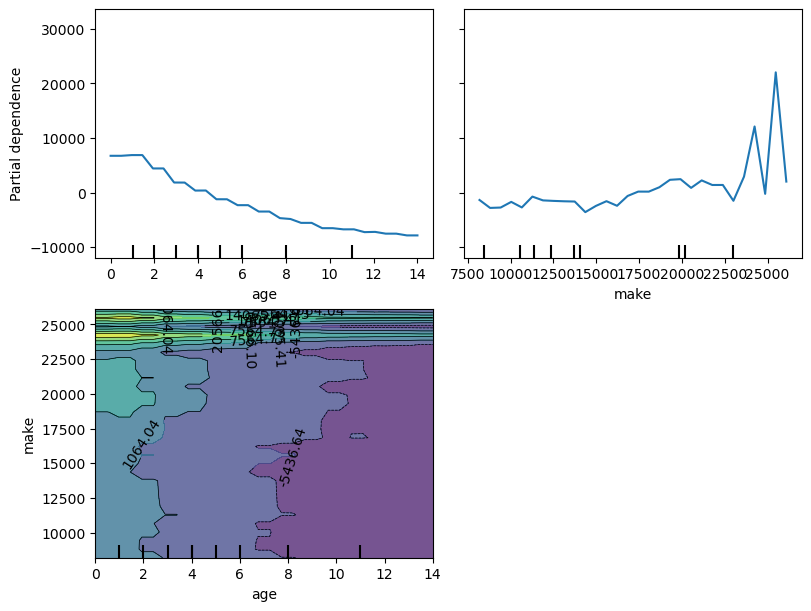

In [273]:
fig, ax = plt.subplots(figsize=(8,6), constrained_layout=True)
PartialDependenceDisplay.from_estimator(
    gb_best_new, X_test_encoded, features=['age', 'make', ('age', 'make')],
    kind='average',
    subsample=100, grid_resolution=30, random_state=0,
    ax=ax, n_cols=2
);